# <div align="center"><b> APSERa Simulation Pipeline </b></div>


## **<div align="center"><b> Importing required packages </b></div>**


### Ensure that 3 file paths are set correctly for your machine before running
#### 1. beam_path : This contains the beam files
#### 2. PATH : this contains path to the fitting functions
#### 3. datafile_path : This is where the output residual after fitting will be saved
#### 4. sky_map_path : Where the sky maps are located
#### 5. recomb_path : Where the recombination line data is located

In [1]:
pip install pysm3

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

import numpy as np
import pylab as plt

In [3]:
import pysm3
import pysm3.units as u
import healpy as hp
import numpy as np

In [4]:
!pip3 install pygdsm
!pip3 install pygdsm

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import math
import ephem
from scipy.signal import correlate

from scipy.optimize import curve_fit

%matplotlib inline
from pygdsm import GlobalSkyModel


from astropy.timeseries import TimeSeries, BinnedTimeSeries
from astropy.time import Time, TimeDelta
from astropy.coordinates import Galactic, SkyCoord, FK5, EarthLocation, AltAz, Angle
import astropy.units as u

import pandas as pd
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline, RegularGridInterpolator
import os

In [5]:
#beam_path = "/home/linux2/Downloads/Farfield/farfield_finite/140mm_ground"            
#beam_path = "/home/mayuris/workspace/RRI_DISTORTION_Lab/APSERa/Keerthi_thesis/Data/Antenna_meas/140mm_ground"

#PATH = '/home/linux2/Downloads/msfitcodes/'
#PATH = '/home/mayuris/workspace/saras3/'


#datafile_path = "/home/linux2/Downloads/Farfield/farfield_finite/140mm_ground/residues_final.txt"
#datafile_path = "/home/mayuris/workspace/RRI_DISTORTION_Lab/APSERa/Keerthi_thesis/residues_final.txt"

#sky_map_path = "."
sky_map_path = "/Users/hshishir/Desktop/sky_model"

#recomb_path = "."
recomb_path = "/Users/hshishir/Desktop/Theory"

## **<div align="center"><b> Time and number of spectra </b></div>**


In [6]:
start_time_in_UTC = '2012-05-19 05:45:00'
n_spectra = 10                  #Number of spectra to be taken
delta_t_in_hours = 1            #Time interval between each spectra needed in hours

t = Time(start_time_in_UTC, format = 'iso', scale= 'utc')

ts = TimeSeries(time_start= start_time_in_UTC, time_delta= delta_t_in_hours *u.hour, n_samples= n_spectra)
ts = ts.time
print(ts)

['2012-05-19 05:45:00.000' '2012-05-19 06:45:00.000'
 '2012-05-19 07:45:00.000' '2012-05-19 08:45:00.000'
 '2012-05-19 09:45:00.000' '2012-05-19 10:45:00.000'
 '2012-05-19 11:45:00.000' '2012-05-19 12:45:00.000'
 '2012-05-19 13:45:00.000' '2012-05-19 14:45:00.000']


## **<div align="center"><b> Antenna beam </b></div>**


In [7]:
# import os
# import glob
# import numpy as np
# from scipy import interpolate

# ## In the rt_file, mention the filename of S11. Please check if it is in linear form. 

# rt_file    = 'dipole_correct.txt'
# file_list  = sorted(glob.glob(os.path.join(beam_path,"*farfield*.txt")))
# #print(file_list)



# gamme_file = os.path.join(beam_path, rt_file)

# gamma_freq = []
# gamma_val  = []

# with open(gamme_file) as fa:
#     for line_aa in fa.readlines()[2:]:
#         line_aa = line_aa.strip()
#         col1    = line_aa.split('\t')
#         _freq   = np.array(list(map(float, col1[0].split())))[0]
#         _val    = np.array(list(map(float, col1[1].split())))[0]
#         gamma_freq.append(_freq)
#         gamma_val.append(_val)
        
# gamma_freq = np.array(gamma_freq)
# gamma_val  = np.array(gamma_val)
# gamma_val=10**(gamma_val/20)

# print(gamma_freq)
# print(gamma_val)
# gamma_func = interpolate.interp1d(gamma_freq, gamma_val)


# ## This below print statement is to verify our interpolation. print(gamma_func(any freq value)) 
# ## and check if it matches the value in the file
# #print(gamma_func(2.8))


# ## The below code is for the beam definition. Please make sure to check the beam_def function before proceeding

# phi_res   = 1
# theta_res = 1

# phi_array   = np.arange(0, 360, phi_res)
# theta_array = np.arange(90, -90-theta_res, -theta_res) 
# freq_array  = []
# file_array  = []

# def get_freq_from_file(filename):
#     _temp = os.path.basename(filename).replace('.txt','').replace('farfield','').replace('(f=','').replace(')','').replace('[1]','')
#     return float(_temp)
    
# for ii, file_add in enumerate(file_list):
#     freq_array.append(get_freq_from_file(file_add))
#     file_array.append(file_add)
    
# print(get_freq_from_file('farfield(f=2.608)[1].txt'))
    
# np.testing.assert_array_equal(file_array, file_list)

# freq_array = np.array(freq_array)
# file_array = np.array(file_array)

# isort      = np.argsort(freq_array)
# freq_array = freq_array[isort]
# file_array = file_array[isort]

# beam_3D_unnorm = np.zeros((len(freq_array), len(theta_array), len(phi_array)))

# for ii, freq in enumerate(freq_array):
#     print("Processing frequency {} GHz".format(freq))
#     file_add = file_array[ii]
#     with open(file_add) as fa:
#         for line_aa in fa.readlines()[2:]:
#             line_aa = line_aa.strip()
#             col1    = line_aa.split('\t')
#             all_val = np.array(list(map(float, col1[0].split())))

#             theta   = 90-all_val[0] 
#             phi     = all_val[1]
#             beam    = all_val[2]
#            # print(theta)
            

#             iphi    = np.where(phi_array==phi)[0][0]
#             itheta  = np.where(theta_array==theta)[0][0]
#             beam_3D_unnorm[ii, itheta, iphi] = 10**(beam/10)
            


# beam_3D = np.zeros((len(freq_array), len(theta_array), len(phi_array)))

# #print(beam_3D_unnorm[0, :,:].shape)


# for ifreq in range(beam_3D.shape[0]):
#     for itheta in range(beam_3D.shape[1]):
#         for iphi in range(beam_3D.shape[2]):
#             beam_3D[ifreq, itheta,iphi] = beam_3D_unnorm[ifreq, itheta,iphi]/np.amax(beam_3D_unnorm[ifreq,:,:])


# print(freq_array)    

        
# theta_array_new = np.flip(theta_array)
# phi_array_new   = phi_array
# beam_3D_flip=np.flip(beam_3D,axis=1)
# #print(beam_3D_flip[2,:,0],beam_3D[2,:,0])
# from scipy.interpolate import RegularGridInterpolator
# my_interpolating_function = RegularGridInterpolator((freq_array, theta_array_new,
#                                                      phi_array_new), beam_3D_flip)
# #print(my_interpolating_function.shape)



# ## Beam definition
# ## If only the effect of S11 has to be checked (with ideal antenna beam), use the sin^(theta) beam. 



# def beam_def(freq, alt, az):
#     return float(my_interpolating_function([freq, alt, az]))
#     #if (alt<=0):
#      #   return 0
#     #else:
#      #   return (math.sin(alt*PI/180)*math.sin(alt*PI/180))


    
# plt.plot(gamma_freq, gamma_val)
# plt.xlim([2,4])
# plt.show()

In [8]:
#alt == theta angle; az == phi angle; both in degrees
def beam_def(freq, alt, az):
    if (alt<=0):
        return 0
    else:
        return (math.sin(alt*PI/180)*math.sin(alt*PI/180))

#since this sample beam sin^2 theta doesn't have any phi dependence (and we want our beams to be freq independent ideally)

## **<div align="center"><b> Definitions </b></div>**


[2h55m09.67251165s 3h55m19.52895309s 4h55m29.38539832s 5h55m39.24184734s
 6h55m49.09830016s 7h55m58.95475677s 8h56m08.81121718s 9h56m18.66768136s
 10h56m28.52414933s 11h56m38.38062108s]
0


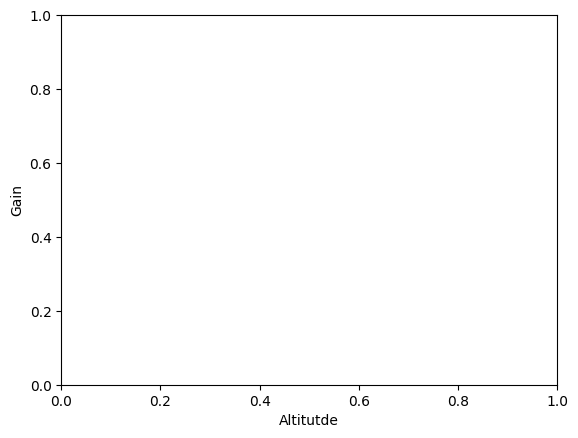

In [9]:
h = 6.62607157e-34
k = 1.3806488e-23
c = 2.99792458e+08
TCMB = 2.72548
f_start = 2.5                  #Check the f_start and f_stop and change the number of channels accordingly
f_stop = 4
No_of_Channels = 251
Channel_width = 0.01
N_SIDE = 16
T_hot = 3730
T_cold = 2730                    #T_cold and T_hot in Kelvins
Time_in_UTC = ts
latitude = 13.067439
longitude =80.237617            #Latitude and longitude in degrees
altitude = 0                     #Altitude in meters
alpha = 0.0065                   #Temp. lapse rate (deg C per meter)
PI = 3.14159265
Noise_int_time = 1e+12
Trx = 14
T_atm = 1
freqs = np.linspace(f_start,f_stop, No_of_Channels)
CMB_Int = np.empty([No_of_Channels])
P_hot = np.empty(No_of_Channels)
P_cold = np.empty(No_of_Channels)
P_dif = np.empty(No_of_Channels)
cross_real = [0]*No_of_Channels
cross_imag = [0]*No_of_Channels
sumwt = [0]*No_of_Channels
sigma = [0]*No_of_Channels
spectra = [0]*n_spectra
spectra_cross_imag = [0]*n_spectra
NPIX = hp.nside2npix(N_SIDE)


#Refraction correction formula
def refraction(alt_in_deg, altitude):
    pres = 1010.*math.pow((1-6.5/288000*altitude),5.255)
    if (altitude>11000):
        temp = 211.5
    else:
        temp = 283.0 - (alpha * altitude)
    R = 1.02/math.tan((alt_in_deg + (10.3/(alt_in_deg + 5.11)))*(PI/180))
    if (alt_in_deg == 90):
        R = R+ 0.0019279
    tpcor = (pres/1000) * (283/temp)
    R =  tpcor*(R/60)
    return alt_in_deg +R



Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc',location= EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg, height=altitude*u.m))
lst = t.sidereal_time('apparent')
print(lst)
plt.xlabel('Altitutde')
plt.ylabel('Gain')
#plt.plot(theta_array_new[1:180],beam_3D_flip[50,1:180,0])
print(beam_def(2.8,-70,0))
#plt.plot(beam_3D[100,1:90,0])

## <div align="center"><b> Getting maps, calculating CMB intensity </b></div>


In [10]:
CMB_Int = ((2*h*1e+27*freqs**3)/(c*c))/(np.exp((h*freqs*1e+9)/(k*TCMB))-1)
print("Got CMB Int!")

#P_hot and P_cold for calibration
P_hot = (2*h*freqs*1e9)/(np.exp((h*freqs*1e9)/(k*T_hot))-1)
P_cold = (2*h*freqs*1e9)/(np.exp((h*freqs*1e9)/(k*T_cold))-1)
P_dif = P_hot -P_cold

print("Got P_dif for calibration!")

Got CMB Int!
Got P_dif for calibration!


In [11]:
maps_2GHz = [] 
maps_3GHz = []
maps_4GHz = []

txt_output_dir = "/Users/hshishir/Desktop/polarization_maps/I2/maps_tx(32)"

frequencies = [2.0, 3.00398406374502, 4.00796812749004]

for freq in frequencies:
    txt_file_path = os.path.join(txt_output_dir, f"map_{freq}.txt")
    if freq == 2.0:
        maps_2GHz = np.loadtxt(txt_file_path)
    elif freq == 3.00398406374502:
        maps_3GHz = np.loadtxt(txt_file_path)
    elif freq == 4.00796812749004:
        maps_4GHz = np.loadtxt(txt_file_path)

maps_2GHz *= 1e-6
maps_3GHz *= 1e-6
maps_4GHz *= 1e-6

print("Got 2GHz, 3GHz and 4GHz maps for power law fitting!")
print(maps_2GHz)

Got 2GHz, 3GHz and 4GHz maps for power law fitting!
[0.08225438 0.07712781 0.08117038 ... 0.08925923 0.09632669 0.09187116]


## <div align="center"><b> Getting recombination lines </b></div>


/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_50972/4225964707.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(recomb_file,sep= "    " ,header = None)


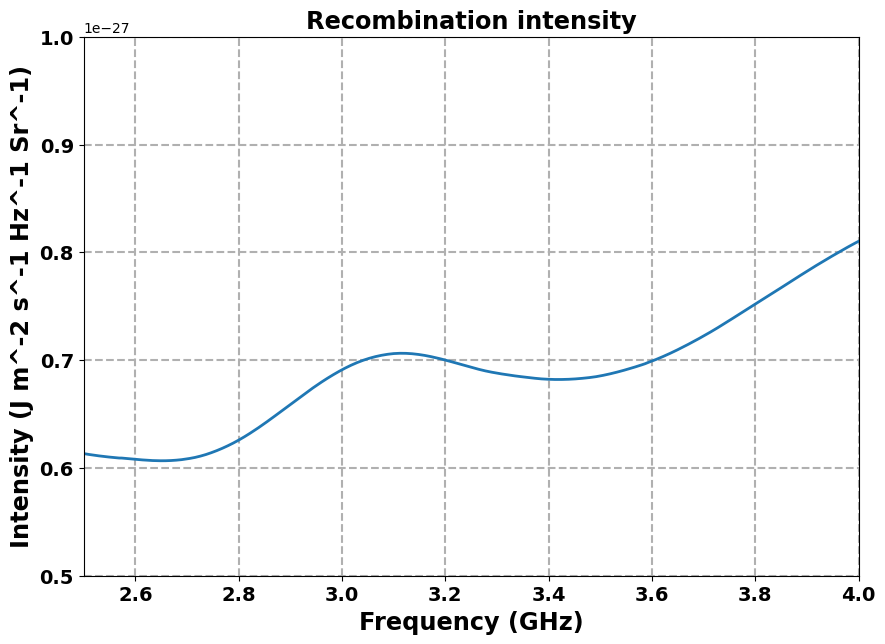

In [12]:
recomb_file = os.path.join(recomb_path,'total_spec_new.txt')
df = pd.read_csv(recomb_file,sep= "    " ,header = None)
df.reset_index(drop=True, inplace=True)
df.columns = ["Frequency","Intensity"]

x = df["Frequency"]
y= df["Intensity"]

plt.figure(figsize=(10, 7))
plt.plot((df['Frequency']), (df['Intensity']),linewidth=2)
plt.title('Recombination intensity', fontsize='xx-large', fontweight='bold')
plt.xlabel('Frequency (GHz)', fontsize='xx-large', fontweight='bold')
plt.ylabel('Intensity (J m^-2 s^-1 Hz^-1 Sr^-1)', fontsize='xx-large', fontweight='bold')
plt.xlim([f_start,f_stop])
plt.ylim([0.5e-27,1e-27])
plt.xticks(fontsize = 14, fontweight='bold')
plt.yticks(fontsize = 14, fontweight='bold')
plt.grid(linewidth=1.5, linestyle='--')
plt.show()

ius = InterpolatedUnivariateSpline(x, y)
Rec_int = ius(freqs)



## <div align="center"><b> Getting spectra </b></div>


Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  1
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  2
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  3
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  4
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  5
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  6
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  7
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  8
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  9
Number of pixels got:  5000
Number of pixels got:  10000
No. of spectra got =  10


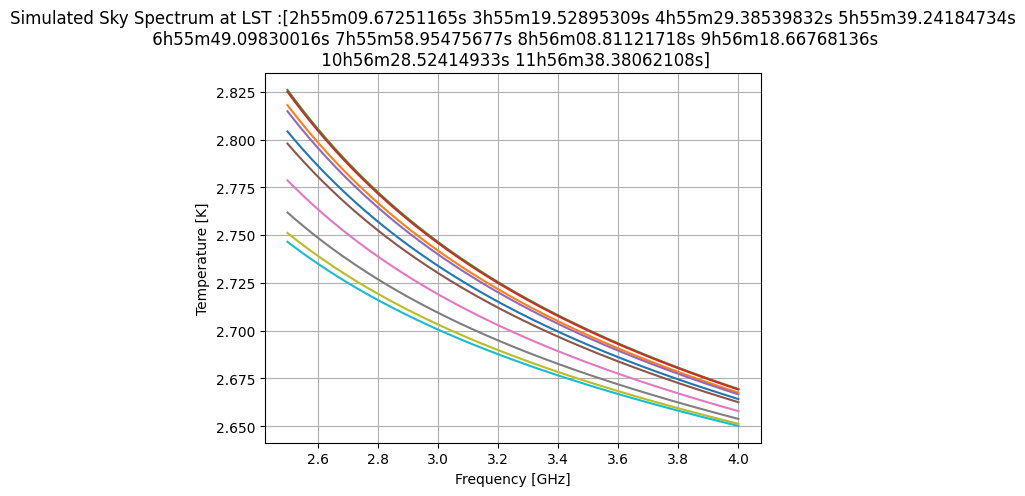

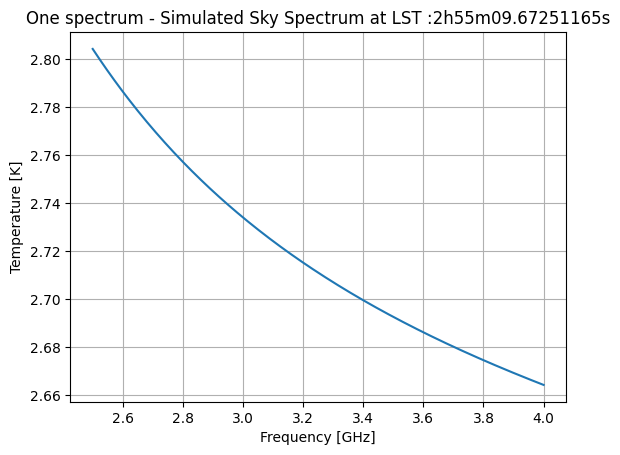

Sigma array for each channel and each timestamp:
[[5.63020099 5.62984153 5.62948508 ... 5.58610949 5.58601662 5.58592405]
 [5.63456015 5.63416924 5.63378164 ... 5.58717441 5.58707672 5.58697936]
 [5.63707148 5.63666232 5.63625666 ... 5.58778197 5.58768152 5.58758141]
 ...
 [5.61678872 5.61652526 5.61626389 ... 5.58279654 5.58271854 5.58264074]
 [5.61340098 5.61316208 5.61292504 ... 5.58197459 5.58190032 5.58182624]
 [5.61193851 5.61171031 5.61148386 ... 5.58162421 5.58155155 5.58147906]]
2510


In [13]:
sigma_array = np.zeros((n_spectra, No_of_Channels))

t = 0
while t<n_spectra:
    i=1
    while i<12288:           #Working on each pixel
        coords = hp.pixelfunc.pix2ang(32, i , nest = True, lonlat = True)          #pix2ang = gives l and b coordinates for each pixel; NSIDE=16 
        gc = SkyCoord(l = coords[0]*u.degree, b= coords[1]*u.degree, frame = 'galactic')  #astropy.units as u
        
        #Now, the coordinates in Galactic frame is changed to equitorial frame below
        equi = gc.transform_to(AltAz(obstime = Time_in_UTC[t], location = EarthLocation(lat = latitude*u.deg, lon=longitude*u.deg , height=altitude*u.m)))
        alt = equi.alt.value
        new_alt = refraction(alt, altitude) 
      
        #Using power law relation to fit spectra of three frequency maps
        def func(xx, a):
            return (maps_2GHz)[i-1] * np.power((xx/2), a)     #Tsky(freq)=T408(f/f408)^(-a)

        xx = np.array([2, 3, 4])
        yy = np.array([maps_2GHz[i-1], maps_3GHz[i-1], maps_4GHz[i-1]])

        popt, pcov = curve_fit(func, xx, yy)   #popt: best fit spectral index for each pixel
        

        #print(freqs)
        j=0
        longitudes = equi.az.value
        while j< No_of_Channels:
            if (longitudes>359.00):
                longitudes = 359.00
            cwt = beam_def(freqs[j], new_alt, longitudes)   #beam weight
            #print(new_alt,cwt)
            if (cwt>0):     #Adding all the three intensities

                map_1 = (2*k*1e+18 * (freqs[j]**2) *maps_2GHz[i-1]* np.power(freqs[j]/2, float(popt[0])))/ (c**2)
                Power = (map_1 + CMB_Int[j]+Rec_int[j]) *(c*c/ (1e+18* freqs[j]**2)) #+Rec_int[j]
                final_temp = (Power/P_dif[j])*(T_hot-T_cold)   #calibrated power using Tcold and Thot
                
                cross_real[j] = cross_real[j] + cwt*final_temp#* (1 - np.power(gamma_func(freqs[j]),2))
                
                ## Remove the (1 - np.power(gamma_func(freqs[j]),2)) to try for ideal antenna (no return loss)
                
                sumwt[j] = sumwt[j]+ cwt   #sumwt has cumulative beam weigths
            
            j = j+1
            
        if (i%5000 == 0):
            print('Number of pixels got: ', i)
        
        i = i+1

    
    i=0    #index i for below loop is channel number
    while(i< No_of_Channels):
        if sumwt[i]>0:
            cross_real[i] = cross_real[i]/sumwt[i]
        i = i+1
        
    
    sigma = (np.array(cross_real) + Trx+ T_atm)/ math.sqrt(Channel_width*1e9*Noise_int_time)    #radiometer equation
    sigma_array[t] = sigma

    np.savetxt(f'/Users/hshishir/Desktop/mcmc_fit/sigma_array/sigma_array_spectra{t}.txt', sigma_array[t] * 1e+9)
    
    #Generating an array of random integers with mean 0 and std 1. 
    array = np.random.normal(0,1,No_of_Channels)

    #Adding the gaussian error
    
    cross_real = cross_real  + array*sigma       #cross_real has Tsky
    #Comment out this line if you need spectra without noise. To vary the noise level, change Noise_int_time in definitions
                                                    
    cross_imag = cross_imag  + array*sigma       #cross_imag has noise (to keep track of noise terms, which is also added to real part)
    
    spectra[t] = cross_real
    spectra_cross_imag[t] = cross_imag
    
    cross_real = [0]*No_of_Channels
    cross_imag = [0]*No_of_Channels
    sumwt = [0]*No_of_Channels
    sigma = [0]*No_of_Channels   #assigning all the above 4 parameters to zero valued arrays
    
    print("No. of spectra got = ", t+1)
    
    t = t+1

###end of one timestamp

Obs = ephem.Observer()
t = Time(Time_in_UTC, scale='utc',location=(longitude, latitude))
lst = t.sidereal_time('apparent')
    

i=0
while(i<n_spectra):
    plt.plot(freqs, spectra[i])
    i=i+1
    
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('Simulated Sky Spectrum at LST :%s'%lst)
plt.grid()
plt.show()

plt.plot(freqs, spectra[0])
plt.xlabel('Frequency [GHz]')
plt.ylabel('Temperature [K]')
plt.title('One spectrum - Simulated Sky Spectrum at LST :%s'%lst[0])
plt.grid()
plt.show()

sigma_array = np.array(sigma_array * 1e+9)
print("Sigma array for each channel and each timestamp:")
print(sigma_array)
print(sigma_array.size)
#np.savetxt('/Users/hshishir/Desktop/mcmc_fit/sigma_array_no_noise.txt', sigma_array)

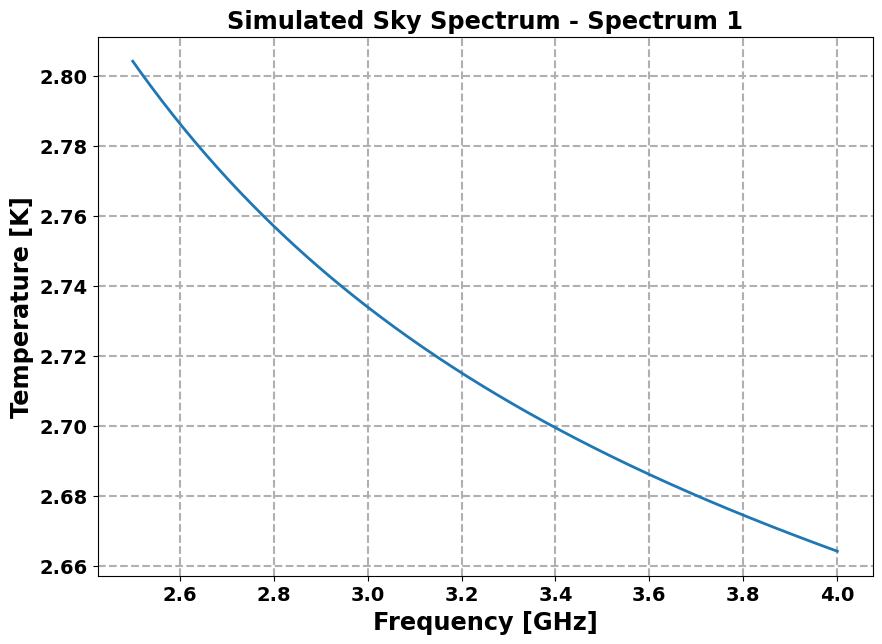

Spectrum 1:
[2.80425882 2.80312211 2.8019949  2.80087711 2.79976861 2.7986693
 2.79757904 2.79649777 2.79542536 2.7943617  2.7933067  2.79226024
 2.79122227 2.79019262 2.78917124 2.78815803 2.78715288 2.78615571
 2.78516643 2.78418493 2.78321115 2.78224497 2.78128635 2.78033513
 2.7793913  2.77845473 2.77752537 2.77660312 2.77568789 2.77477963
 2.77387824 2.77298363 2.77209578 2.77121456 2.77033992 2.76947177
 2.76861006 2.7677547  2.76690564 2.7660628  2.76522612 2.76439551
 2.76357093 2.76275231 2.76193956 2.76113264 2.76033149 2.75953603
 2.75874622 2.75796199 2.75718327 2.75641002 2.75564216 2.75487964
 2.75412242 2.75337043 2.7526236  2.75188191 2.75114529 2.75041367
 2.74968701 2.74896527 2.74824838 2.7475363  2.74682899 2.74612636
 2.74542842 2.74473507 2.7440463  2.74336204 2.74268225 2.74200688
 2.74133588 2.74066923 2.74000687 2.73934876 2.73869484 2.7380451
 2.73739947 2.73675791 2.73612039 2.73548688 2.73485731 2.73423166
 2.7336099  2.73299197 2.73237783 2.73176747 2.73116

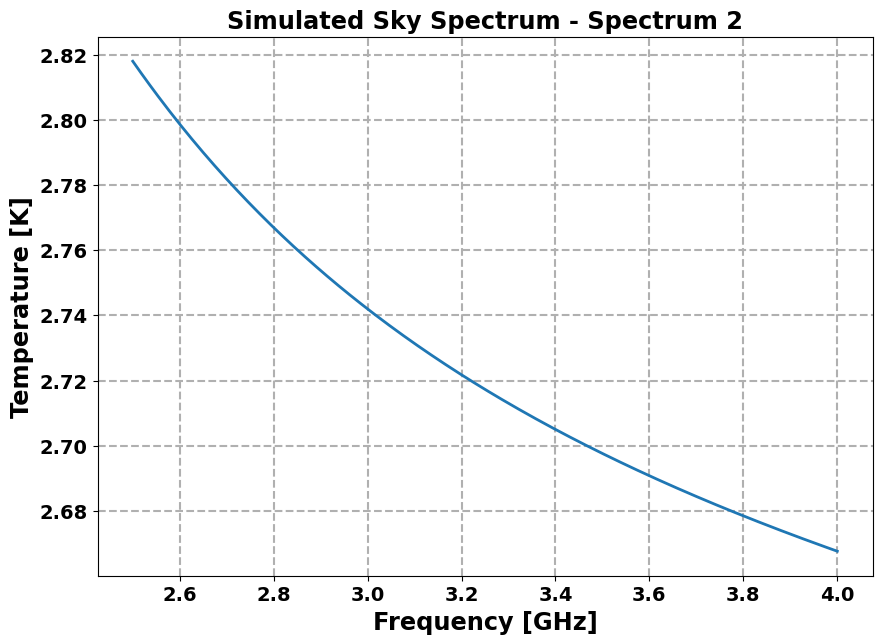

Spectrum 2:
[2.81804367 2.81680751 2.81558182 2.81436646 2.81316133 2.81196631
 2.81078128 2.8096061  2.80844067 2.8072849  2.80613862 2.80500177
 2.80387422 2.80275586 2.80164659 2.80054629 2.79945487 2.79837222
 2.79729825 2.79623285 2.79517595 2.7941274  2.79308714 2.79205508
 2.7910311  2.79001513 2.78900708 2.78800685 2.78701435 2.78602951
 2.78505224 2.78408243 2.78312005 2.78216496 2.7812171  2.7802764
 2.77934277 2.77841613 2.77749644 2.77658356 2.77567746 2.77477806
 2.77388528 2.77299905 2.77211929 2.77124595 2.77037893 2.76951819
 2.76866366 2.76781526 2.76697293 2.76613661 2.76530623 2.76448174
 2.76366304 2.7628501  2.76204286 2.76124125 2.76044522 2.7596547
 2.75886965 2.75808998 2.75731566 2.75654663 2.75578283 2.75502423
 2.75427074 2.75352232 2.75277891 2.75204048 2.75130698 2.75057833
 2.7498545  2.74913545 2.74842109 2.74771144 2.74700638 2.74630591
 2.74560997 2.74491853 2.74423151 2.74354888 2.74287061 2.74219667
 2.74152697 2.7408615  2.74020019 2.73954305 2.73888

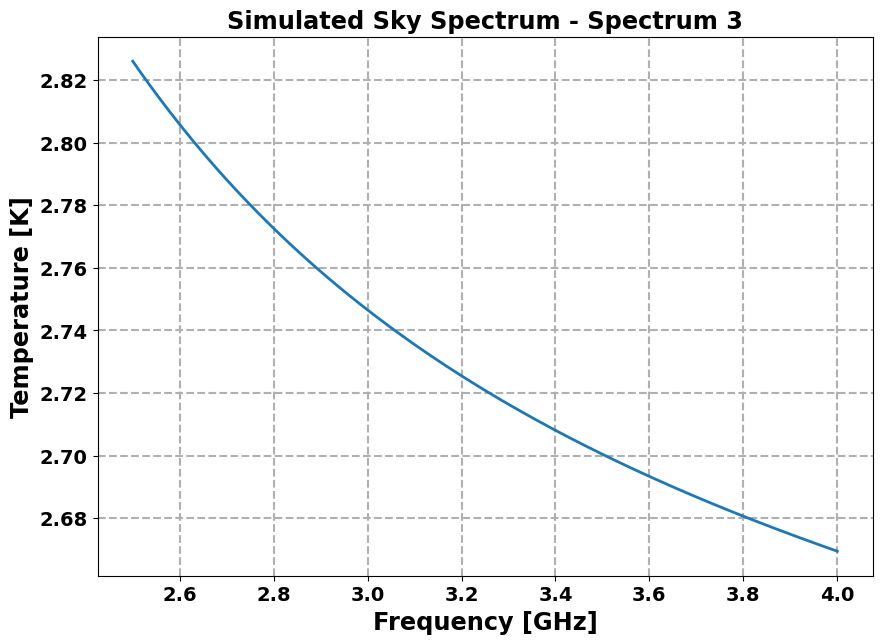

Spectrum 3:
[2.8259852  2.82469133 2.82340852 2.82213658 2.82087541 2.81962489
 2.81838487 2.81715524 2.81593588 2.81472668 2.8135275  2.81233823
 2.81115874 2.80998894 2.8088287  2.80767795 2.80653652 2.80540433
 2.80428127 2.80316725 2.80206216 2.80096587 2.79987833 2.7987994
 2.79772899 2.79666701 2.79561338 2.79456798 2.79353072 2.79250152
 2.79148027 2.79046692 2.78946135 2.78846349 2.78747323 2.7864905
 2.78551524 2.78454733 2.78358671 2.7826333  2.78168701 2.78074778
 2.77981549 2.77889013 2.77797157 2.77705978 2.77615465 2.77525612
 2.77436413 2.77347858 2.77259944 2.77172663 2.77086005 2.76999969
 2.76914543 2.76829724 2.76745505 2.76661877 2.76578838 2.76496378
 2.76414494 2.76333178 2.76252424 2.76172227 2.76092582 2.76013482
 2.75934921 2.75856893 2.75779396 2.7570242  2.75625963 2.75550018
 2.75474578 2.75399644 2.75325203 2.75251257 2.75177795 2.75104817
 2.75032316 2.74960286 2.74888724 2.74817624 2.74746982 2.74676795
 2.74607057 2.74537761 2.74468907 2.74400489 2.74332

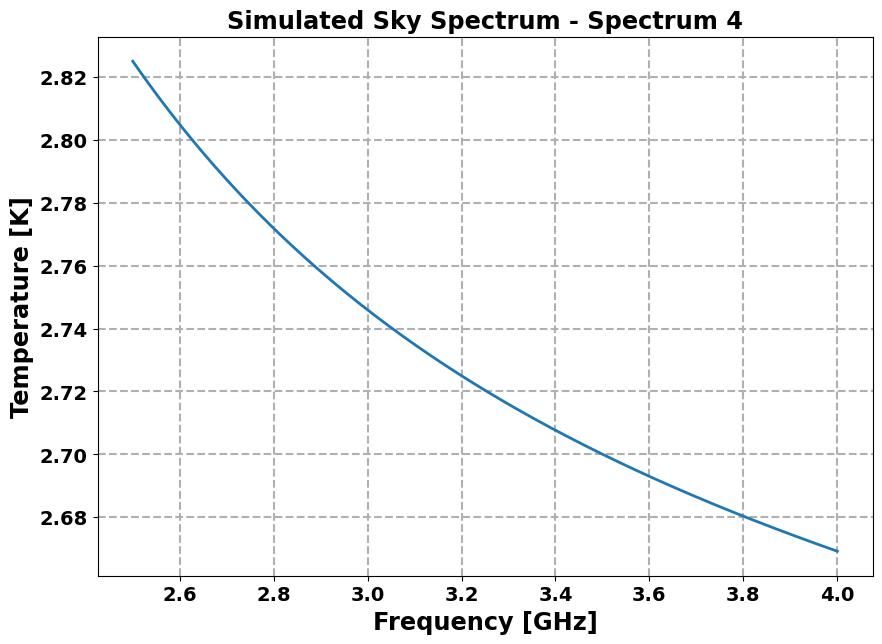

Spectrum 4:
[2.82501121 2.82372371 2.8224472  2.82118149 2.81992651 2.81868213
 2.81744821 2.81622462 2.81501123 2.81380796 2.81261465 2.8114312
 2.81025751 2.80909342 2.80793888 2.80679373 2.80565789 2.80453123
 2.80341367 2.80230508 2.80120537 2.80011444 2.79903219 2.79795852
 2.79689332 2.79583651 2.79478801 2.79374769 2.79271547 2.79169127
 2.790675   2.78966655 2.78866587 2.78767283 2.78668738 2.78570942
 2.78473887 2.78377564 2.78281965 2.78187084 2.78092913 2.77999441
 2.77906665 2.77814572 2.7772316  2.77632418 2.77542341 2.77452919
 2.77364147 2.77276019 2.77188526 2.77101663 2.77015419 2.76929794
 2.76844777 2.76760362 2.76676544 2.76593317 2.76510673 2.76428606
 2.7634711  2.76266181 2.76185812 2.76105995 2.76026726 2.75948001
 2.75869811 2.75792154 2.75715021 2.75638409 2.75562312 2.75486724
 2.75411642 2.75337059 2.75262969 2.75189367 2.75116251 2.75043615
 2.74971453 2.74899759 2.74828532 2.74757763 2.74687452 2.74617591
 2.74548177 2.74479202 2.74410669 2.74342567 2.7427

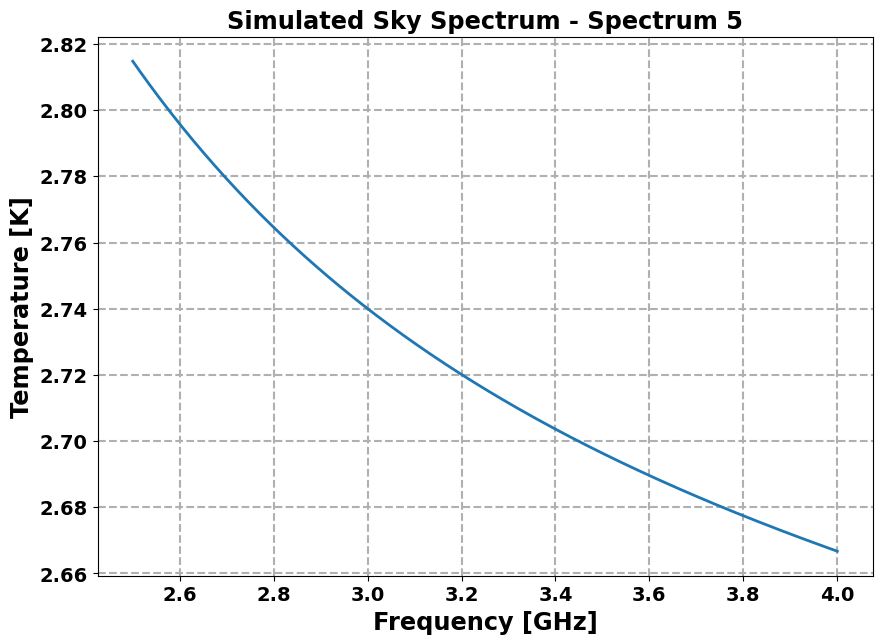

Spectrum 5:
[2.81479923 2.81358469 2.81238042 2.81118632 2.81000224 2.80882808
 2.80766372 2.80650905 2.80536393 2.80422827 2.80310198 2.8019849
 2.80087695 2.79977802 2.79868802 2.79760681 2.79653431 2.79547046
 2.79441509 2.79336814 2.79232949 2.79129908 2.7902768  2.78926255
 2.78825624 2.78725779 2.7862671  2.78528409 2.78430866 2.78334075
 2.78238026 2.7814271  2.7804812  2.77954248 2.77861086 2.77768626
 2.77676859 2.77585778 2.77495376 2.77405648 2.7731658  2.77228171
 2.77140411 2.77053293 2.76966812 2.76880958 2.76795726 2.76711109
 2.76627101 2.76543695 2.76460885 2.76378664 2.76297024 2.76215962
 2.76135471 2.76055544 2.75976175 2.75897358 2.75819089 2.75741359
 2.75664167 2.75587504 2.75511363 2.75435742 2.75360635 2.75286036
 2.75211938 2.75138339 2.75065231 2.74992612 2.74920475 2.74848814
 2.74777625 2.74706904 2.74636648 2.74566849 2.74497502 2.74428603
 2.74360151 2.74292138 2.7422456  2.74157413 2.74090693 2.74024395
 2.73958515 2.73893049 2.73827995 2.73763345 2.7369

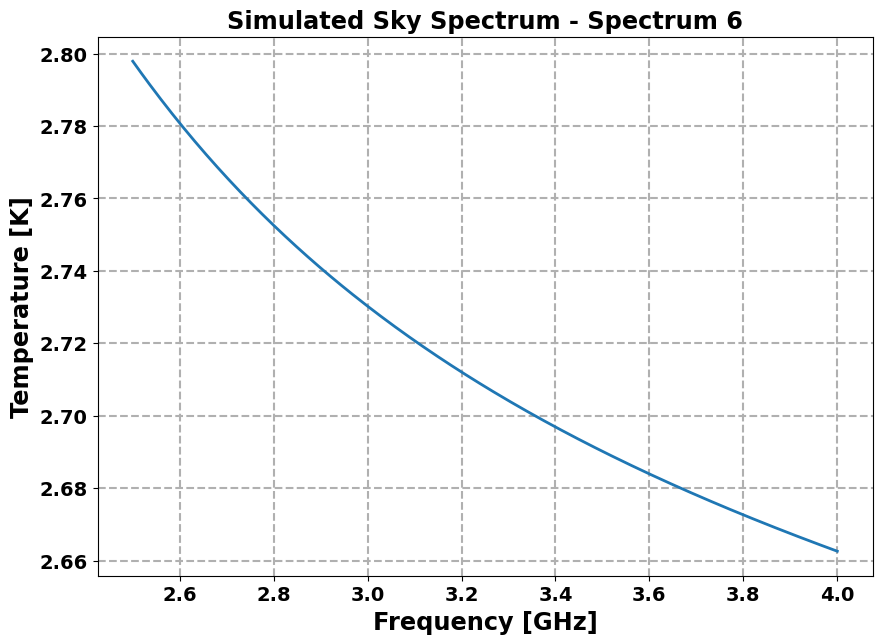

Spectrum 6:
[2.79790677 2.79681356 2.79572946 2.79465437 2.79358818 2.7925308
 2.7914821  2.790442   2.78941039 2.78838717 2.78737222 2.78636549
 2.78536685 2.7843762  2.78339346 2.78241855 2.78145137 2.78049181
 2.77953982 2.77859529 2.77765814 2.77672827 2.77580561 2.77489009
 2.77398162 2.77308013 2.7721855  2.77129769 2.77041663 2.76954222
 2.76867439 2.76781307 2.76695819 2.76610968 2.76526745 2.76443146
 2.76360161 2.76277787 2.76196016 2.76114838 2.7603425  2.75954246
 2.75874816 2.75795957 2.75717662 2.75639925 2.75562737 2.75486097
 2.75409998 2.7533443  2.75259393 2.75184877 2.75110877 2.75037391
 2.74964409 2.74891929 2.74819945 2.74748449 2.7467744  2.74606909
 2.74536856 2.74467269 2.7439815  2.74329489 2.74261286 2.74193531
 2.74126222 2.74059355 2.73992925 2.73926928 2.73861358 2.7379621
 2.73731483 2.73667169 2.73603268 2.73539773 2.73476678 2.73413982
 2.73351681 2.7328977  2.73228245 2.73167102 2.73106338 2.7304595
 2.72985931 2.7292628  2.72866993 2.72808065 2.727494

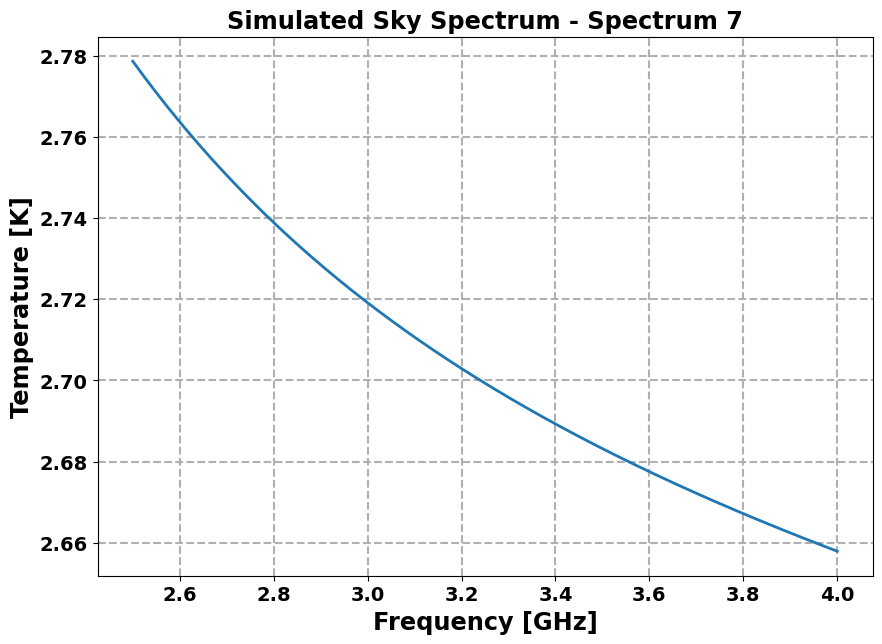

Spectrum 7:
[2.77866621 2.77771158 2.77676473 2.77582559 2.77489406 2.77397004
 2.77305345 2.7721442  2.77124221 2.77034737 2.76945964 2.76857888
 2.76770505 2.76683808 2.76597785 2.76512429 2.76427735 2.76343693
 2.76260295 2.76177537 2.76095408 2.76013902 2.75933014 2.75852734
 2.75773056 2.75693974 2.7561548  2.75537568 2.75460232 2.75383464
 2.75307258 2.7523161  2.75156513 2.75081958 2.75007941 2.74934457
 2.74861499 2.7478906  2.74717137 2.74645723 2.74574812 2.74504399
 2.74434477 2.74365043 2.7429609  2.74227615 2.7415961  2.74092071
 2.74024996 2.73958375 2.73892207 2.73826484 2.73761203 2.73696359
 2.73631948 2.73567965 2.73504404 2.73441262 2.73378536 2.73316219
 2.73254309 2.731928   2.73131687 2.73070968 2.73010638 2.72950694
 2.7289113  2.72831944 2.72773131 2.72714686 2.72656609 2.72598892
 2.72541534 2.72484529 2.72427875 2.7237157  2.72315608 2.72259986
 2.72204701 2.72149748 2.72095127 2.72040833 2.71986862 2.7193321
 2.71879875 2.71826856 2.71774146 2.71721744 2.7166

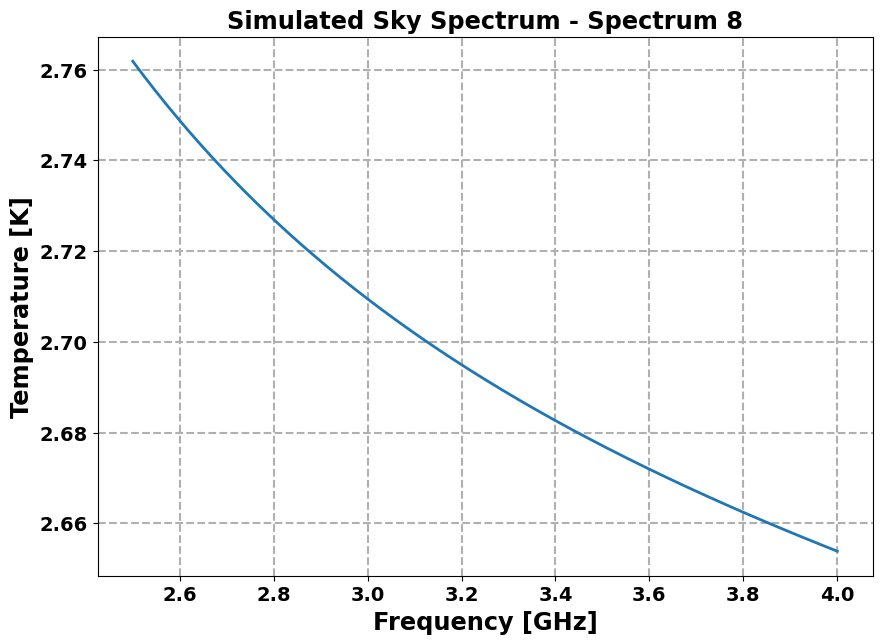

Spectrum 8:
[2.7618455  2.76101235 2.76018582 2.75936584 2.75855234 2.75774522
 2.75694442 2.75614987 2.75536147 2.75457918 2.75380289 2.75303258
 2.75226815 2.75150953 2.75075665 2.75000946 2.74926788 2.74853186
 2.74780132 2.74707621 2.74635645 2.745642   2.74493279 2.74422877
 2.74352984 2.742836   2.74214716 2.74146328 2.74078428 2.7401101
 2.73944075 2.73877611 2.73811614 2.73746079 2.73681005 2.73616379
 2.73552205 2.7348847  2.73425174 2.73362311 2.73299876 2.73237864
 2.73176271 2.73115093 2.73054323 2.72993961 2.72933997 2.72874431
 2.72815257 2.72756472 2.72698071 2.72640048 2.72582402 2.72525127
 2.7246822  2.72411679 2.72355497 2.7229967  2.72244196 2.72189071
 2.72134291 2.72079854 2.72025754 2.71971988 2.71918553 2.71865446
 2.71812662 2.717602   2.71708055 2.71656225 2.71604704 2.71553493
 2.71502586 2.7145198  2.71401674 2.71351661 2.71301942 2.71252512
 2.71203368 2.71154509 2.71105929 2.71057628 2.71009603 2.70961849
 2.70914365 2.70867148 2.70820196 2.70773507 2.7072

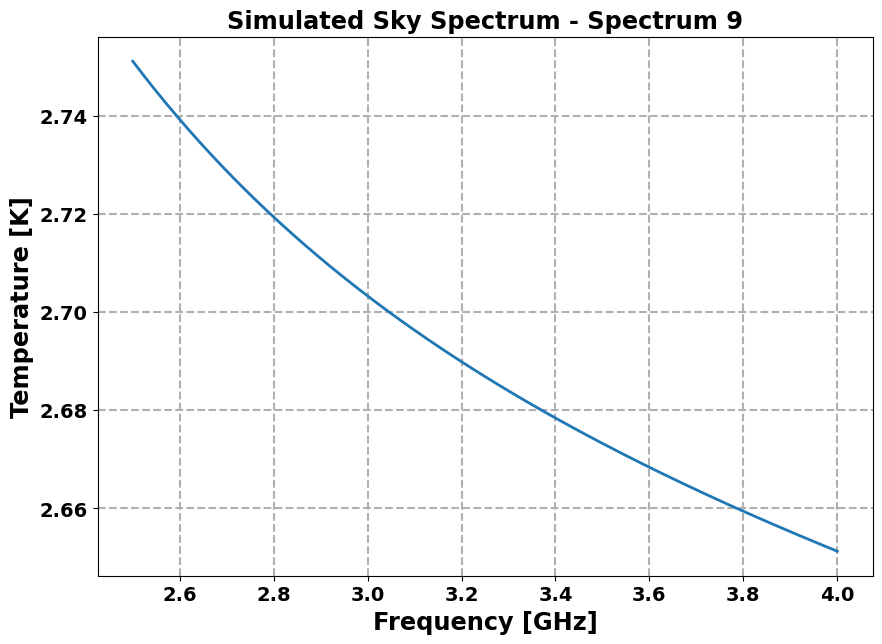

Spectrum 9:
[2.75113252 2.75037703 2.74962745 2.74888365 2.74814561 2.74741323
 2.74668646 2.74596523 2.74524946 2.7445391  2.74383409 2.74313436
 2.74243984 2.74175049 2.74106624 2.74038702 2.73971281 2.7390435
 2.73837907 2.73771944 2.73706458 2.73641443 2.7357689  2.73512798
 2.7344916  2.73385972 2.7332323  2.73260923 2.73199053 2.73137612
 2.73076595 2.73016    2.72955818 2.72896047 2.72836682 2.72777718
 2.72719152 2.72660978 2.72603194 2.72545792 2.72488769 2.72432124
 2.7237585  2.72319944 2.72264401 2.72209218 2.72154391 2.72099915
 2.72045789 2.71992006 2.71938563 2.71885458 2.71832687 2.71780246
 2.71728131 2.7167634  2.71624866 2.71573711 2.71522868 2.71472333
 2.71422106 2.71372182 2.71322558 2.71273229 2.71224197 2.71175455
 2.71126998 2.71078828 2.71030941 2.7098333  2.70935996 2.70888935
 2.70842145 2.70795622 2.70749364 2.70703368 2.70657633 2.70612154
 2.7056693  2.70521958 2.70477234 2.70432758 2.70388524 2.70344533
 2.70300783 2.70257267 2.70213989 2.7017094  2.7012

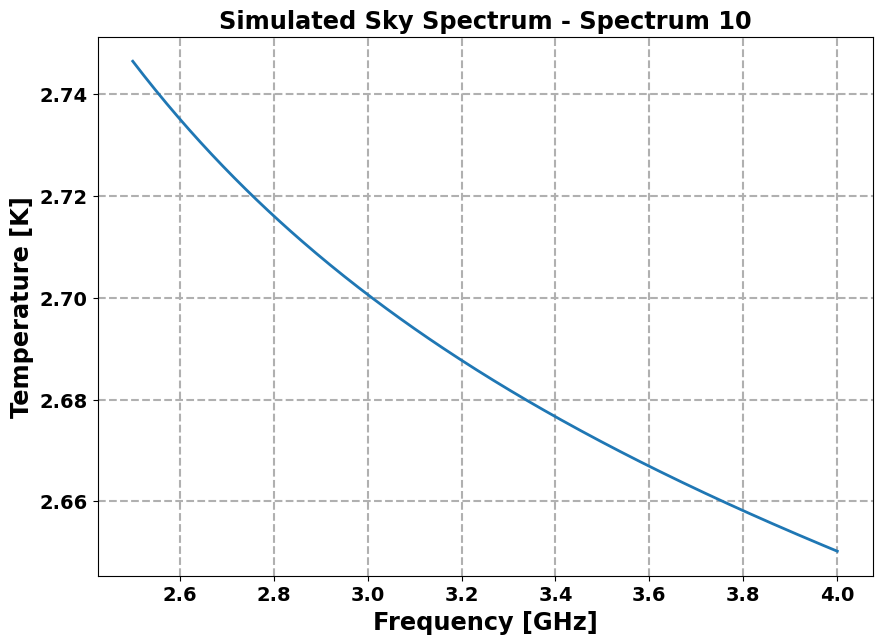

Spectrum 10:
[2.74650778 2.74578615 2.74507005 2.74435944 2.74365425 2.74295443
 2.74225988 2.74157055 2.74088643 2.74020737 2.73953337 2.73886437
 2.73820029 2.7375411  2.73688671 2.73623708 2.73559215 2.73495188
 2.7343162  2.73368505 2.73305842 2.73243622 2.73181842 2.73120495
 2.73059578 2.72999084 2.72939011 2.72879351 2.72820103 2.7276126
 2.72702817 2.7264477  2.72587116 2.72529851 2.72472967 2.72416464
 2.72360335 2.72304578 2.72249187 2.72194159 2.7213949  2.72085175
 2.72031213 2.71977596 2.71924324 2.71871392 2.71818793 2.7176653
 2.71714593 2.71662985 2.71611696 2.71560726 2.71510071 2.71459728
 2.71409694 2.71359964 2.71310536 2.71261406 2.71212573 2.71164031
 2.7111578  2.71067815 2.71020131 2.70972731 2.70925607 2.70878757
 2.7083218  2.70785871 2.70739829 2.7069405  2.7064853  2.70603271
 2.70558266 2.70513515 2.70469013 2.70424759 2.7038075  2.70336983
 2.70293458 2.70250171 2.70207118 2.70164299 2.70121712 2.70079352
 2.70037218 2.69995309 2.6995362  2.69912152 2.6987

In [14]:
def split_array(arr, n):
    # Ensure 'arr' is a numpy array and has the correct shape
    if isinstance(arr, np.ndarray) and arr.ndim == 2:
        return [arr[:, i:i + n] for i in range(0, arr.shape[1], n)]
    else:
        raise ValueError("Input 'arr' must be a 2D numpy array")

spectra = np.array(spectra)

result = split_array(spectra, 251)

spectra_list = []
for subarray in result:
    for j in range(subarray.shape[0]):
        spectra_list.append(subarray[j])

for idx, spectrum in enumerate(spectra_list):
    plt.figure(figsize=(10, 7))
    plt.plot(freqs, spectrum, linewidth=2)
    plt.xlabel('Frequency [GHz]', fontsize='xx-large', fontweight='bold')
    plt.ylabel('Temperature [K]', fontsize='xx-large', fontweight='bold')
    plt.title(f'Simulated Sky Spectrum - Spectrum {idx + 1}', fontsize='xx-large', fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.grid(linewidth=1.5, linestyle='--')
    plt.show()

    print(f"Spectrum {idx + 1}:")
    print(spectrum)

print("\nFirst spectrum in the list:")
print(spectra_list[0])


## <div align="center"><b> Fitting with MS_fit function: CMB + smooth fit </b></div>


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
import random as rndm
from math import exp, expm1, sqrt
from math import factorial as mf
from scipy.optimize import fmin
from scipy import interpolate
from matplotlib.backends.backend_pdf import PdfPages

PI=scipy.constants.pi
HH=scipy.constants.h
KK=scipy.constants.k
HbK=HH/KK
HbK9=HbK*1.0e9

## Please check the range of frequencies you are working with. Change the x1 and x2 accordingly

X1 = 2.5
X2 = 4
print (' ')
print ('CAUTION: this version is hard-coded for freq range: ',X1,' to ',X2,' GHz')

X1LOG = np.log10(X1)
X2LOG = np.log10(X2)
XDIF = X1LOG-X2LOG

np.set_printoptions(precision=20)

 
CAUTION: this version is hard-coded for freq range:  2.5  to  4  GHz


In [16]:
func1 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 \
						  )

func2 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2  \
						  )

func3 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3  \
						  )

func4 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4  \
						  )

func5 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5  \
						  )

func6 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6  \
						  )

func7 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7  \
						  )
func8 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8)

func9 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9)

func10 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9+ \
					(p[11])*(np.log10(x)-X1LOG)**10)	

func11 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9+ \
					(p[11])*(np.log10(x)-X1LOG)**10+ \
					(p[12])*(np.log10(x)-X1LOG)**11)

func12 = lambda p, x: (HbK9*x)/( np.exp( HbK9*x/(10.0**p[0]) )-1.0 ) + \
					10.0**( \
					(p[1]) + \
					(p[2])*(np.log10(x)-X1LOG)**1 + \
					(p[3])*(np.log10(x)-X1LOG)**2 + \
					(p[4])*(np.log10(x)-X1LOG)**3 + \
					(p[5])*(np.log10(x)-X1LOG)**4 + \
					(p[6])*(np.log10(x)-X1LOG)**5 + \
					(p[7])*(np.log10(x)-X1LOG)**6 + \
					(p[8])*(np.log10(x)-X1LOG)**7 + \
					(p[9])*(np.log10(x)-X1LOG)**8 + \
				       	(p[10])*(np.log10(x)-X1LOG)**9+ \
					(p[11])*(np.log10(x)-X1LOG)**10+ \
					(p[12])*(np.log10(x)-X1LOG)**11+ \
					(p[13])*(np.log10(x)-X1LOG)**12)	

# define the function to be minimized by scipy.optimize.fmin
chisq1 = lambda p, x, y: sqrt(((func1(p,x)-y)**2).sum()/float(len(x)))

chisq2 = lambda p, x, y: sqrt(((func2(p,x)-y)**2).sum()/float(len(x)))

def chisq3 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func3(p,x)-y)**2).sum()/float(len(x)))

def chisq4 (p, x, y ):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func4(p,x)-y)**2).sum()/float(len(x)))
	
def chisq5 (p, x, y ):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func5(p,x)-y)**2).sum()/float(len(x)))
	
def chisq6 (p, x, y ):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func6(p,x)-y)**2).sum()/float(len(x)))

def chisq7 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func7(p,x)-y)**2).sum()/float(len(x)))

def chisq8 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5 + \
		(mf(8)/mf(6))*p[9]*(np.log10(x)-X1LOG)**6
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4 + (mf(8)/mf(5))*p[9]*(np.log10(x)-X1LOG)**5
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3 + \
		(mf(8)/mf(4))*p[9]*(np.log10(x)-X1LOG)**4
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2 + (mf(8)/mf(3))*p[9]*(np.log10(x)-X1LOG)**3
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG) +  (mf(8)/mf(2))*p[9]*(np.log10(x)-X1LOG)**2
	k7 = (mf(7)/mf(0))*p[8] + (mf(8)/mf(1))*p[9]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0 or k7[i+1]*k7[i]< 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func8(p,x)-y)**2).sum()/float(len(x)))

def chisq9 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5 + \
		(mf(8)/mf(6))*p[9]*(np.log10(x)-X1LOG)**6 + (mf(9)/mf(7))*p[10]*(np.log10(x)-X1LOG)**7
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4 + (mf(8)/mf(5))*p[9]*(np.log10(x)-X1LOG)**5 + \
		(mf(9)/mf(6))*p[10]*(np.log10(x)-X1LOG)**6
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3 + \
		(mf(8)/mf(4))*p[9]*(np.log10(x)-X1LOG)**4 + (mf(9)/mf(5))*p[10]*(np.log10(x)-X1LOG)**5
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2 + (mf(8)/mf(3))*p[9]*(np.log10(x)-X1LOG)**3 + \
		(mf(9)/mf(4))*p[10]*(np.log10(x)-X1LOG)**4
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG) + (mf(8)/mf(2))*p[9]*(np.log10(x)-X1LOG)**2 + \
	       (mf(9)/mf(3))*p[10]*(np.log10(x)-X1LOG)**3
	k7 = (mf(7)/mf(0))*p[8] + (mf(8)/mf(1))*p[9]*(np.log10(x)-X1LOG) + (mf(9)/mf(2))*p[10]*(np.log10(x)-X1LOG)**2
	k8 = (mf(8)/mf(0))*p[9] + (mf(9)/mf(1))*p[10]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0 or k7[i+1]*k7[i]< 0.0 \
			or k8[i+1]*k8[i]< 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func9(p,x)-y)**2).sum()/float(len(x)))

def chisq10 (p, x, y):
	k2 = (mf(2)/mf(0))*p[3] + (mf(3)/mf(1))*p[4]*(np.log10(x)-X1LOG) + \
		(mf(4)/mf(2))*p[5]*(np.log10(x)-X1LOG)**2 + (mf(5)/mf(3))*p[6]*(np.log10(x)-X1LOG)**3 + \
		(mf(6)/mf(4))*p[7]*(np.log10(x)-X1LOG)**4 + (mf(7)/mf(5))*p[8]*(np.log10(x)-X1LOG)**5 + \
		(mf(8)/mf(6))*p[9]*(np.log10(x)-X1LOG)**6 + (mf(9)/mf(7))*p[10]*(np.log10(x)-X1LOG)**7 + \
		(mf(10)/mf(8))*p[11]*(np.log10(x)-X1LOG)**8
	k3 = (mf(3)/mf(0))*p[4] + (mf(4)/mf(1))*p[5]*(np.log10(x)-X1LOG) + \
		(mf(5)/mf(2))*p[6]*(np.log10(x)-X1LOG)**2 + (mf(6)/mf(3))*p[7]*(np.log10(x)-X1LOG)**3 + \
		(mf(7)/mf(4))*p[8]*(np.log10(x)-X1LOG)**4 + (mf(8)/mf(5))*p[9]*(np.log10(x)-X1LOG)**5 + \
		(mf(9)/mf(6))*p[10]*(np.log10(x)-X1LOG)**6 + (mf(10)/mf(7))*p[11]*(np.log10(x)-X1LOG)**7
	k4 = (mf(4)/mf(0))*p[5] + (mf(5)/mf(1))*p[6]*(np.log10(x)-X1LOG) + \
		(mf(6)/mf(2))*p[7]*(np.log10(x)-X1LOG)**2 + (mf(7)/mf(3))*p[8]*(np.log10(x)-X1LOG)**3 + \
		(mf(8)/mf(4))*p[9]*(np.log10(x)-X1LOG)**4 + (mf(9)/mf(5))*p[10]*(np.log10(x)-X1LOG)**5 + \
		(mf(10)/mf(6))*p[11]*(np.log10(x)-X1LOG)**6
	k5 = (mf(5)/mf(0))*p[6] + (mf(6)/mf(1))*p[7]*(np.log10(x)-X1LOG) + \
		(mf(7)/mf(2))*p[8]*(np.log10(x)-X1LOG)**2 + (mf(8)/mf(3))*p[9]*(np.log10(x)-X1LOG)**3 + \
		(mf(9)/mf(4))*p[10]*(np.log10(x)-X1LOG)**4 + (mf(10)/mf(5))*p[11]*(np.log10(x)-X1LOG)**5
	k6 = (mf(6)/mf(0))*p[7] + (mf(7)/mf(1))*p[8]*(np.log10(x)-X1LOG) + (mf(8)/mf(2))*p[9]*(np.log10(x)-X1LOG)**2 + \
	       (mf(9)/mf(3))*p[10]*(np.log10(x)-X1LOG)**3 + (mf(10)/mf(4))*p[11]*(np.log10(x)-X1LOG)**4
	k7 = (mf(7)/mf(0))*p[8] + (mf(8)/mf(1))*p[9]*(np.log10(x)-X1LOG) + (mf(9)/mf(2))*p[10]*(np.log10(x)-X1LOG)**2 + \
	    (mf(10)/mf(3))*p[11]*(np.log10(x)-X1LOG)**3
	k8 = (mf(8)/mf(0))*p[9] + (mf(9)/mf(1))*p[10]*(np.log10(x)-X1LOG) + (mf(10)/mf(2))*p[11]*(np.log10(x)-X1LOG)**2
	k9 = (mf(9)/mf(0))*p[10] + (mf(10)/mf(1))*p[11]*(np.log10(x)-X1LOG)
	for i in range (len(x)-1):
		if k2[i+1]*k2[i] < 0.0 or k3[i+1]*k3[i] < 0.0 or k4[i+1]*k4[i] < 0.0 \
			or k5[i+1]*k5[i] < 0.0 or k6[i+1]*k6[i] < 0.0 or k7[i+1]*k7[i]< 0.0 \
			or k8[i+1]*k8[i]< 0.0 or k9[i+1]*k9[i]< 0.0: 
			return 100.0+min(i,len(x)-i)
	return sqrt(((func10(p,x)-y)**2).sum()/float(len(x)))

In [18]:
residuals = []
x0 = freqs
x0 = np.asfarray(x0)
x0log = np.log10(x0)


low=0.05
high=10


i_low=0
i_high=len(x0)
for i in range(0, len(x0)):
	if x0[i]<=low:
		i_low=i
	if x0[i]<=high:
		i_high=i
print("Limits in index: ",i_low,i_high)
x1=x0[i_low:i_high]
x1log = np.log10(x1)
X1=(x1log[0])
print(x1log.size)

Limits in index:  0 250
250


251
251
()


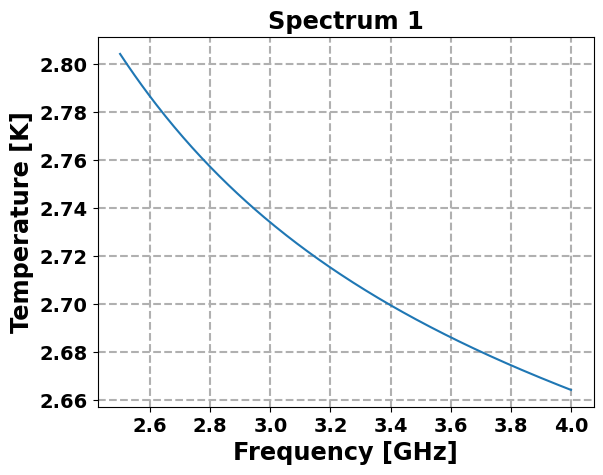

(251,)
Check if the graph plotted looks smooth if beam correction is done


/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_43050/2334391160.py:62: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  p1 = fmin(chisq1, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)


 
chisq1 =  4.547569206185471e-07
2.7255312711929913 -0.8592515162923826 -3.011895125736189
 


/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_43050/2334391160.py:70: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  p1 = fmin(chisq2, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)


 
chisq2 =  8.68920673613961e-09
2.725479818006946 -0.8590855219985527 -3.0110831558094358 0.0076953973409228035
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 370
         Function evaluations: 742
 
chisq3 =  6.330510671544092e-09
2.725487369320602 -0.8591091632847097 -3.01125488197692 0.007301334976272834 -0.002611891653656404
 


/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_43050/2334391160.py:86: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  p1 = fmin(chisq4, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)


 
chisq4 =  6.329968432121021e-09
2.7254873110446973 -0.8591089793632352 -3.011253733373548 0.007308819853082123 -0.0026288483730379387 9.72778321159567e-05
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 363
         Function evaluations: 782
 
chisq5 =  6.329478144411247e-09
2.7254873331093723 -0.8591090490933524 -3.0112541628119454 0.0073060277968890735 -0.0026258175564123284 9.375405553851203e-05 -9.14073505147053e-05
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 471
         Function evaluations: 980
 
chisq6 =  6.328962841314803e-09
2.725487203755021 -0.8591086420297586 -3.011251472293499 0.007319130866226112 -0.002634421207816229 0.00023422340009377824 -9.14073512926092e-05 -3.0149669350393987e-09
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 626
         Function evaluations: 1221
 
chisq7 =  6.327316067866148e-

/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_43050/2334391160.py:125: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  p1 = fmin(chisq9, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)


 
chisq9 =  6.327315305029905e-09
2.7254872031014856 -0.859108640045753 -3.0112514640174948 0.007319863474567028 -0.0026484476053983937 0.0003361910339415255 -0.00032940702550188466 2.7103383061775963e-08 -3.243423665779655e-12 -1.3168293967808915e-19 0.0
 
chisq10 =  6.327315305029905e-09
2.7254872031014856 -0.859108640045753 -3.0112514640174948 0.007319863474567028 -0.0026484476053983937 0.0003361910339415255 -0.00032940702550188466 2.7103383061775963e-08 -3.243423665779655e-12 -1.3168293967808915e-19 0.0 0.0
 


/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_43050/2334391160.py:132: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  p1 = fmin(chisq10, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)


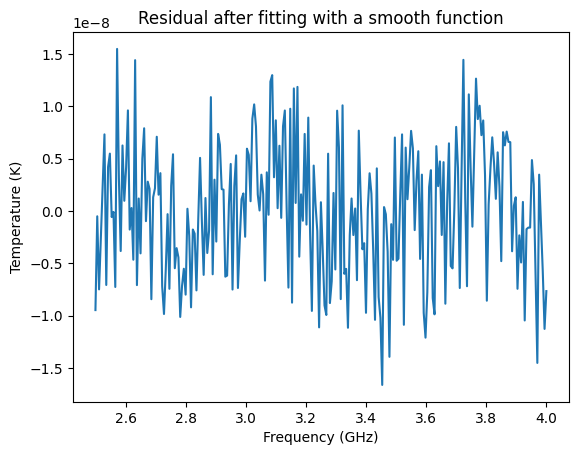

251
251
()


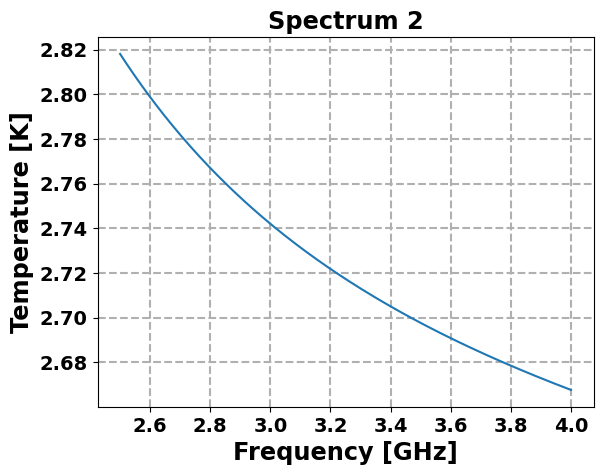

(251,)
Check if the graph plotted looks smooth if beam correction is done
 
chisq1 =  5.311483389453754e-07
2.725539784351044 -0.8180060450140023 -3.0128015136542854
 
 
chisq2 =  8.948840689530162e-09
2.7254797303603437 -0.8178298551421543 -3.0119396130836105 0.008173706970232725
 


/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_43050/2334391160.py:78: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  p1 = fmin(chisq3, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)


 
chisq3 =  6.625876865745786e-09
2.725487354932649 -0.8178515624767606 -3.012097338952252 0.0078117299673763855 -0.0024000316203946475
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 381
         Function evaluations: 765
 
chisq4 =  6.623948709074957e-09
2.7254872168476982 -0.8178511667082795 -3.0120948090460784 0.007826589190049915 -0.002426371146049485 0.00018378496127382106
 


/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_43050/2334391160.py:94: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  p1 = fmin(chisq5, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)


 
chisq5 =  6.573531286901048e-09
2.7254836592689218 -0.8178409999663506 -3.012026017597937 0.008125476453400787 -0.0025479509650234563 0.004667475228334364 -0.004573263055064364
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 875
         Function evaluations: 1553
 
chisq6 =  6.5465582161726685e-09
2.725483211668541 -0.8178397284795058 -3.01201642776703 0.008138252052347372 -0.0023325123317730805 0.004450296182451838 -0.00457326589284607 0.00034754321485262263
 


/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_43050/2334391160.py:110: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  p1 = fmin(chisq7, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)


 
chisq7 =  6.546352673331039e-09
2.7254832092864083 -0.8178397210439974 -3.0120164498819344 0.008140096529368007 -0.0023460098053337667 0.004487347815807682 -0.004573265638951804 0.00039419859818805867 -0.00021392325336787212
 


/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_43050/2334391160.py:118: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  p1 = fmin(chisq8, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)


 
chisq8 =  6.545915219090916e-09
2.725483175897638 -0.8178396252610224 -3.0120158437192313 0.008143793860651002 -0.0023537722762280227 0.00454009481839145 -0.004573265851344686 0.0003057363705563868 -0.0002139232558674729 -5.247117638138926e-10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 261
         Function evaluations: 842
 
chisq9 =  6.545914399709412e-09
2.7254831758741007 -0.8178396251983353 -3.0120158429016852 0.008143794615466092 -0.002353771697776437 0.004540095859410259 -0.004573265850151733 0.0003057364406294887 -0.00021392325586352905 -5.247118840490892e-10 1.4577097497858206e-13
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 232
         Function evaluations: 850
 
chisq10 =  6.545914335054658e-09
2.725483175870351 -0.8178396251856079 -3.0120158427723283 0.00814379472644939 -0.0023537717297791865 0.004540095921461477 -0.004573265849841797 0.00030573644481693006 -

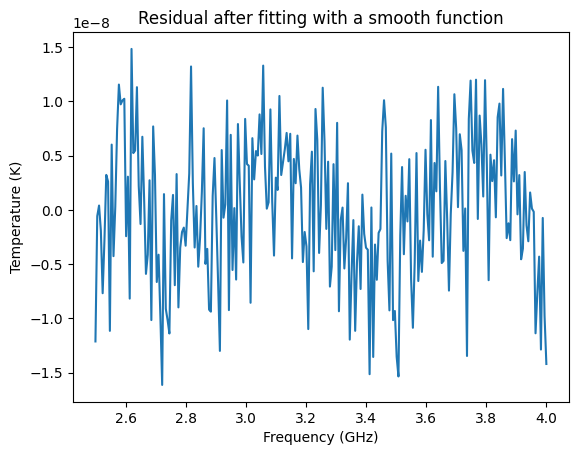

251
251
()


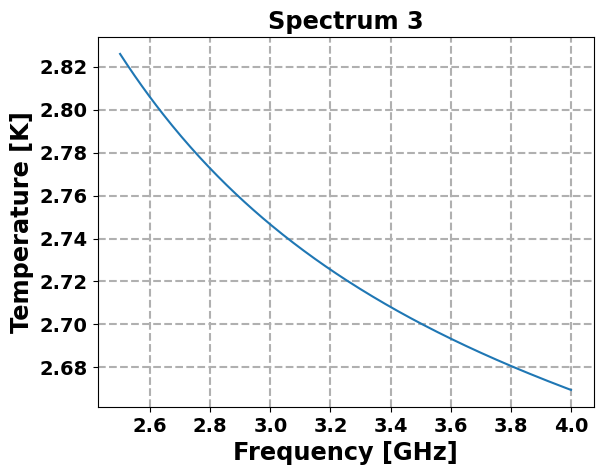

(251,)
Check if the graph plotted looks smooth if beam correction is done
 
chisq1 =  5.801685706556981e-07
2.725545180096271 -0.7959109293474474 -3.0142988148740444
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 257
         Function evaluations: 543
 
chisq2 =  8.178620570645621e-09
2.7254796715943437 -0.7957282645579897 -3.0134051855041273 0.008484483124432209
 
 
chisq3 =  6.349399159170328e-09
2.7254861965124415 -0.7957459192570935 -3.0135335349859607 0.00818993094691043 -0.001955054628847803
 
 
chisq4 =  6.322038909017159e-09
2.72548301818307 -0.7957372959939938 -3.0134738088319826 0.00840323730847861 -0.0015840492049039954 0.0015212488365092124
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 631
         Function evaluations: 1216
 
chisq5 =  6.277967049608889e-09
2.725482373416629 -0.7957355402423947 -3.0134627228736495 0.008480388390638364 -0.00192326254372024 0.0039

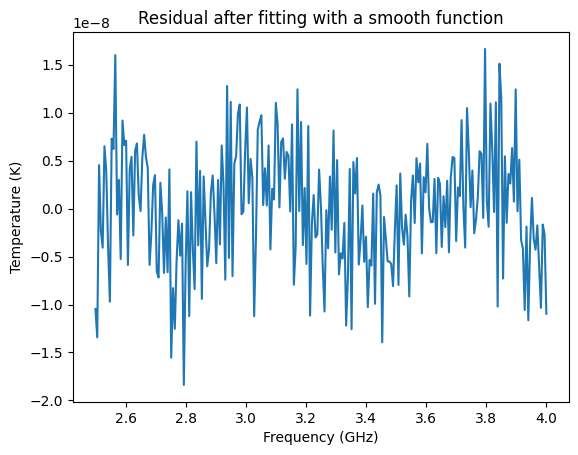

251
251
()


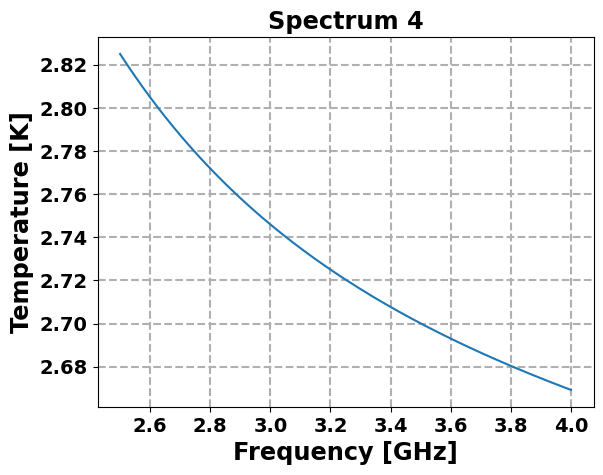

(251,)
Check if the graph plotted looks smooth if beam correction is done
Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 262
         Function evaluations: 519
 
chisq1 =  5.838131072419363e-07
2.7255454946916418 -0.7985638433431725 -3.0160260211255796
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 251
         Function evaluations: 512
 
chisq2 =  8.789963287085498e-09
2.7254796856271164 -0.7983792079555212 -3.015122713809874 0.00858851611903481
 
 
chisq3 =  6.178297870041016e-09
2.7254875810573447 -0.7984007016517229 -3.0152790762922956 0.008229714383715928 -0.0023851894026967755
 
 
chisq4 =  6.131819482683445e-09
2.7254831047368313 -0.7983884798629495 -3.0151947370542276 0.008541502583036834 -0.0019376367140638026 0.0023709669599005657
 
 
chisq5 =  6.1317876395306985e-09
2.7254830994090478 -0.7983884654471349 -3.015194627825999 0.008541695292119842 -0.0019358499320959416 

/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_43050/2334391160.py:102: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  p1 = fmin(chisq6, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)


 
chisq6 =  6.13178731660376e-09
2.7254830993734394 -0.7983884653576804 -3.0151946270074808 0.008541698487696057 -0.0019358549866294594 0.0023709669527514346 7.626858911520273e-11 -3.284405447747057e-13
 
 
chisq7 =  6.131787312207707e-09
2.7254830993734394 -0.7983884653576804 -3.0151946270074808 0.008541698487696057 -0.0019358549866491787 0.0023709669527514346 7.793696450209778e-11 -3.284405447747057e-13 0.0
 
 
chisq8 =  6.131787312207707e-09
2.7254830993734394 -0.7983884653576804 -3.0151946270074808 0.008541698487696057 -0.0019358549866491787 0.0023709669527514346 7.793696450209778e-11 -3.284405447747057e-13 0.0 0.0
 
chisq9 =  6.131787288799828e-09
2.7254830993734394 -0.7983884653595683 -3.0151946270074808 0.008541698487696057 -0.0019358549866491787 0.0023709669527514346 7.793696450209778e-11 -3.284405447747057e-13 0.0 0.0 0.0
 
chisq10 =  6.1317872845146305e-09
2.7254830993734394 -0.7983884653595683 -3.0151946270074808 0.008541698487699164 -0.0019358549866512914 0.0023709669527514

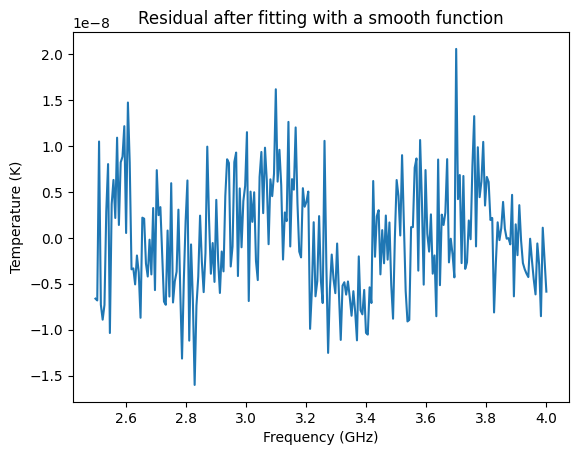

251
251
()


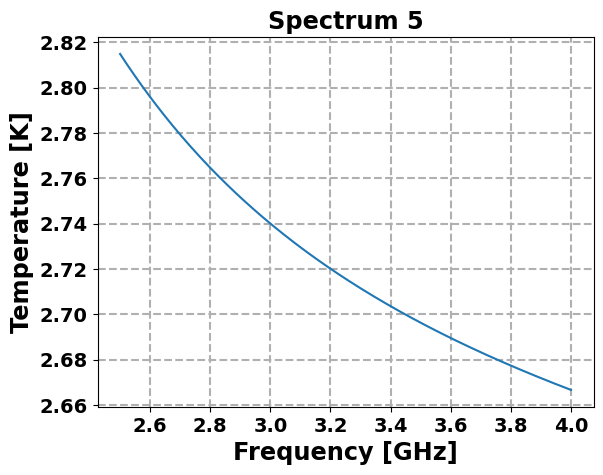

(251,)
Check if the graph plotted looks smooth if beam correction is done
 
chisq1 =  5.377272192744751e-07
2.7255401376812003 -0.8273742745784632 -3.0176557247031277
 
 
chisq2 =  8.916239927678921e-09
2.7254796242178307 -0.8271928429428419 -3.0167680753296193 0.008451415379402059
 
 
chisq3 =  6.3993511967430245e-09
2.725487446429249 -0.8272155979348272 -3.016933716760202 0.008071347856924265 -0.0025303871088407657
 
 
chisq4 =  6.395827803591365e-09
2.7254870769606603 -0.827214517809363 -3.0169265359461606 0.008105503287062554 -0.0025463691780932777 0.0003556106330710371
 
 
chisq5 =  6.3919854737303565e-09
2.7254871613586467 -0.8272147657747296 -3.0169280413776804 0.00809494970831742 -0.002530454736348397 0.0003279039297441788 -0.0003212725494874687
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 378
         Function evaluations: 850
 
chisq6 =  6.391977717000279e-09
2.7254871614277474 -0.8272147660406595 -3.0169280384591177 0

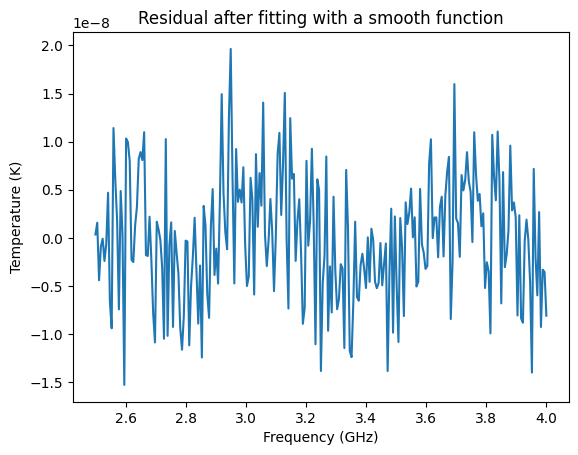

251
251
()


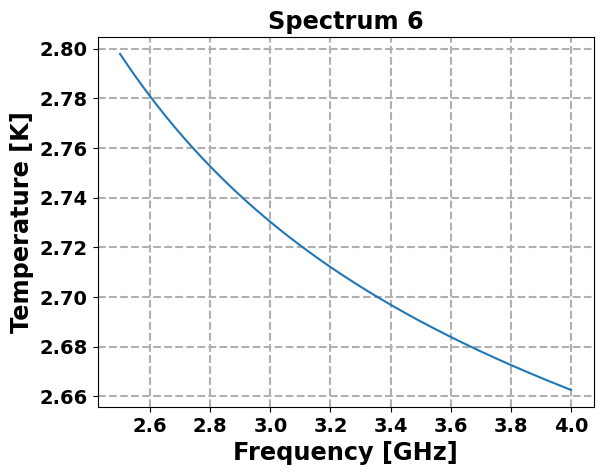

(251,)
Check if the graph plotted looks smooth if beam correction is done
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 256
         Function evaluations: 500
 
chisq1 =  4.50183213977627e-07
2.7255303058891793 -0.8796713988519276 -3.018852111650008
 
 
chisq2 =  8.326812131242885e-09
2.725479712305331 -0.879500289315839 -3.0180149750525054 0.007979341454457273
 
 
chisq3 =  6.23586896595458e-09
2.7254866498386043 -0.8795230537788006 -3.018180768001358 0.007599018679064918 -0.0025359779563294393
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 645
         Function evaluations: 1183
 
chisq4 =  6.207534837254173e-09
2.725482762868263 -0.8795102599365183 -3.0180925069996816 0.00792878507297659 -0.002091397758091877 0.0025614360038494497
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 323
         Function evaluations: 723
 
c

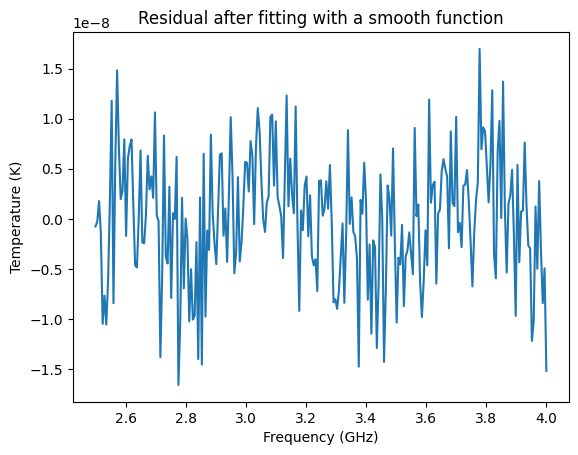

251
251
()


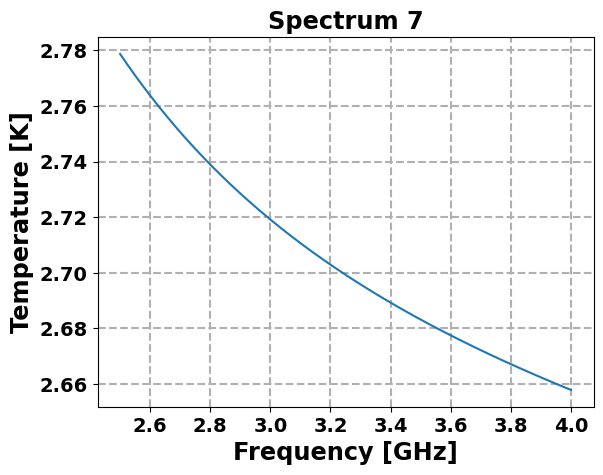

(251,)
Check if the graph plotted looks smooth if beam correction is done
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 250
         Function evaluations: 505
 
chisq1 =  3.4337371148833286e-07
2.725518372759667 -0.9480870326345747 -3.019178536754179
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 237
         Function evaluations: 488
 
chisq2 =  8.315868801325434e-09
2.725479809866567 -0.9479343532166338 -3.018431628353576 0.007122905144327896
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 694
 
chisq3 =  5.922238233739038e-09
2.725487139673574 -0.9479625097728854 -3.0186367344144003 0.0066525466015133 -0.003139969288805166
 
 
chisq4 =  5.921949354293726e-09
2.7254871103844223 -0.9479623961542424 -3.018636050554731 0.006657874864604172 -0.003156421312105647 7.63507412487757e-05
 
 
chi

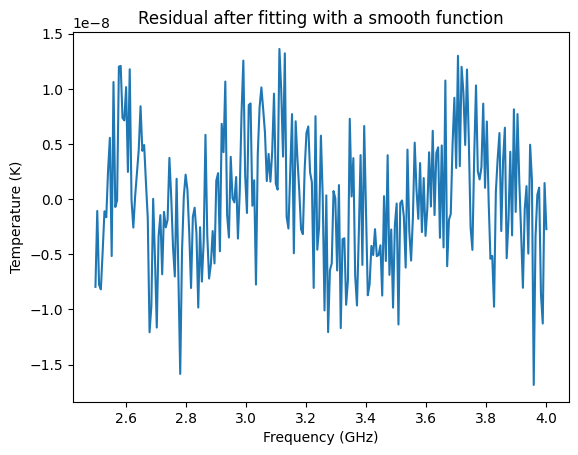

251
251
()


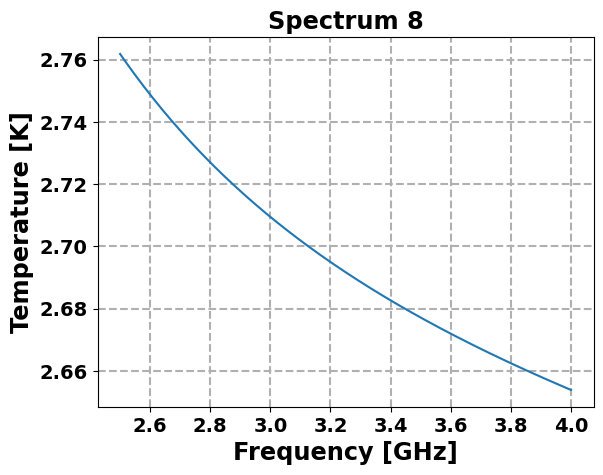

(251,)
Check if the graph plotted looks smooth if beam correction is done
 
chisq1 =  2.4289220038706665e-07
2.725507097482921 -1.0182355813805064 -3.0181154402210795
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 235
         Function evaluations: 497
 
chisq2 =  8.154112737973821e-09
2.7254798077877638 -1.018108593599957 -3.01749429417411 0.005920155440497185
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 348
         Function evaluations: 718
 
chisq3 =  6.154034538822398e-09
2.72548652572175 -1.01813892538277 -3.0177151794390635 0.005413778338820853 -0.0033810413755295016
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 336
         Function evaluations: 714
 
chisq4 =  6.152560360364351e-09
2.72548646427554 -1.0181386450766117 -3.0177135136766076 0.005427452760823453 -0.003426340807535377 0.00020111898334298947
 
Opti

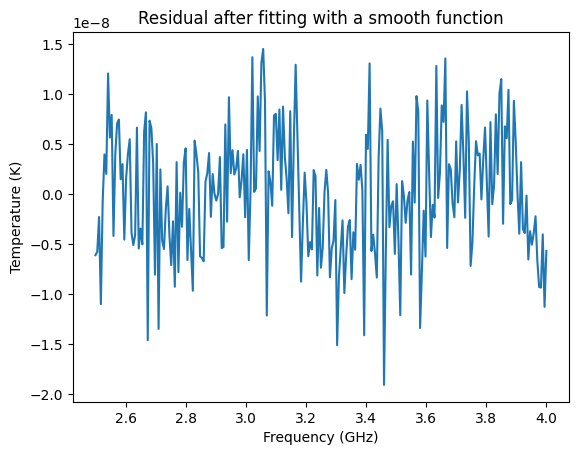

251
251
()


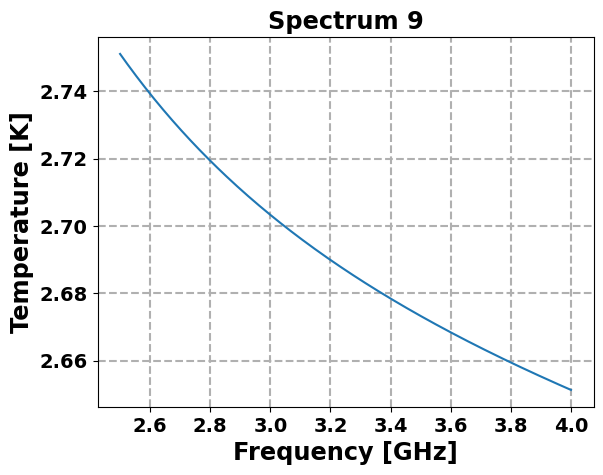

(251,)
Check if the graph plotted looks smooth if beam correction is done
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 266
         Function evaluations: 528
 
chisq1 =  1.6897885860957937e-07
2.7254988824609003 -1.0696445373033239 -3.015679434013548
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 245
         Function evaluations: 495
 
chisq2 =  8.664255674217228e-09
2.7254798733055647 -1.0695449680841644 -3.0151924917728987 0.00463331333092809
 
 
chisq3 =  6.593020731665391e-09
2.7254869457150788 -1.0695809157947593 -3.01545406010051 0.004033814090490909 -0.00399887502115808
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 292
         Function evaluations: 646
 
chisq4 =  6.592501940399722e-09
2.7254869076012986 -1.0695807200525227 -3.015452896357951 0.004043318593417078 -0.004030352749442374 0.00014040363716637358
 
O

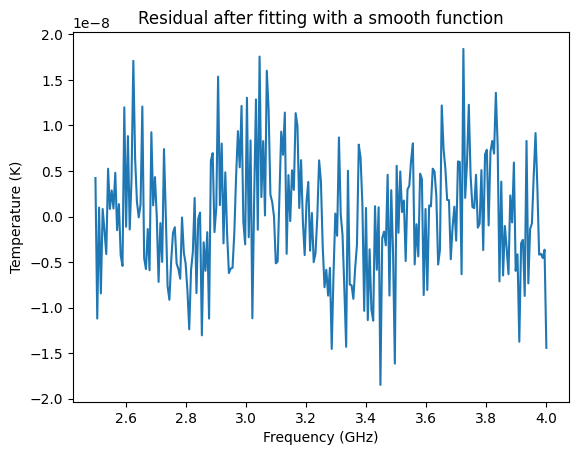

251
251
()


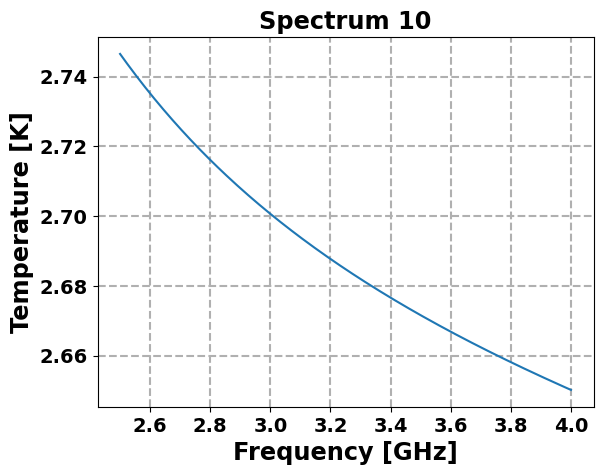

(251,)
Check if the graph plotted looks smooth if beam correction is done
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 230
         Function evaluations: 476
 
chisq1 =  1.3204296115817502e-07
2.725494759010783 -1.0938643538360444 -3.012853774014068
 
 
chisq2 =  8.010356295245872e-09
2.725479874891099 -1.093781924253039 -3.012450700772039 0.0038269961182427602
 
 
chisq3 =  6.095028311498026e-09
2.7254864324314614 -1.0938171682381146 -3.0127068877230934 0.003239844356694779 -0.003909029544333387
 
 
chisq4 =  6.072706744014704e-09
2.7254827171052565 -1.0937971410570237 -3.0125688020652435 0.0037503317717384136 -0.003179527084461635 0.003894076342533555
 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 367
         Function evaluations: 782
 
chisq5 =  6.072693189330141e-09
2.725482717054444 -1.0937971408001097 -3.012568801944825 0.0037503355305907645 -0.0031794530817641845 0.00

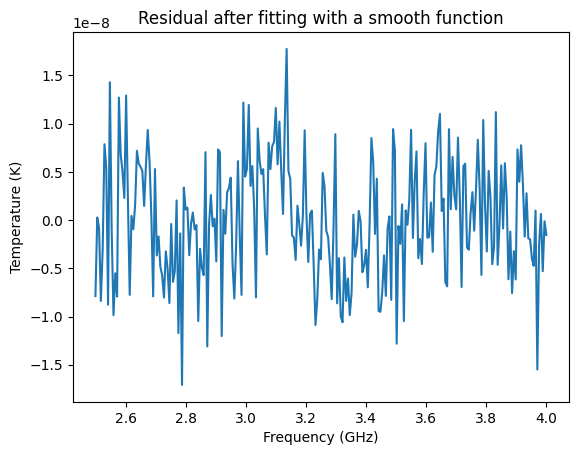

[[-9.4738883404943408e-09 -5.0286441677371840e-10 -7.4934414229232971e-09
  ... -5.7336326797496895e-09 -1.1274924549553589e-08
  -7.6594446341005096e-09]
 [-1.2123360537685812e-08 -5.6632920575339085e-10  4.0513770116490377e-10
  ... -7.3836048386510811e-10 -9.7686729816359730e-09
  -1.4201155362769668e-08]
 [-1.0470983191623873e-08 -1.3421785460820956e-08  4.5348969024416874e-09
  ... -1.6624777110507694e-09 -2.6799726882131836e-09
  -1.0966820784830134e-08]
 ...
 [-6.0925260392252767e-09 -5.7624851557136481e-09 -2.2789334863659860e-09
  ... -4.0094958464464980e-09 -1.1255172793767088e-08
  -5.6655999891574993e-09]
 [ 4.2273469169629152e-09 -1.1202756056150065e-08  9.8088737132684400e-10
  ... -4.5533927739427327e-09 -3.6420946258886033e-09
  -1.4415093119168887e-08]
 [-7.8777806500340830e-09  2.6725732737986618e-10 -8.4657170162927287e-10
  ... -5.3045670078688545e-09 -1.2411449645810535e-10
  -1.5486190108049414e-09]]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

# Assuming x0, spectra_list, and freqs are defined elsewhere in your code
residuals = []  # Initialize the residuals list

for i in range(n_spectra):
    # Assuming x0 and spectra are defined elsewhere in your code
    x1 = x0
    x1log = np.log10(x1)
    print(x1log.size)
    
    # Ensure spectra_list[i] is a numpy array
    y1 = np.array(spectra_list[i])
    print(y1.size)
    
    # Option 1: Fit the spectrum directly (without beam correction)
    # Uncomment if needed
    # y1log = np.log10(y1)
    
    # Option 2: Correct for the S11, by fitting the gamma value and correcting the spectrum
    # Uncomment the following lines if beam correction is needed
    # gamma_val_for_freqs = gamma_func(freqs)
    # p = np.polyfit(freqs, 1 - np.power(gamma_val_for_freqs, 2), 50)
    # gamma_val_fit = np.polyval(p, freqs) 
    # for ii in range(0, 12):  # Averaging spectrum over 12 spectra
    #     y1 = np.divide(spectra[0], gamma_val_fit)
    
    # Check if y1 is not empty
    if y1.size == 0:
        print("Error: y1 array is empty.")
    else:
        y1ave = np.average(y1, axis=0)
        print(y1ave.shape)
    
        # Ensure y1ave is used if averaging is done
        plt.plot(freqs, y1 if 'y1ave' in locals() else y1)
        plt.xlabel('Frequency [GHz]', fontsize='xx-large', fontweight='bold')
        plt.ylabel('Temperature [K]', fontsize='xx-large', fontweight='bold')
        plt.title(f'Spectrum {i + 1}', fontsize='xx-large', fontweight='bold')
        plt.xticks(fontsize=14, fontweight='bold')
        plt.yticks(fontsize=14, fontweight='bold')
        plt.grid(linewidth=1.5, linestyle='--')
        plt.show()
    
        # Ensure non-negative values for logarithm
        if np.any(y1 <= 0):
            print("Error: y1 contains non-positive values, cannot compute log10.")
        else:
            y1log = np.log10(y1)
            print(y1log.shape)
            print('Check if the graph plotted looks smooth if beam correction is done')
    
            p12 = np.poly1d(np.polyfit(x1log, y1log, 10))
            yfit_poly = p12(x1log)
            yres_poly = (10.0**yfit_poly) - y1
    
            # Initial guess for optimization
            p00 = [np.log10(3.0), 1.0, -2.5]
            
            p1 = fmin(chisq1, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            current_chisq = chisq1(p1, x1, y1)
            print(" ")
            print("chisq1 = ", current_chisq)
            print(10.0**p1[0], p1[1], p1[2])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], 0.0]
            p1 = fmin(chisq2, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq2(p1, x1, y1)
            print(" ")
            print("chisq2 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], 0.0]
            p1 = fmin(chisq3, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq3(p1, x1, y1)
            print(" ")
            print("chisq3 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], 0.0]
            p1 = fmin(chisq4, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq4(p1, x1, y1)
            print(" ")
            print("chisq4 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], 0.0]
            p1 = fmin(chisq5, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq5(p1, x1, y1)
            print(" ")
            print("chisq5 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], 0.0]
            p1 = fmin(chisq6, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq6(p1, x1, y1)
            print(" ")
            print("chisq6 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], 0.0]
            p1 = fmin(chisq7, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq7(p1, x1, y1)
            print(" ")
            print("chisq7 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8])
            print(" ")
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], 0.0]
            p1 = fmin(chisq8, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq8(p1, x1, y1)
            print(" ")
            print("chisq8 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9])
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9], 0.0]
            p1 = fmin(chisq9, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq9(p1, x1, y1)
            print(" ")
            print("chisq9 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9], p1[10])
    
            p00 = [p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9], p1[10], 0.0]
            p1 = fmin(chisq10, p00, args=(x1, y1), ftol=1.0e-20, maxiter=50000, maxfun=100000)
            final_chisq = chisq10(p1, x1, y1)
            print(" ")
            print("chisq10 = ", final_chisq)
            print(10.0**p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6], p1[7], p1[8], p1[9], p1[10], p1[11])
            print(" ")
    
            yfit = func10(p1, x1)
            yres = y1 - yfit
            residuals.append(yres)
            
            # Plotting the residuals
            sp1 = y1 - yfit
            sp1 = sp1.flatten()
            sp2 = sp1 * 1e+9
            sp2 = np.array(sp2)

            np.savetxt(f'/Users/hshishir/Desktop/mcmc_fit/sp2/sp2_spectra{i}.txt', sp2)
            
            plt.plot(freqs, sp1)
            plt.ylabel('Temperature (K)')
            plt.xlabel('Frequency (GHz)')
            plt.title('Residual after fitting with a smooth function')
            plt.show()

residuals = np.asarray(residuals)
print(residuals)


File: sp2_spectra9.txt
Amplitude=3.156928561183578, Angular freq.=10.44970954736765, phase=0.7157075443777456, Max. Cov.=1.5191926556094628


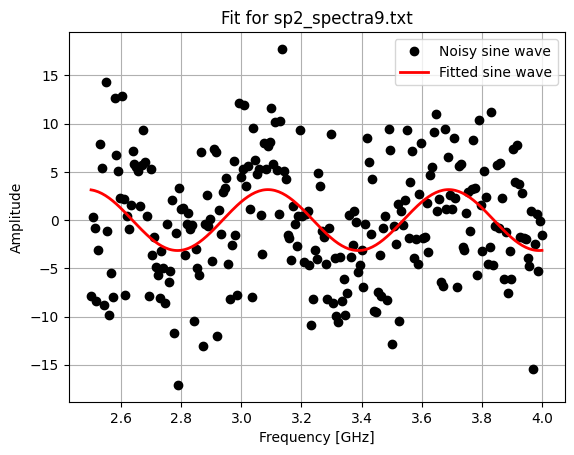

File: sp2_spectra8.txt
Amplitude=3.6877551990202178, Angular freq.=10.137811465547056, phase=1.6633503248491115, Max. Cov.=1.1823976078732907


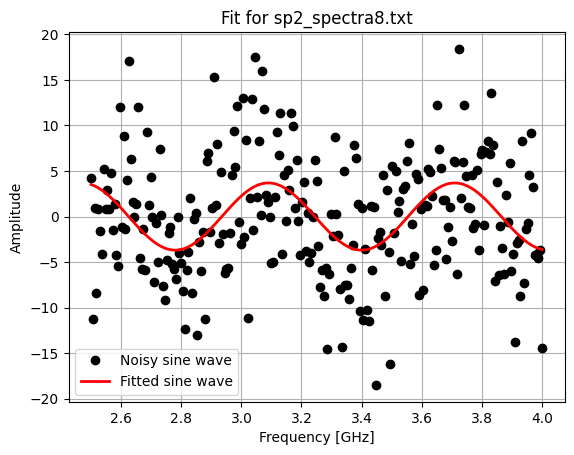

File: sp2_spectra6.txt
Amplitude=3.8996186334645695, Angular freq.=10.140699776463457, phase=1.574203257571476, Max. Cov.=0.7983918923650304


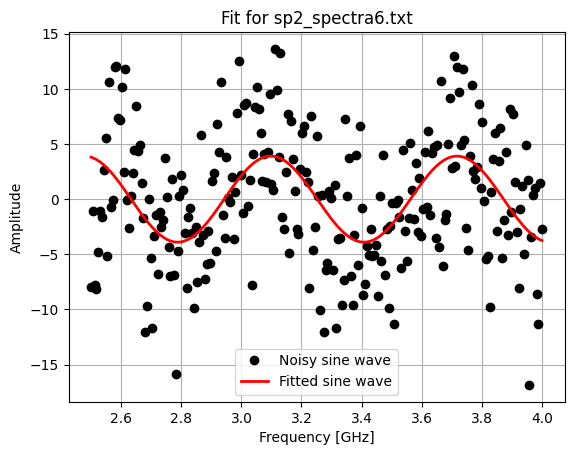

File: sp2_spectra7.txt
Amplitude=3.297284829183562, Angular freq.=9.635840293437989, phase=3.435528649877357, Max. Cov.=1.1806020990313137


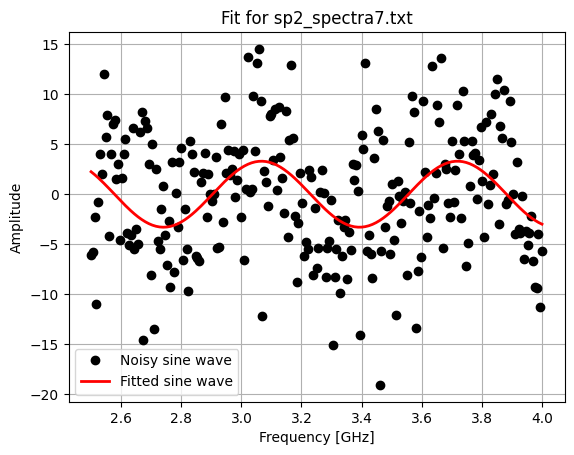

File: sp2_spectra5.txt
Amplitude=3.5259118249254255, Angular freq.=9.978674054442891, phase=1.945679338635716, Max. Cov.=1.1145210979565527


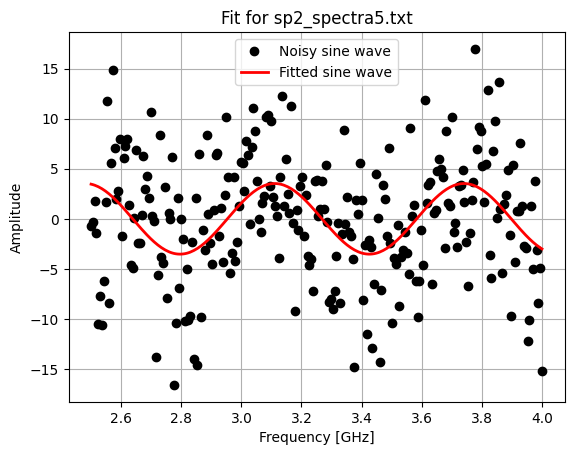

File: sp2_spectra4.txt
Amplitude=3.720317216886084, Angular freq.=9.886463357772032, phase=2.5532704433607787, Max. Cov.=1.0132824527047424


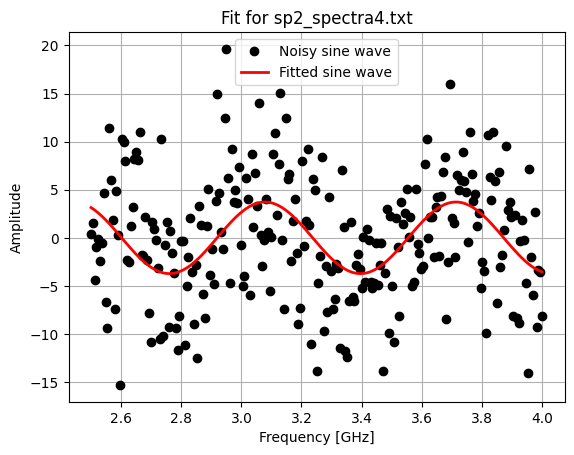

File: sp2_spectra0.txt
Amplitude=3.10901199409439, Angular freq.=9.867285921778421, phase=2.356677174514629, Max. Cov.=1.5116482128804465


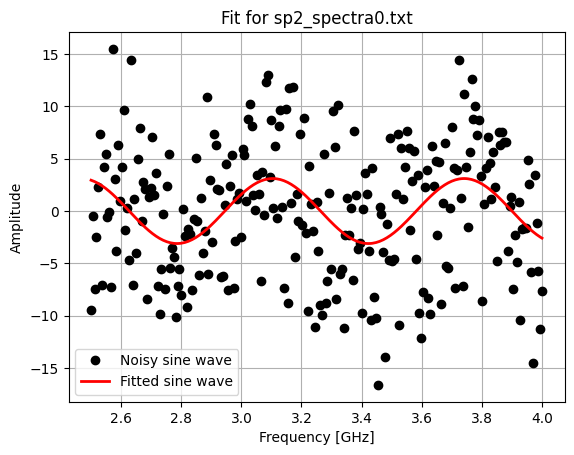

File: sp2_spectra1.txt
Amplitude=3.7145329434322543, Angular freq.=9.904434435029486, phase=2.119850608913792, Max. Cov.=1.1082025523341699


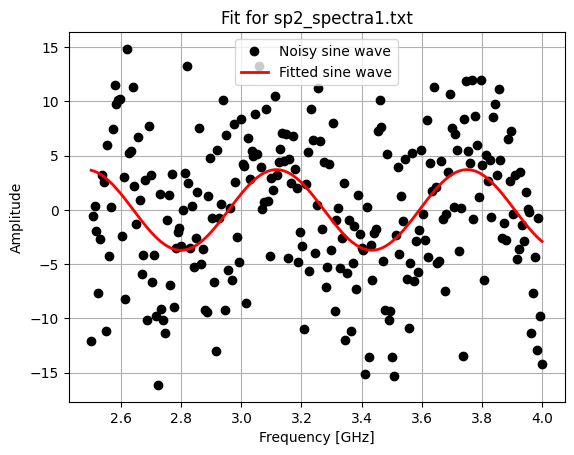

File: sp2_spectra3.txt
Amplitude=3.956977972616773, Angular freq.=10.11294913336918, phase=1.8458176887836615, Max. Cov.=0.8282780204857858


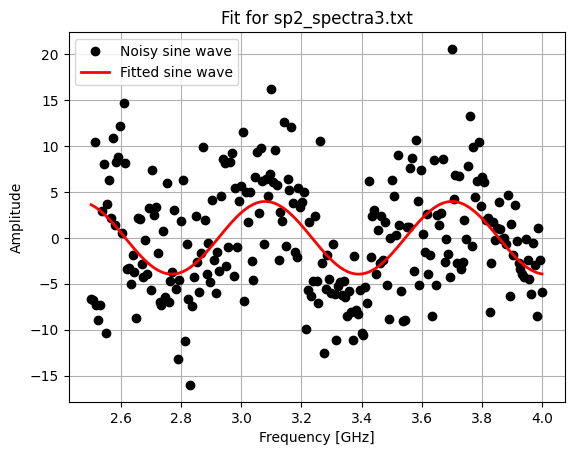

File: sp2_spectra2.txt
Amplitude=3.5996141453066266, Angular freq.=9.86307574716577, phase=2.4422635216713227, Max. Cov.=1.050056674405513


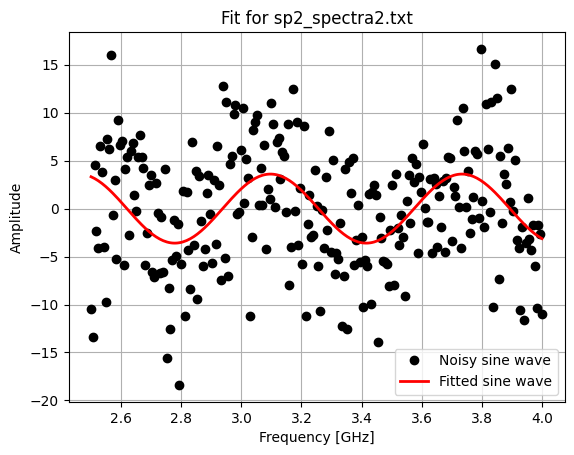

In [13]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import os

def fit_sin(tt, yy):
    '''Fit sine wave to the input time sequence, and return fitting parameters.'''
    tt = np.array(tt)
    yy = np.array(yy)
    
    # Calculate the FFT of the input data
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    
    # Initial guess for the fitting parameters
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # Exclude the zero frequency "peak"
    guess_amp = np.std(yy) * 2.**0.5
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0.]) # Initial guess for amplitude, angular frequency, and phase

    # Define the sine function to fit
    def sinfunc(t, A, w, p):
        return A * np.sin(w*t + p)

    # Perform the curve fitting
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p = popt
    f = w/(2.*np.pi)

    if p % (2 * np.pi) != 0:
        p = p % (2 * np.pi)
        p = np.mod(p, 2 * np.pi)
    
    # Define the fitted function
    fitfunc = lambda t: A * np.sin(w*t + p)
    
    # Return fitting parameters and fit function
    return {"amp": A, "omega": w, "phase": p, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess, popt, pcov)}

# Path to the directory containing the files
directory = '/Users/hshishir/Desktop/mcmc_fit/sp2/'

# List of filenames in the directory
files = [f for f in os.listdir(directory) if f.startswith('sp2_spectra') and f.endswith('.txt')]

# Iterate over each file, perform the fit, and plot the results
for file in files:
    # Read the data from the file
    filepath = os.path.join(directory, file)
    data = np.loadtxt(filepath)
    
    y_noise = data

    # Fit the noisy sine wave
    res = fit_sin(freqs, y_noise)

    # Print the fitting results
    print(f"File: {file}")
    print("Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, Max. Cov.=%(maxcov)s" % res)

    # Plot the original sine wave, noisy data, and fitted curve
    plt.figure()
    plt.plot(freqs, y_noise, "ok", label="Noisy sine wave")
    plt.plot(freqs, res["fitfunc"](freqs), "r-", label="Fitted sine wave", linewidth=2)
    plt.xlabel('Frequency [GHz]')
    plt.ylabel('Amplitude')
    plt.title(f'Fit for {file}')
    plt.legend(loc="best")
    plt.grid()
    plt.show()


File: sp2_spectra9.txt
Amplitude = 3.156928561183578
Omega = 1.663122928338134
Phase = 0.7157075443777456
Phase in deg = 41.01004229284482


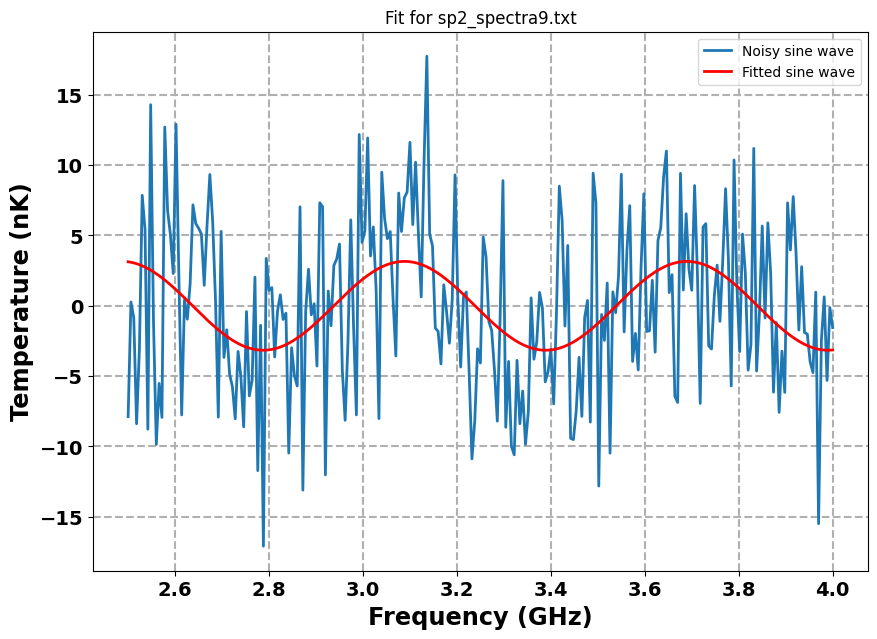

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp2/fit_sp2_spectra9.txt
File: sp2_spectra8.txt
Amplitude = 3.6877551990202178
Omega = 1.6134828068755058
Phase = 1.6633503248491115
Phase in deg = 95.30997361385408


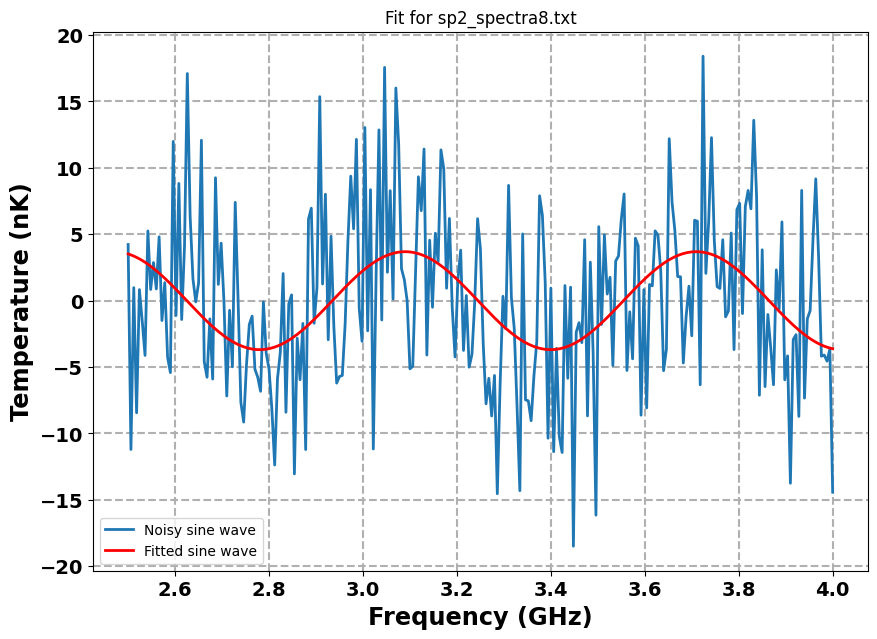

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp2/fit_sp2_spectra8.txt
File: sp2_spectra6.txt
Amplitude = 3.8996186334645695
Omega = 1.6139424958350372
Phase = 1.574203257571476
Phase in deg = 90.20184665884557


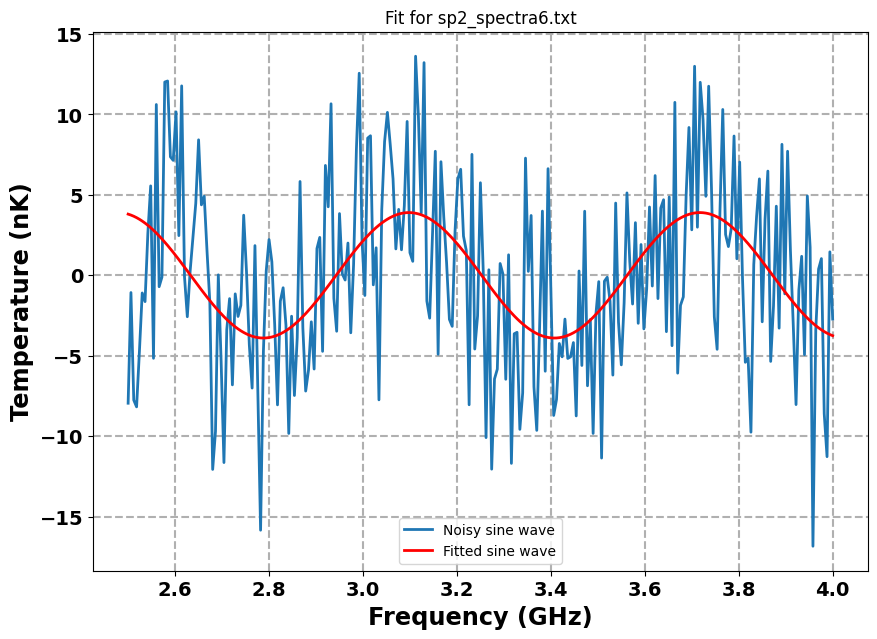

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp2/fit_sp2_spectra6.txt
File: sp2_spectra7.txt
Amplitude = 3.297284829183562
Omega = 1.5335916135447152
Phase = 3.435528649877357
Phase in deg = 196.85579163797254


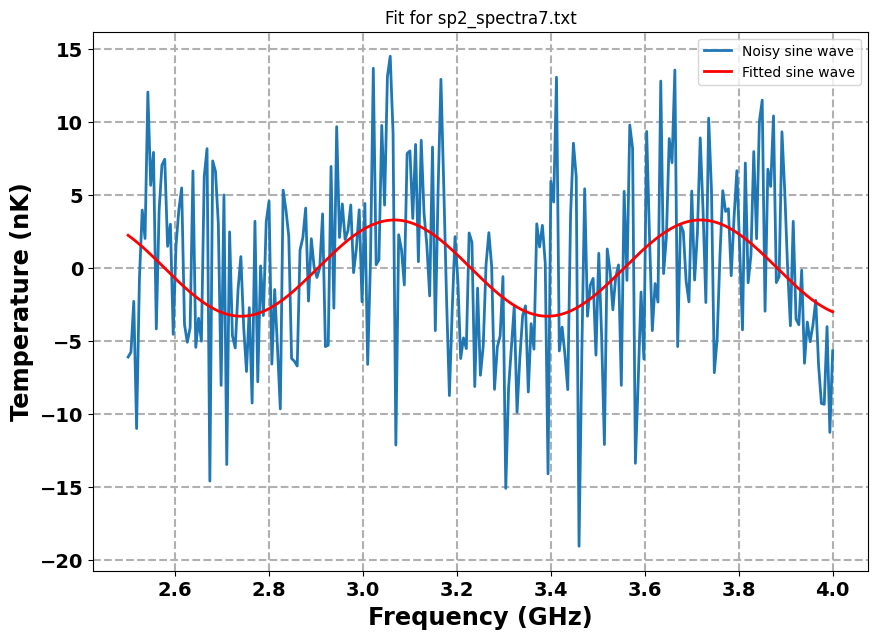

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp2/fit_sp2_spectra7.txt
File: sp2_spectra5.txt
Amplitude = 3.5259118249254255
Omega = 1.5881553012674308
Phase = 1.945679338635716
Phase in deg = 111.48742610382652


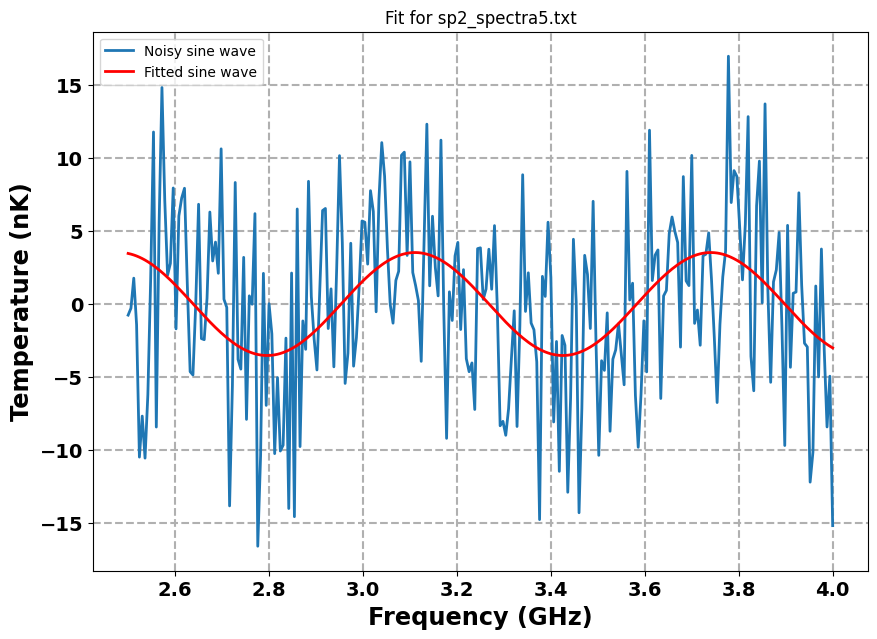

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp2/fit_sp2_spectra5.txt
File: sp2_spectra4.txt
Amplitude = 3.720317216886084
Omega = 1.5734795130863162
Phase = 2.5532704433607787
Phase in deg = 146.30239640457262


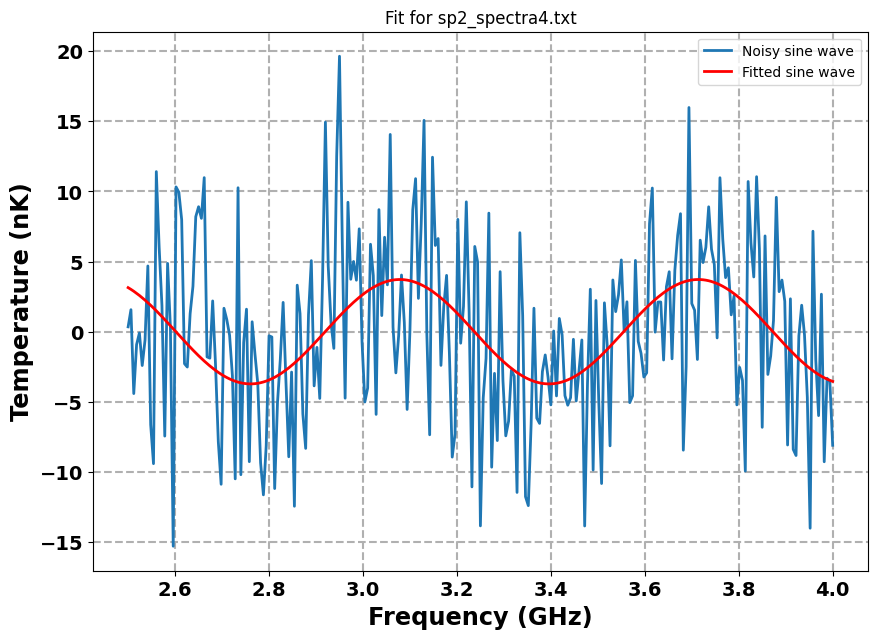

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp2/fit_sp2_spectra4.txt
File: sp2_spectra0.txt
Amplitude = 3.10901199409439
Omega = 1.5704273293521047
Phase = 2.356677174514629
Phase in deg = 135.03760209968823


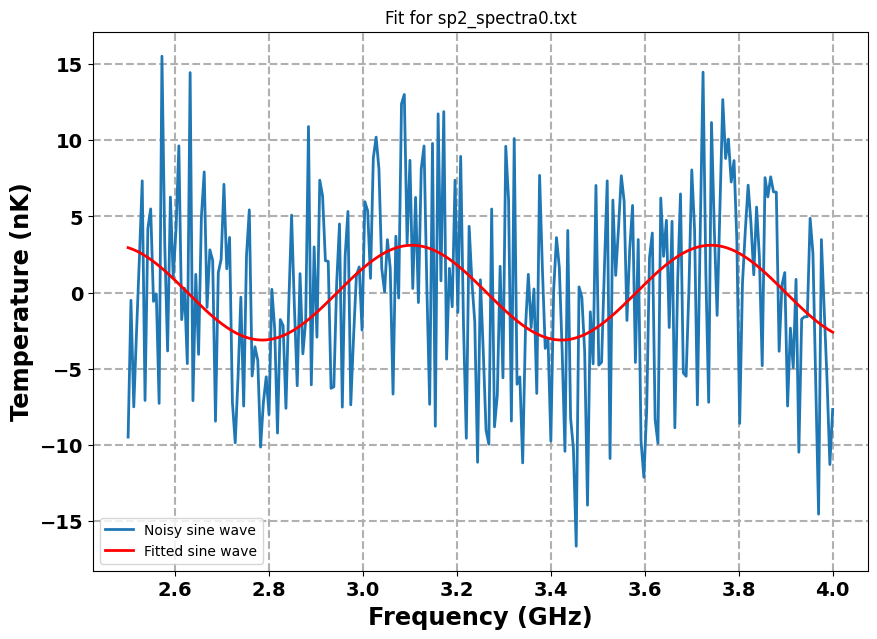

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp2/fit_sp2_spectra0.txt
File: sp2_spectra1.txt
Amplitude = 3.7145329434322543
Omega = 1.5763396988645264
Phase = 2.119850608913792
Phase in deg = 121.46743989076026


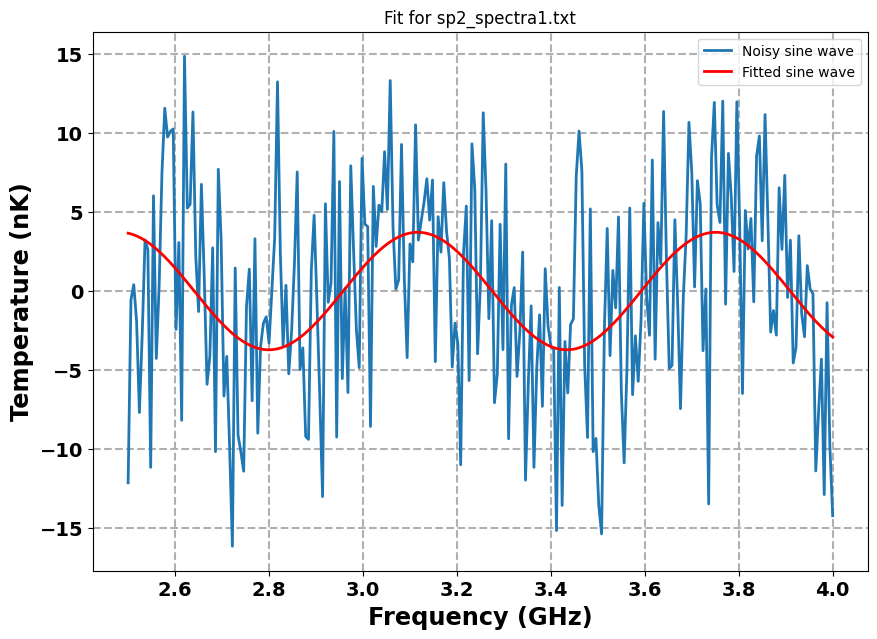

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp2/fit_sp2_spectra1.txt
File: sp2_spectra3.txt
Amplitude = 3.956977972616773
Omega = 1.609525843812604
Phase = 1.8458176887836615
Phase in deg = 105.76535356730379


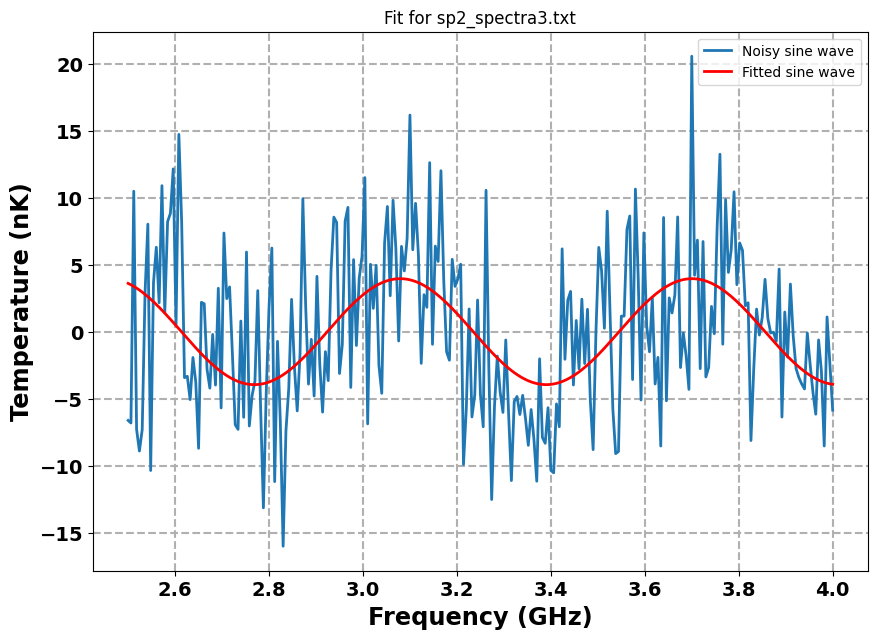

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp2/fit_sp2_spectra3.txt
File: sp2_spectra2.txt
Amplitude = 3.5996141453066266
Omega = 1.5697572592512212
Phase = 2.4422635216713227
Phase in deg = 139.94169979176678


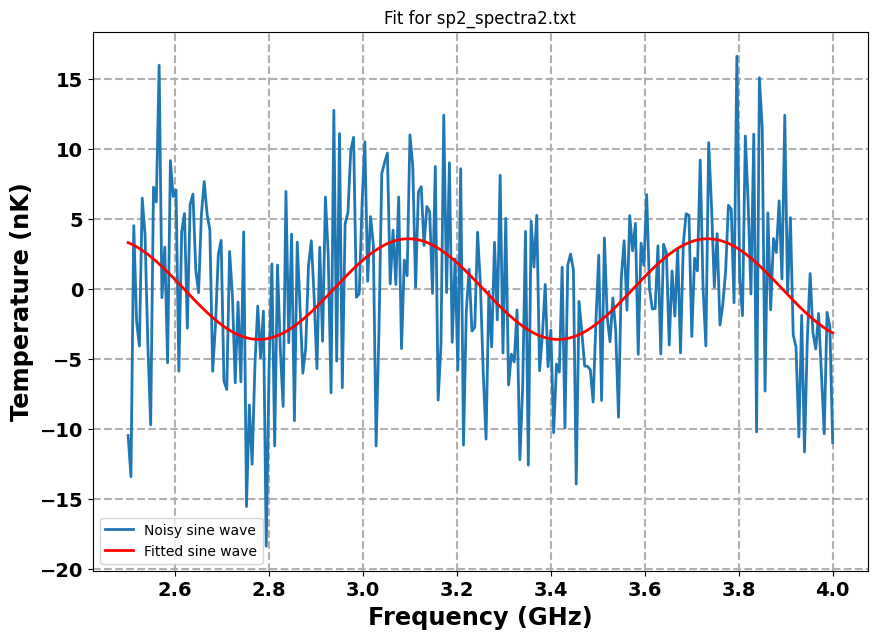

Fitted data saved to /Users/hshishir/Desktop/mcmc_fit/sp2/fit_sp2_spectra2.txt


In [14]:
directory = '/Users/hshishir/Desktop/mcmc_fit/sp2/'

# List of filenames in the directory
files = [f for f in os.listdir(directory) if f.startswith('sp2_spectra') and f.endswith('.txt')]

# Iterate over each file, perform the fit, plot the results, and save the fitted data
for file in files:
    # Read the data from the file
    filepath = os.path.join(directory, file)
    data = np.loadtxt(filepath)
    
    y_noise = data

    # Fit the noisy sine wave
    res = fit_sin(freqs, y_noise)

    # Extract fitting parameters
    amplitude = res["amp"]
    omega = res["omega"] / (2 * np.pi)
    phase = res["phase"]
    phase_deg = phase * 57.3

    # Print the fitting results
    print(f"File: {file}")
    print("Amplitude =", amplitude)
    print("Omega =", omega)
    print("Phase =", phase)
    print("Phase in deg =", phase_deg)

    # Plot the noisy data and fitted sine wave
    plt.figure(figsize=(10, 7))
    plt.plot(freqs, y_noise, label="Noisy sine wave", linewidth=2.0)
    plt.plot(freqs, amplitude * np.sin(2 * np.pi * freqs * omega + phase), "r-", label="Fitted sine wave", linewidth=2)
    plt.ylabel('Temperature (nK)', fontsize='xx-large', fontweight='bold')
    plt.xlabel('Frequency (GHz)', fontsize='xx-large', fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.grid(linewidth=1.5, linestyle='--')
    plt.legend(loc="best")
    plt.title(f'Fit for {file}')
    plt.show()

    # Save the fitted sine wave data to a new text file
    fitted_data = amplitude * np.sin(2 * np.pi * freqs * omega + phase)
    output_filepath = os.path.join(directory, f"fit_{file}")
    np.savetxt(output_filepath, fitted_data)
    print(f"Fitted data saved to {output_filepath}")


In [15]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

import emcee
import corner
import bilby

%matplotlib inline
rnd = np.random.RandomState(seed=42)

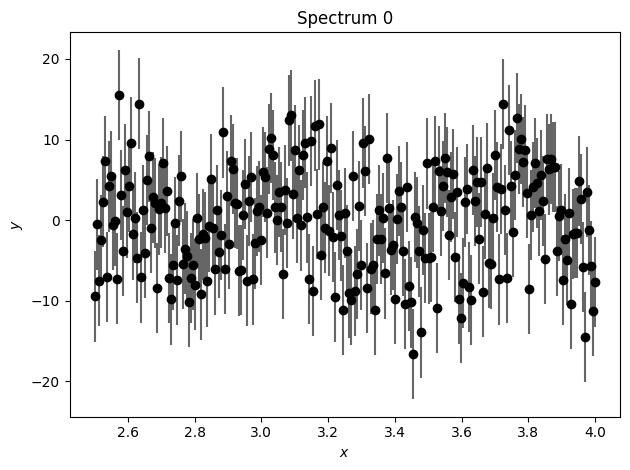

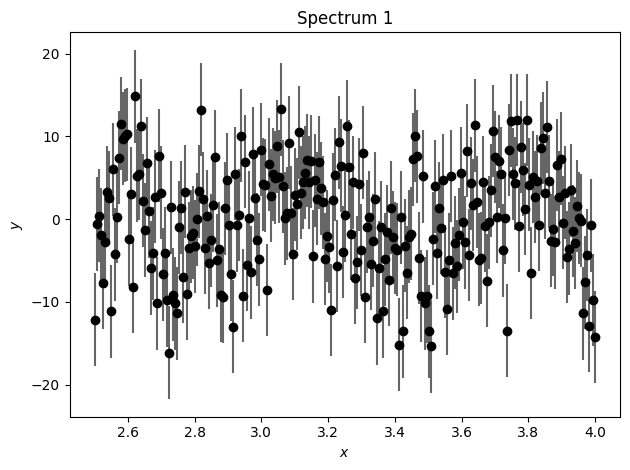

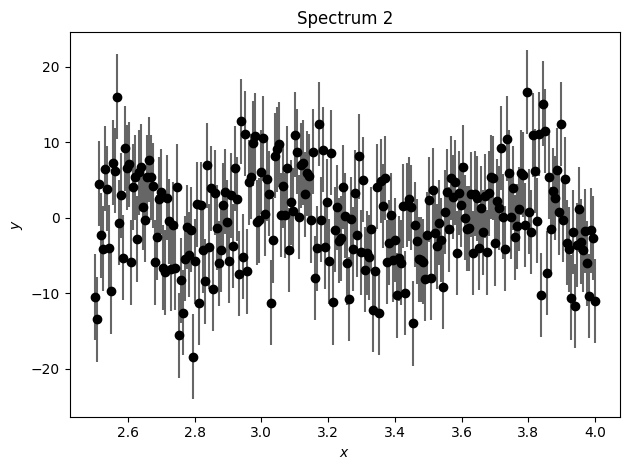

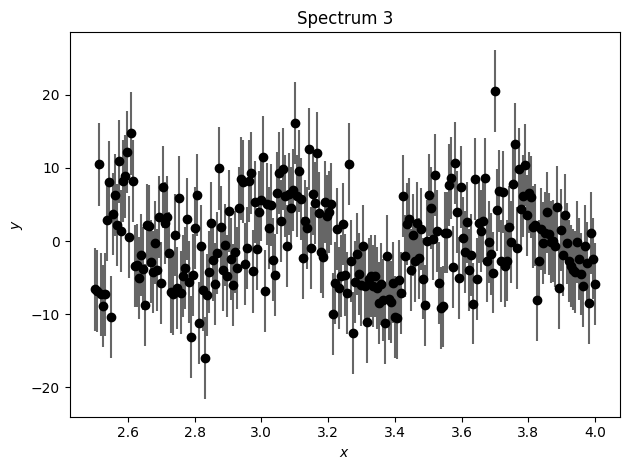

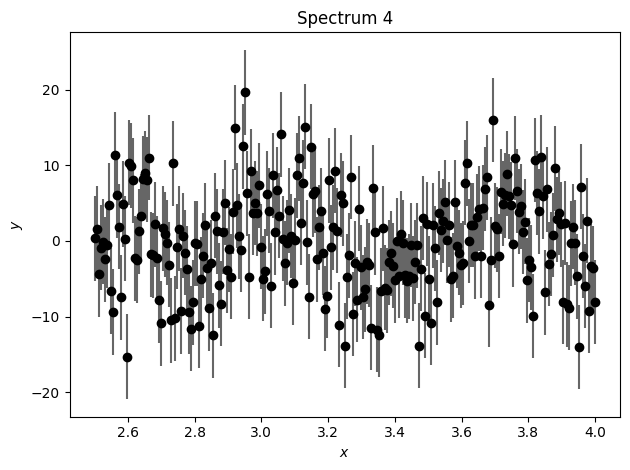

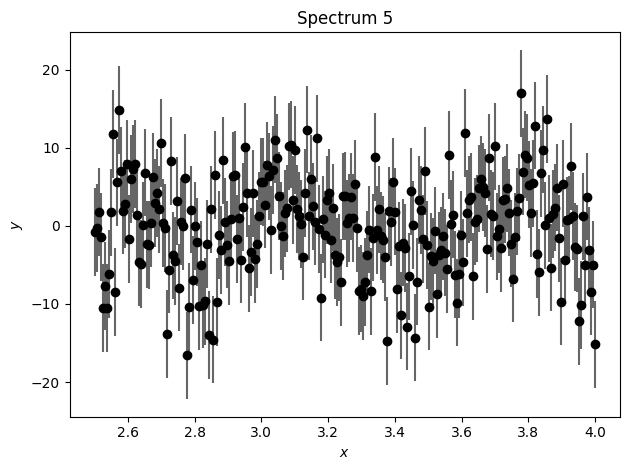

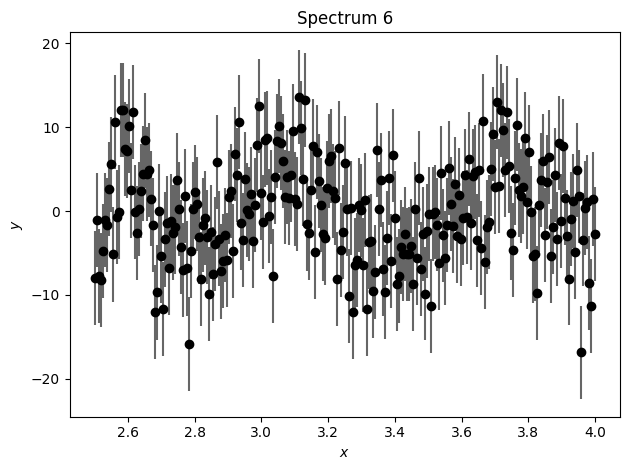

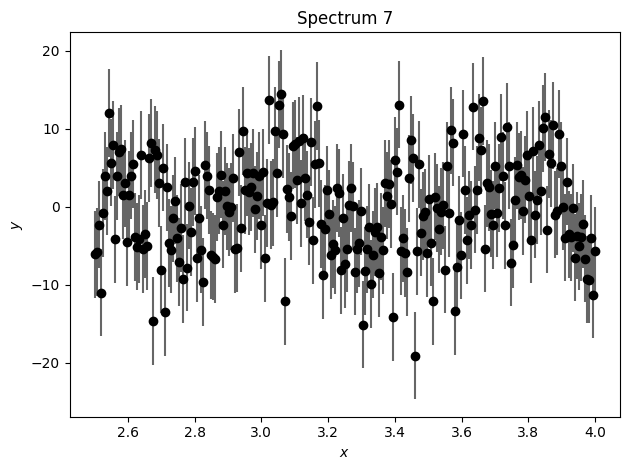

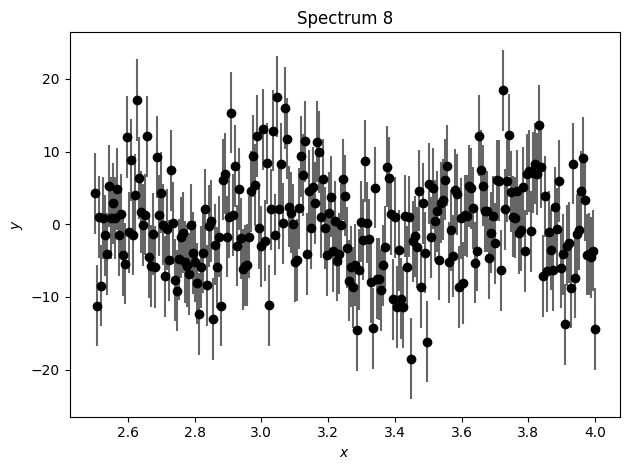

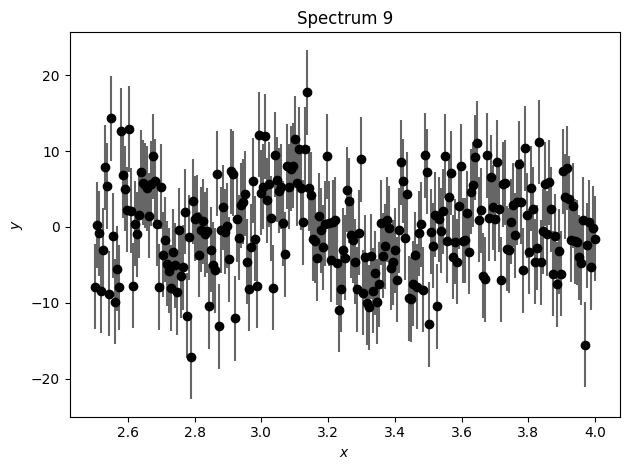

In [16]:
f_start = 2.5
f_stop = 4
No_of_Channels = 251
freqs = np.linspace(f_start, f_stop, No_of_Channels)

datastyle = dict(linestyle="none", marker="o", color="k", ecolor="#666666")

for i in range(n_spectra):
    
    plt.figure()
    
    # Load the y data and y_err data
    y = np.loadtxt(f'/Users/hshishir/Desktop/mcmc_fit/sp2/sp2_spectra{i}.txt')
    y_err = np.loadtxt(f'/Users/hshishir/Desktop/mcmc_fit/sigma_array/sigma_array_spectra{i}.txt')
    
    # Plot the data with error bars
    plt.errorbar(freqs, y, y_err, **datastyle)
    
    # Add labels and layout
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(f'Spectrum {i}')
    plt.tight_layout()
    
    # plt.savefig(f'/Users/hshishir/Desktop/mcmc_fit/plots/spectrum_{i}.png')
    plt.show()


Current parameters: [-2.99459739  1.51059062  0.47879896]
Current parameters: [-3.10055006  1.51170577  0.47605757]
Optimization terminated successfully.
         Current function value: 805.408262
         Iterations: 2
         Function evaluations: 75
Optimized parameters for spectrum 0: [3.10055006 1.51170577 3.61765022]


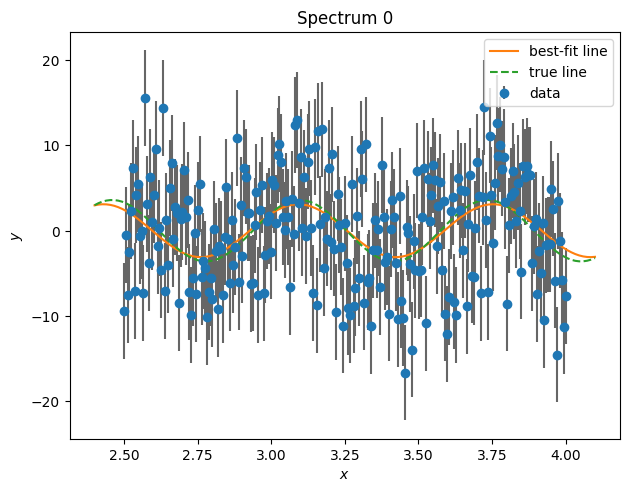

Current parameters: [-3.64631271  1.50597214  0.47606697]
Current parameters: [-3.69682675  1.50710266  0.4757407 ]
Optimization terminated successfully.
         Current function value: 808.946259
         Iterations: 2
         Function evaluations: 74
Optimized parameters for spectrum 1: [3.69682675 1.50710266 3.61733336]


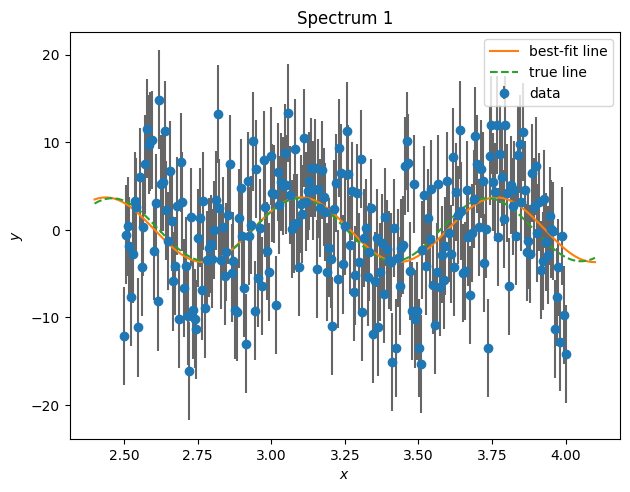

Current parameters: [-3.41094994  1.51336446  0.4794966 ]
Current parameters: [-3.58973653  1.51432008  0.45970989]
Current parameters: [-3.62405203  1.51542948  0.45586131]
Optimization terminated successfully.
         Current function value: 796.540004
         Iterations: 3
         Function evaluations: 106
Optimized parameters for spectrum 2: [3.62405203 1.51542948 3.59745397]


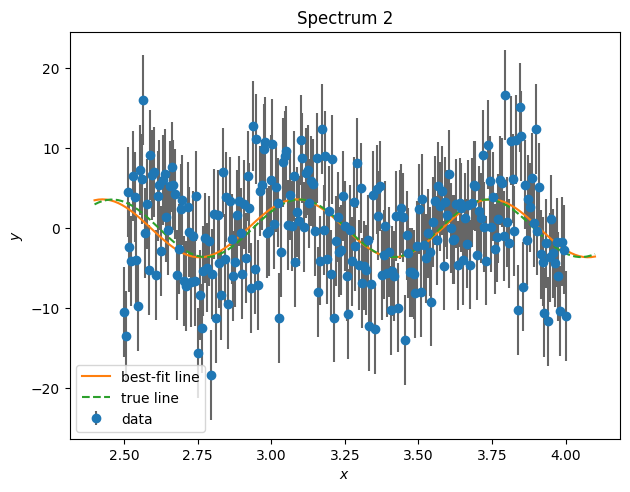

Current parameters: [-3.39036837  1.52393744  0.47315554]
Current parameters: [-3.93383782  1.52499506  0.44808384]
Current parameters: [-3.95462074  1.52622346  0.44716337]
Optimization terminated successfully.
         Current function value: 784.343704
         Iterations: 3
         Function evaluations: 104
Optimized parameters for spectrum 3: [3.95462074 1.52622346 3.58875602]


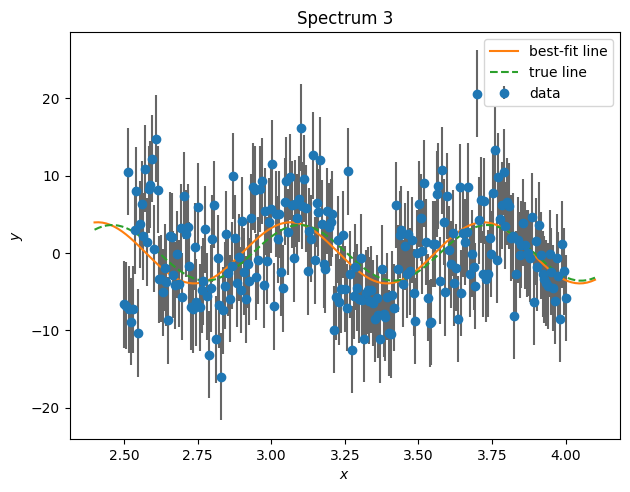

Current parameters: [-3.25870178  1.52224829  0.48308664]
Current parameters: [-3.71909593  1.52293182  0.46644372]
Current parameters: [-3.72829908  1.52372828  0.46611184]
Optimization terminated successfully.
         Current function value: 800.565388
         Iterations: 3
         Function evaluations: 113
Optimized parameters for spectrum 4: [3.72829908 1.52372828 3.6077045 ]


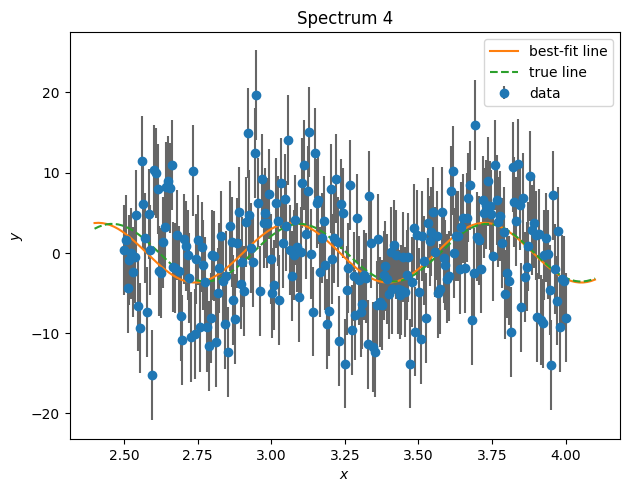

Current parameters: [-3.40641048  1.50914691  0.47363188]
Current parameters: [-3.50103903  1.51046905  0.47171373]
Optimization terminated successfully.
         Current function value: 794.318917
         Iterations: 2
         Function evaluations: 73
Optimized parameters for spectrum 5: [3.50103903 1.51046905 3.61330638]


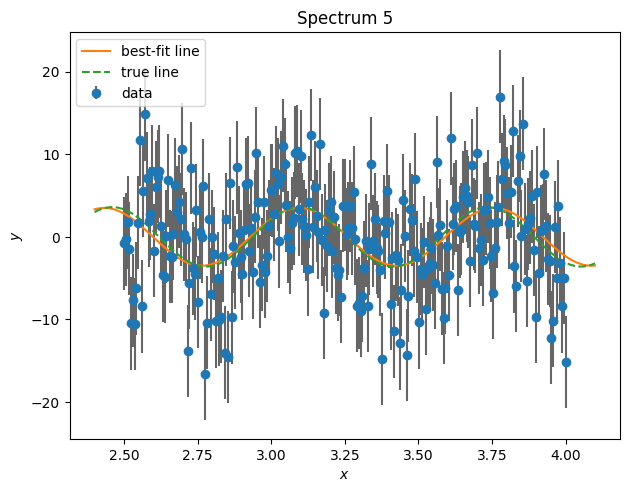

Current parameters: [-3.59504099  1.5158541   0.46877532]
Current parameters: [-3.85268116  1.51730122  0.43861997]
Current parameters: [-3.91781199  1.51908283  0.43099225]
Optimization terminated successfully.
         Current function value: 775.601443
         Iterations: 3
         Function evaluations: 106
Optimized parameters for spectrum 6: [3.91781199 1.51908283 3.5725849 ]


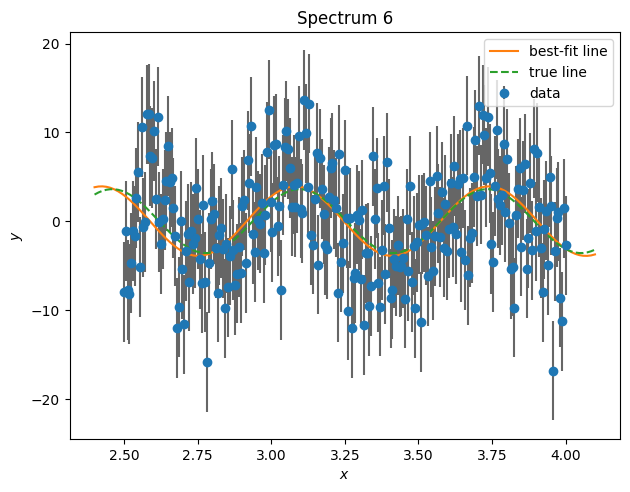

Current parameters: [-2.82578157  1.52418395  0.49488628]
Current parameters: [-3.30193899  1.52417538  0.49147267]
Current parameters: [-3.30225239  1.52433522  0.49147049]
Optimization terminated successfully.
         Current function value: 793.859046
         Iterations: 3
         Function evaluations: 116
Optimized parameters for spectrum 7: [3.30225239 1.52433522 3.63306314]


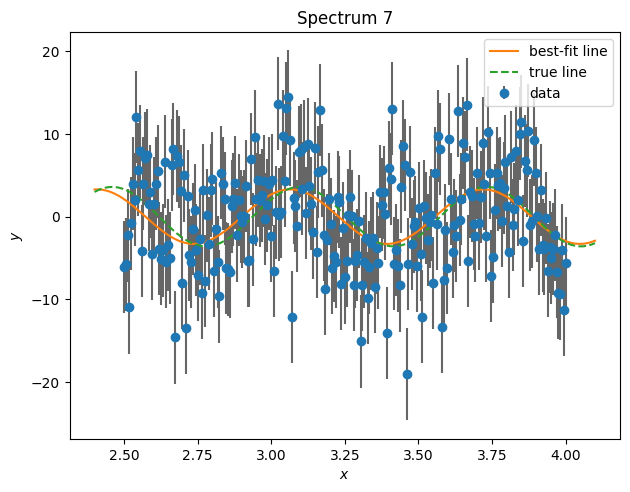

Current parameters: [-3.2928594   1.51966406  0.47203644]
Current parameters: [-3.65439194  1.52094753  0.44418505]
Current parameters: [-3.6894091   1.52238306  0.44148976]
Optimization terminated successfully.
         Current function value: 811.971832
         Iterations: 3
         Function evaluations: 111
Optimized parameters for spectrum 8: [3.6894091  1.52238306 3.58308242]


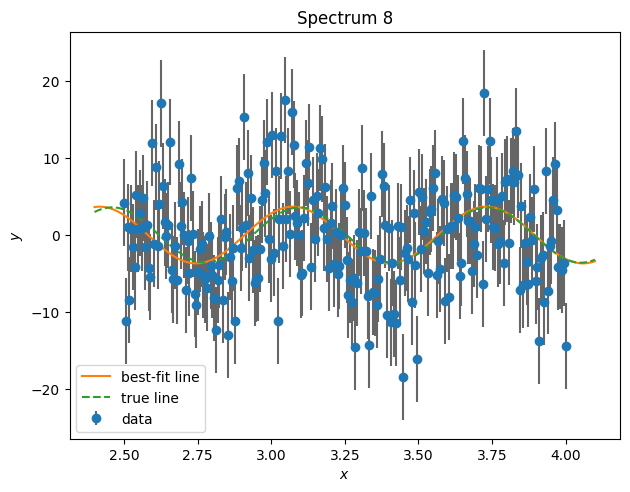

Current parameters: [-2.72898836  1.52204873  0.46334925]
Current parameters: [-3.09736844  1.5236925   0.42767276]
Current parameters: [-3.13855661  1.52557403  0.42367511]
Optimization terminated successfully.
         Current function value: 792.559159
         Iterations: 3
         Function evaluations: 105
Optimized parameters for spectrum 9: [3.13855661 1.52557403 3.56526777]


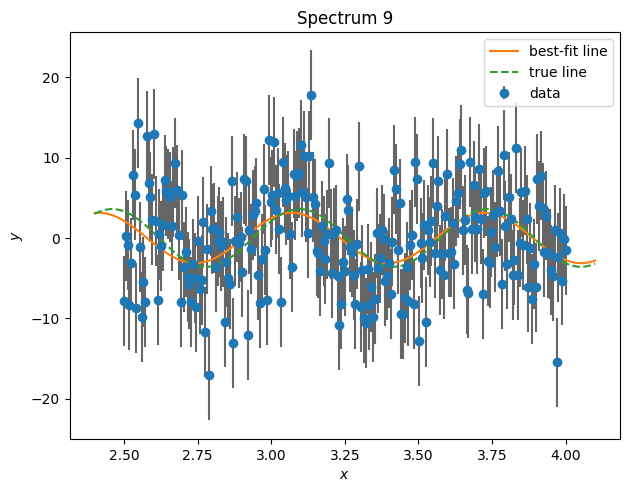

In [17]:
def line_model(pars, x):
 
    pars[0] * np.sin(2 * np.pi * x * pars[1] + pars[2])

    if pars[0] < 0:
        pars[0] = np.abs(pars[0])
        pars[2] = pars[2] - np.pi
        if pars[2] % (2 * np.pi) != 0:
            n = np.floor(pars[2] / (2 * np.pi))
            pars[2] = pars[2] - (n * 2 * np.pi)

    return pars[0] * np.sin(2 * np.pi * x * pars[1] + pars[2])

# Define the model class for the straight line with intrinsic scatter
class StraightLineModel:
    def __init__(self, x, y, y_err):
        self.x = np.asarray(x)
        self.y = np.asarray(y)
        self.y_err = np.asarray(y_err)

    def ln_likelihood(self, pars):
        N = len(self.y)
        dy = self.y - line_model(pars, self.x)
        ivar = 1 / self.y_err**2  # inverse-variance
        return -0.5 * (
            N * np.log(2 * np.pi)
            + np.sum(2 * np.log(self.y_err))
            + np.sum(dy**2 * ivar)
        )

    def ln_prior(self, pars):
        a, b, c = pars
        if a < 0 or a > 5:
            return -np.inf
        if b < 0 or b > 5:
            return -np.inf
        if c < -10 or c > 10:
            return -np.inf
        return 0.0

    def ln_posterior(self, pars):
        lnp = self.ln_prior(pars)
        if np.isinf(lnp):
            return lnp
        lnL = self.ln_likelihood(pars)
        lnprob = lnp + lnL
        if np.isnan(lnprob):
            return -np.inf
        return lnprob

    def __call__(self, pars):
        return self.ln_posterior(pars)

class StraightLineIntrinsicScatterModel(StraightLineModel):
    def ln_likelihood(self, pars):
        a, b, c = pars
        N = len(self.y)
        dy = self.y - line_model([a, b, c], self.x)
        return -0.5 * np.sum((dy / self.y_err) ** 2 + np.log(2 * np.pi * self.y_err**2))

# Define the initial parameters and true values
x0 = [5.0, 1.5, 0.5]  

def callbackF(pars):
    print(f"Current parameters: {pars}")

for i in range(n_spectra):
    # Load the y data and y_err data
    y = np.loadtxt(f'/Users/hshishir/Desktop/mcmc_fit/sp2/sp2_spectra{i}.txt')
    y_err = np.loadtxt(f'/Users/hshishir/Desktop/mcmc_fit/sigma_array/sigma_array_spectra{i}.txt')
    
    # Create the scatter model
    scatter_model = StraightLineIntrinsicScatterModel(freqs, y, y_err)

    a_true = amplitude
    b_true = omega
    c_true = phase
    
    # Perform the optimization
    result_ml_scatter = minimize(
        lambda pars: -scatter_model.ln_likelihood(pars),
        x0=x0,
        method="Powell",  
        callback=callbackF,
        options={'disp': True}
    )

    if not result_ml_scatter.success:
        print(f"Optimization failed: {result_ml_scatter.message}")

    if result_ml_scatter.x[0] < 0:
        result_ml_scatter.x[0] = np.abs(result_ml_scatter.x[0])
        result_ml_scatter.x[2] = result_ml_scatter.x[2] - np.pi
        if result_ml_scatter.x[2] % (2 * np.pi) != 0:
            nn = np.floor(result_ml_scatter.x[2] / (2 * np.pi))
            result_ml_scatter.x[2] = result_ml_scatter.x[2] - (nn * 2 * np.pi)
            
    print(f"Optimized parameters for spectrum {i}: {result_ml_scatter.x}")

    # Plot the results
    plt.figure()
    plt.errorbar(freqs, y, y_err, linestyle="none", marker="o", ecolor="#666666", label="data")

    x_grid = np.linspace(freqs.min() - 0.1, freqs.max() + 0.1, 128)
    plt.plot(
        x_grid,
        line_model(result_ml_scatter.x, x_grid),
        marker="",
        linestyle="-",
        label="best-fit line",
    )
    plt.plot(
        x_grid,
        line_model([a_true, b_true, c_true], x_grid),
        marker="",
        linestyle="dashed",
        label="true line",
    )

    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.title(f'Spectrum {i}')
    plt.show()


<>:104: SyntaxWarning: invalid escape sequence '\s'
<>:104: SyntaxWarning: invalid escape sequence '\s'
/var/folders/zc/wvk_7mm96ql1xtbm8mtvdc580000gn/T/ipykernel_50972/231596858.py:104: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'$1\sigma$ Posterior Spread Spectrum {i}')


Running burn-in...
Running production...


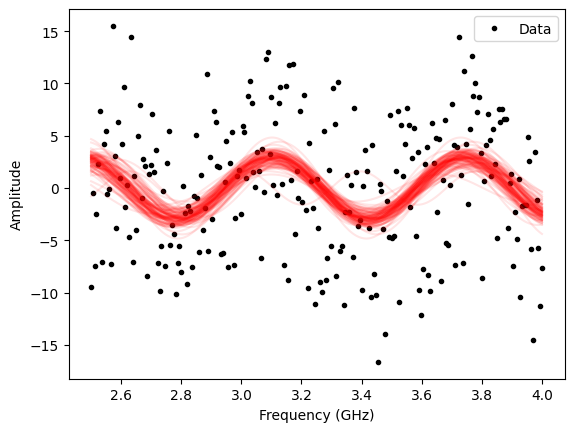

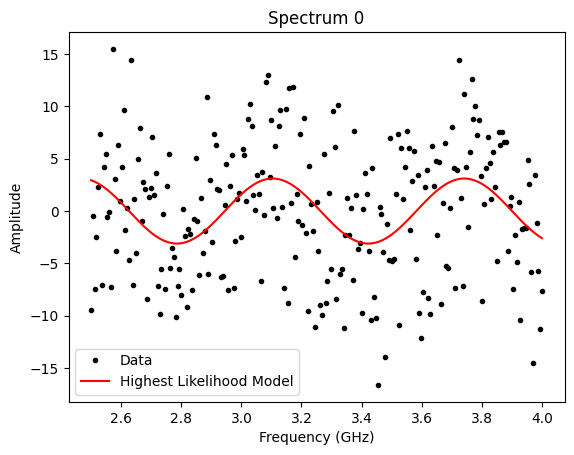

Theta max for spectrum 0: [ 3.11142005  1.56960871 -3.90887632]


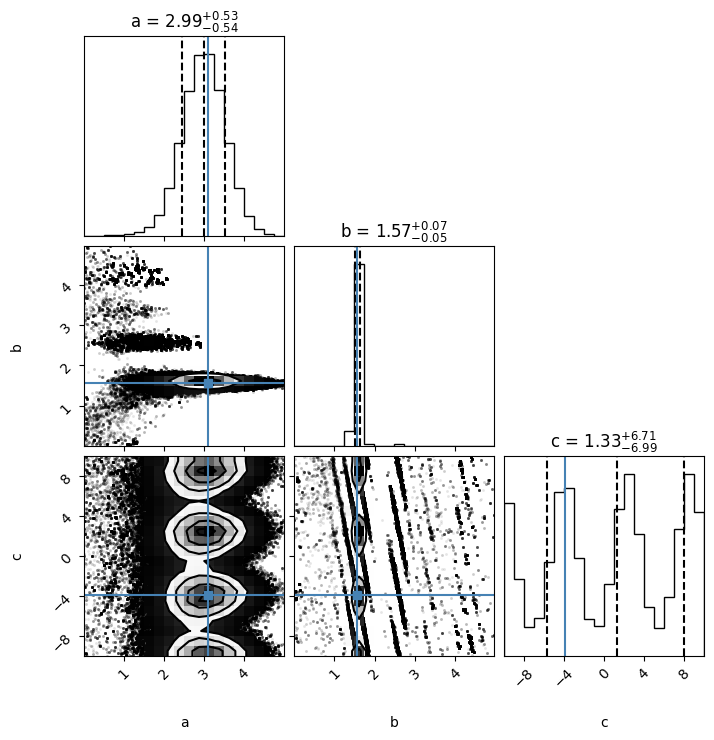

a=2.99^{+0.53}_{-0.54}
b=1.57^{+0.07}_{-0.05}
c=1.33^{+6.71}_{-6.99}


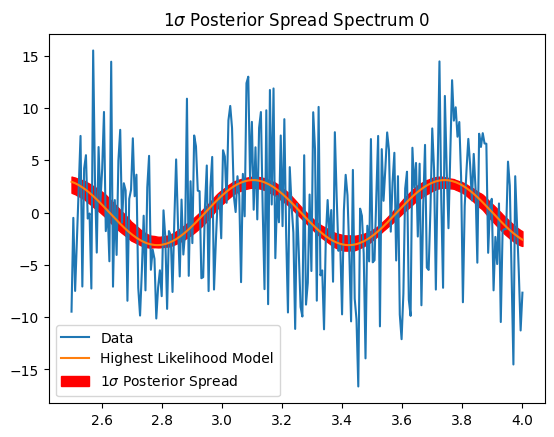

Running burn-in...
Running production...


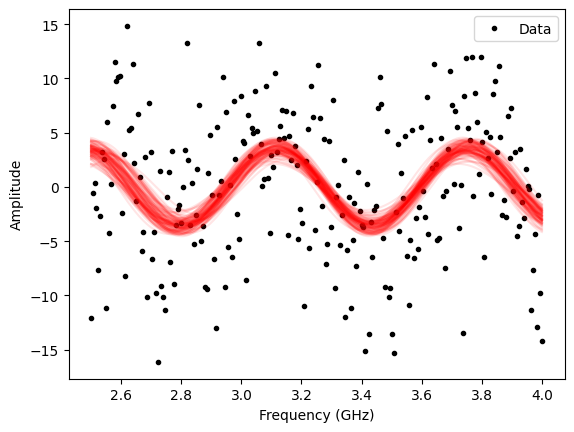

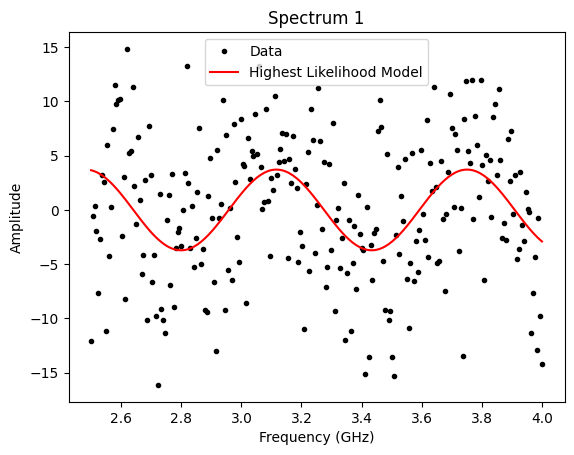

Theta max for spectrum 1: [3.7195407  1.57632203 8.40428545]


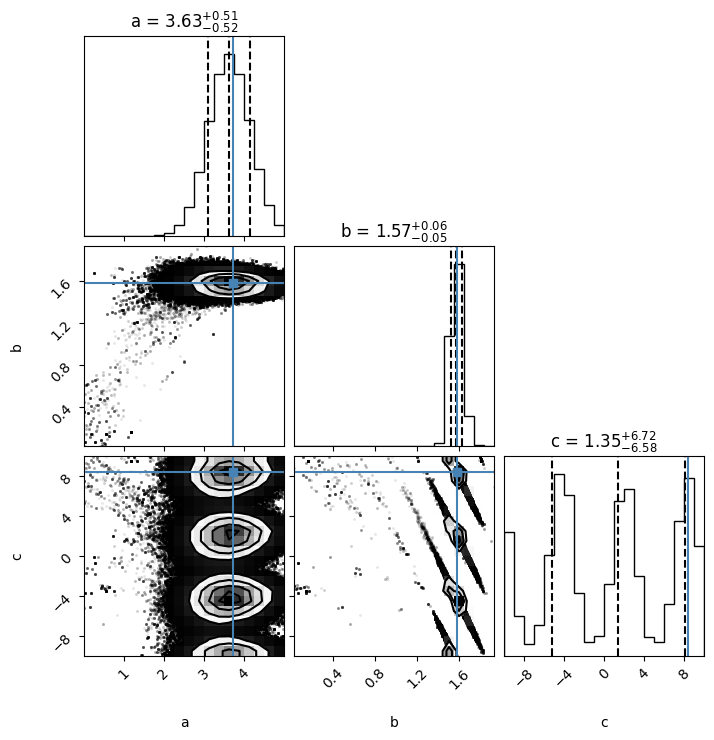

a=3.63^{+0.51}_{-0.52}
b=1.57^{+0.06}_{-0.05}
c=1.35^{+6.72}_{-6.58}


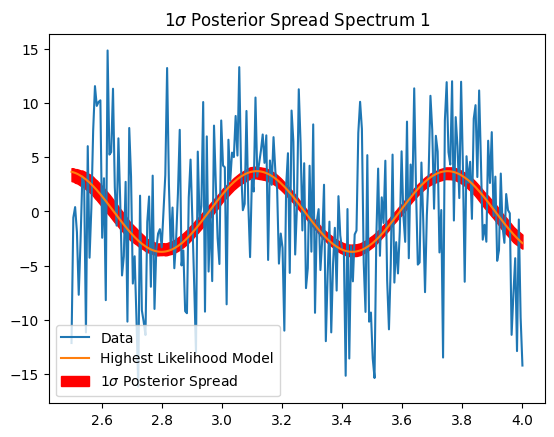

Running burn-in...
Running production...


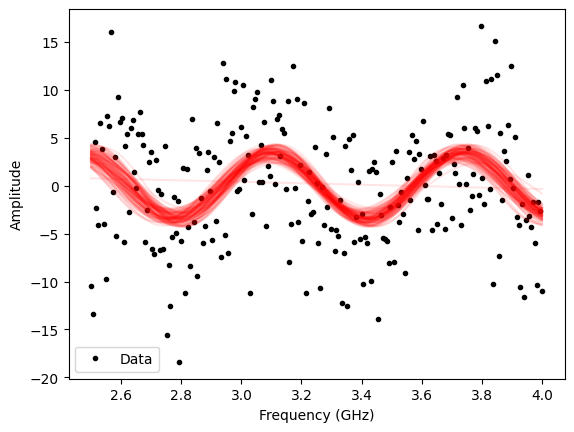

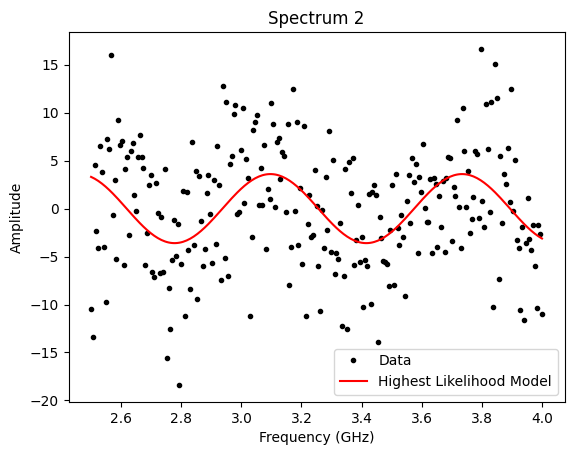

Theta max for spectrum 2: [3.59984773 1.56810723 2.47730739]


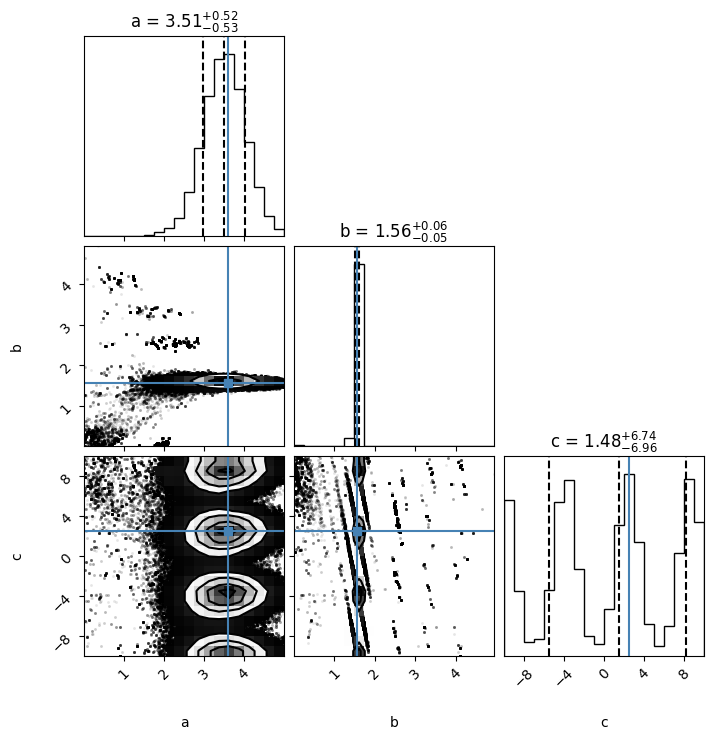

a=3.51^{+0.52}_{-0.53}
b=1.56^{+0.06}_{-0.05}
c=1.48^{+6.74}_{-6.96}


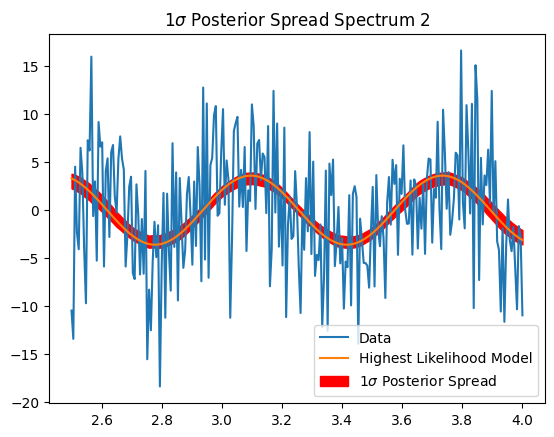

Running burn-in...
Running production...


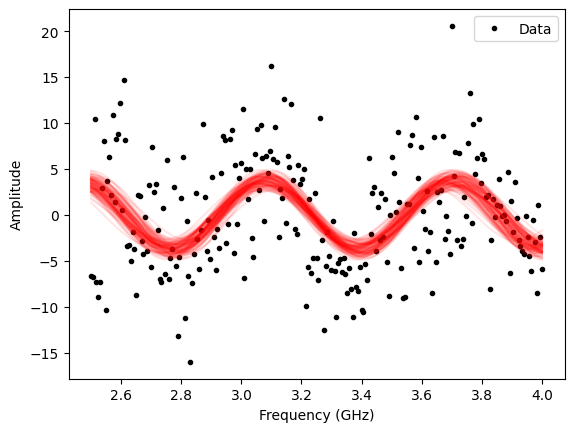

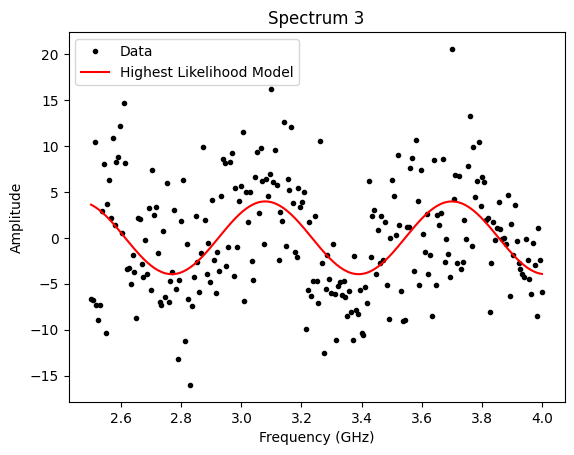

Theta max for spectrum 3: [ 3.96106958  1.6096931  -4.44001505]


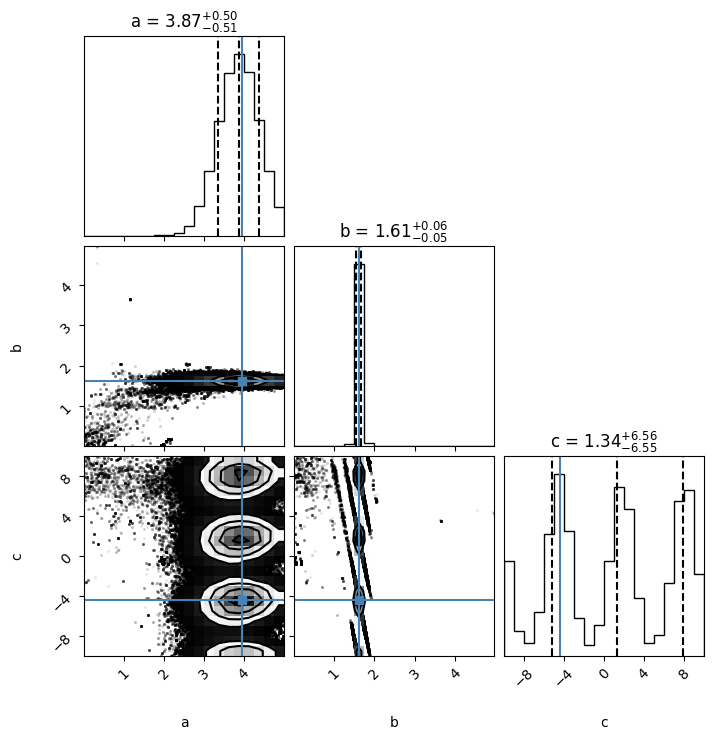

a=3.87^{+0.50}_{-0.51}
b=1.61^{+0.06}_{-0.05}
c=1.34^{+6.56}_{-6.55}


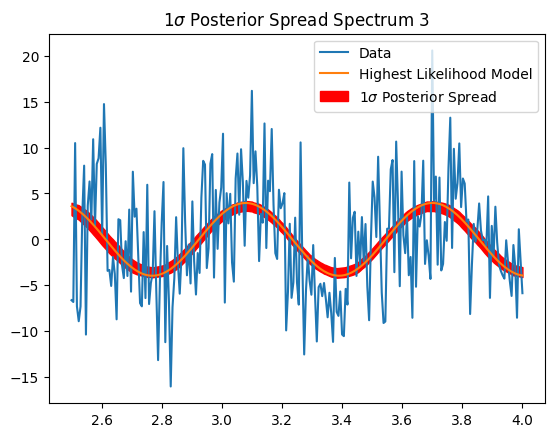

Running burn-in...
Running production...


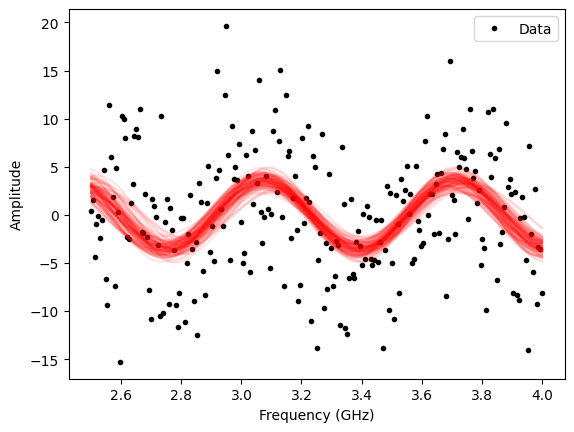

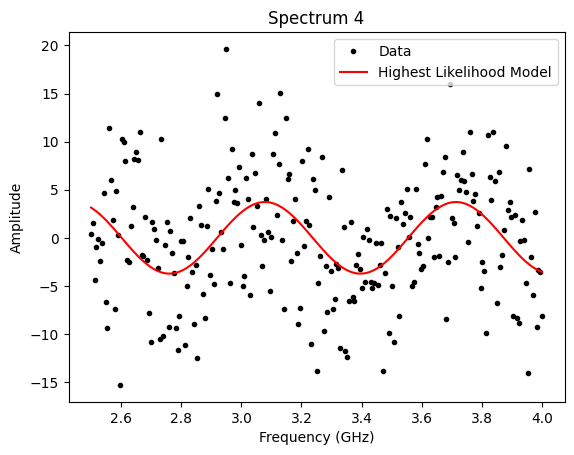

Theta max for spectrum 4: [ 3.72087506  1.57362749 -3.73257724]


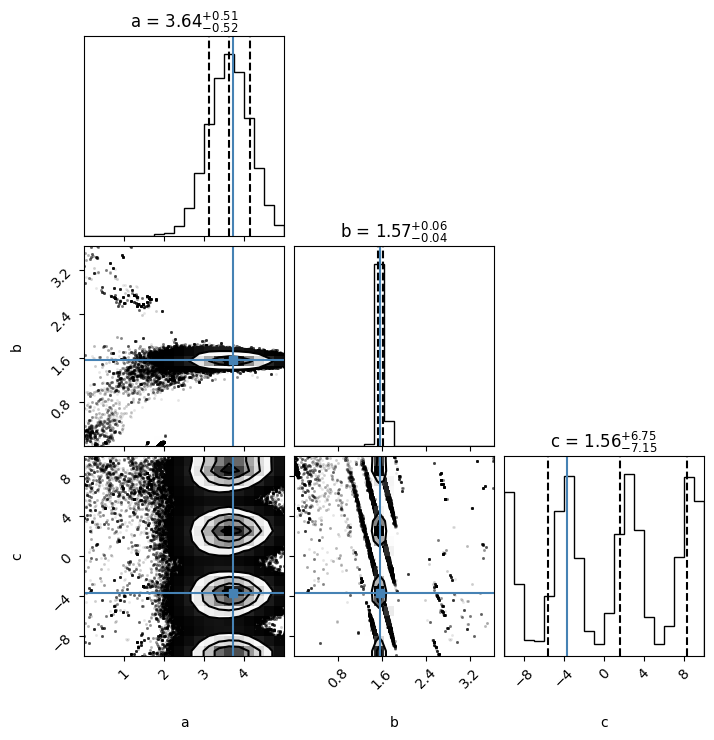

a=3.64^{+0.51}_{-0.52}
b=1.57^{+0.06}_{-0.04}
c=1.56^{+6.75}_{-7.15}


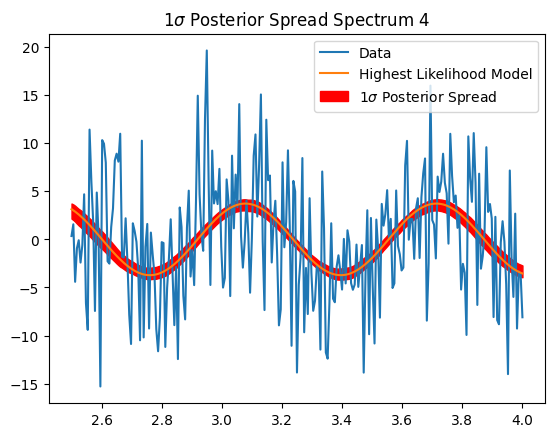

Running burn-in...
Running production...


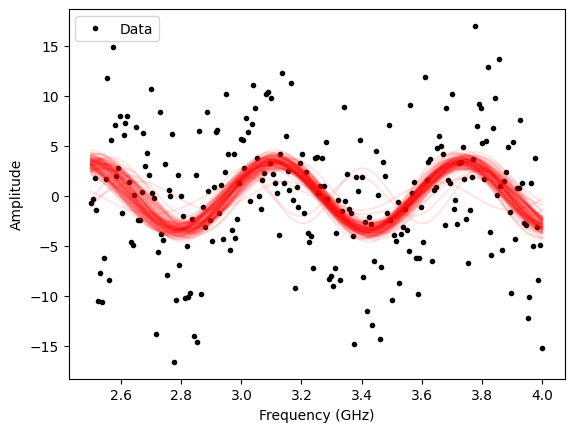

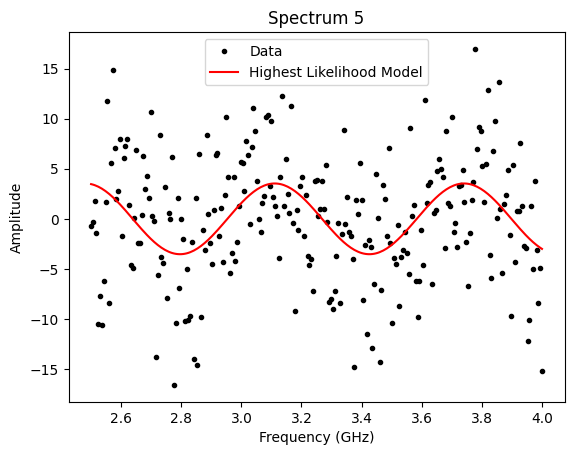

Theta max for spectrum 5: [ 3.53185814  1.58761385 -4.32799041]


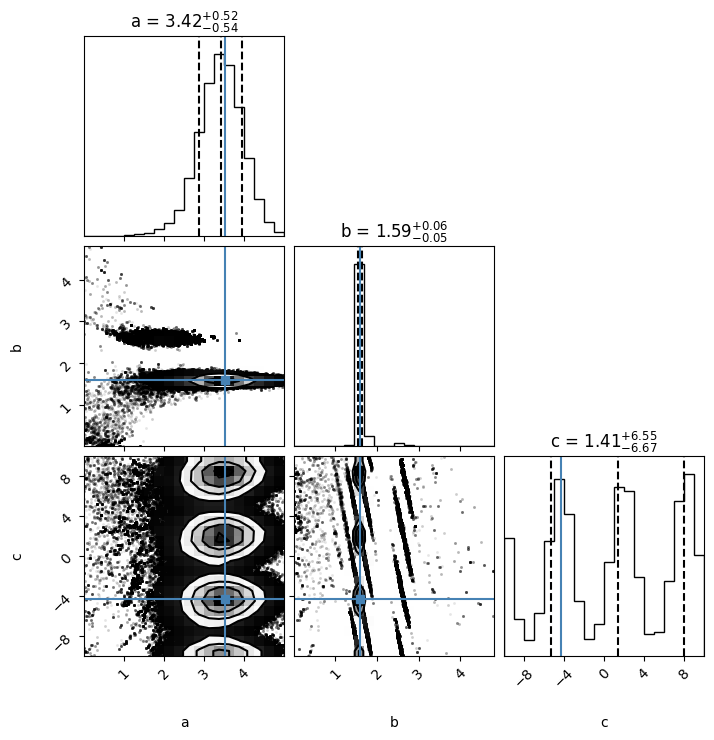

a=3.42^{+0.52}_{-0.54}
b=1.59^{+0.06}_{-0.05}
c=1.41^{+6.55}_{-6.67}


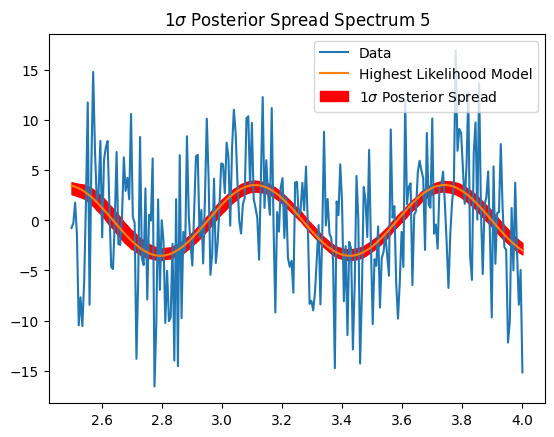

Running burn-in...
Running production...


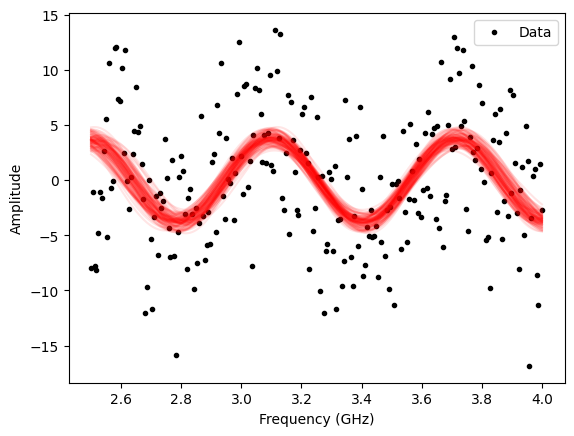

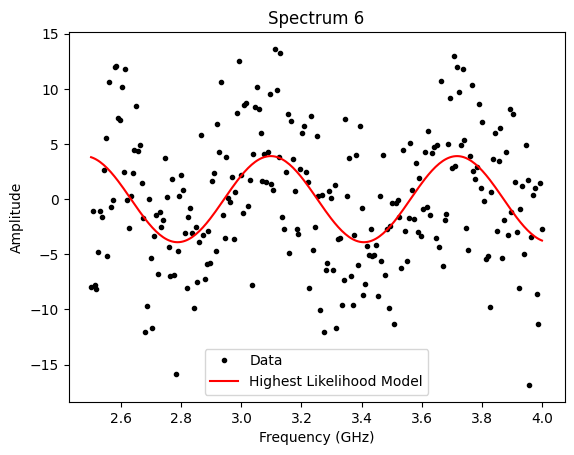

Theta max for spectrum 6: [3.90281556 1.61337087 1.58594871]


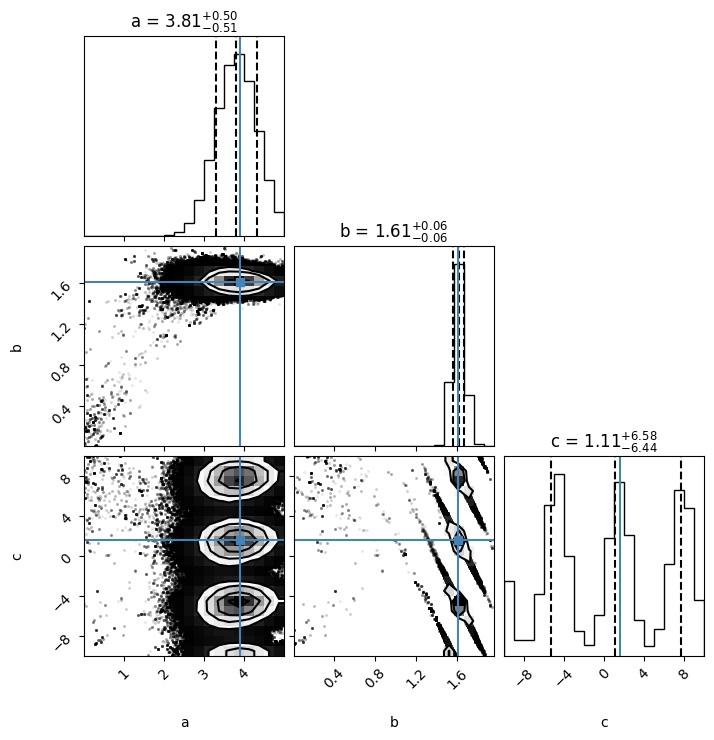

a=3.81^{+0.50}_{-0.51}
b=1.61^{+0.06}_{-0.06}
c=1.11^{+6.58}_{-6.44}


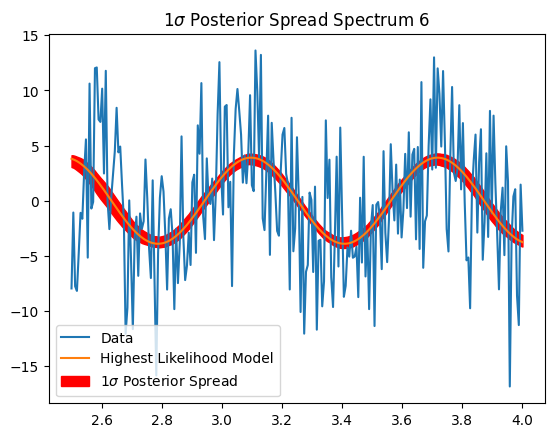

Running burn-in...
Running production...


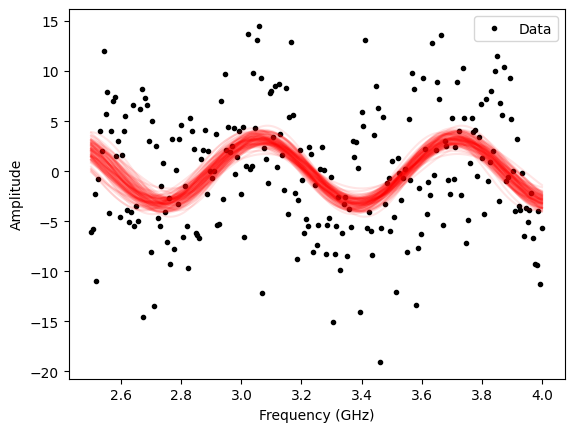

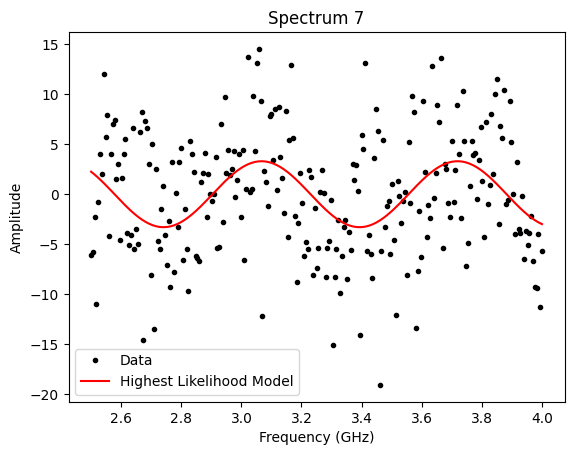

Theta max for spectrum 7: [ 3.29587904  1.53346526 -2.84743753]


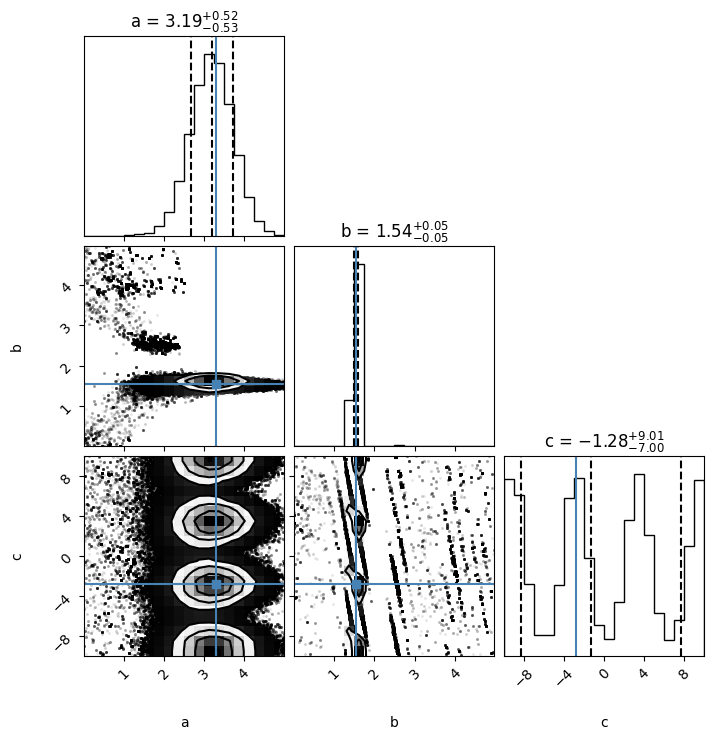

a=3.19^{+0.52}_{-0.53}
b=1.54^{+0.05}_{-0.05}
c=-1.28^{+9.01}_{-7.00}


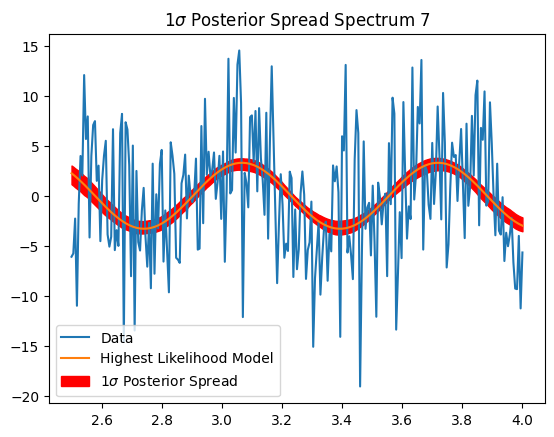

Running burn-in...
Running production...


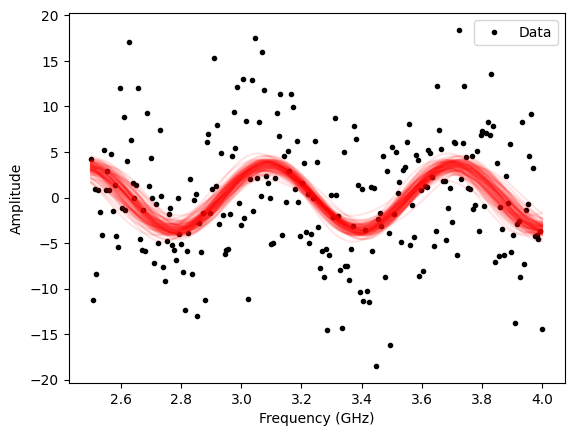

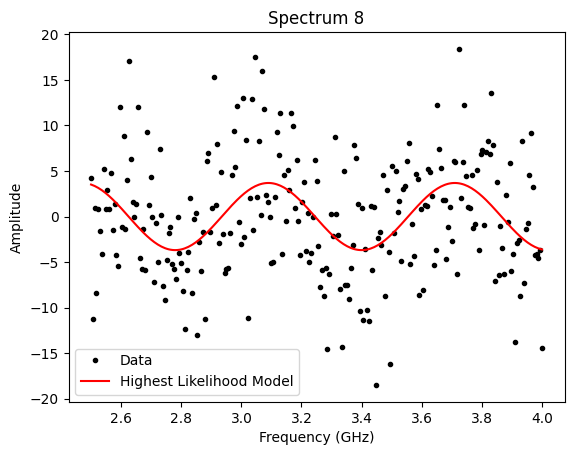

Theta max for spectrum 8: [3.68550308 1.61281491 7.9592401 ]


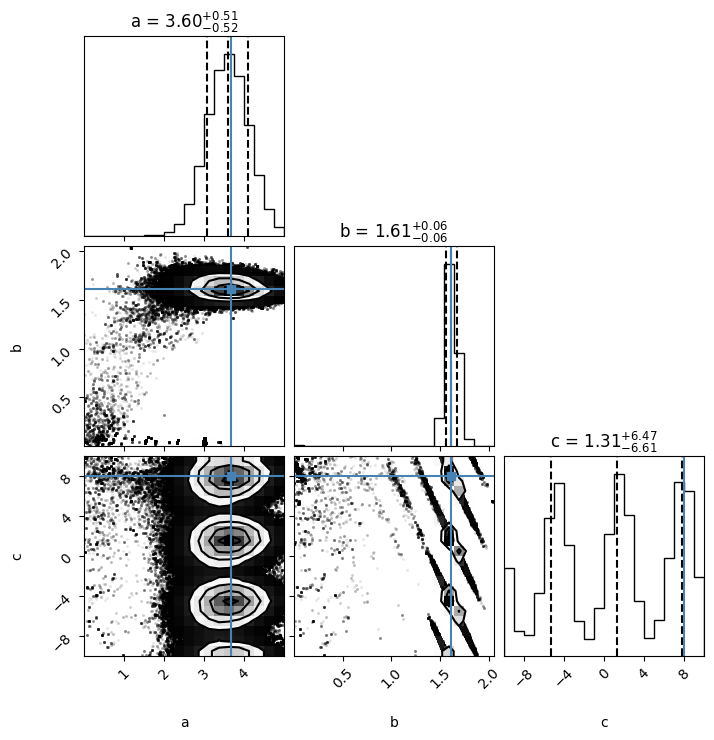

a=3.60^{+0.51}_{-0.52}
b=1.61^{+0.06}_{-0.06}
c=1.31^{+6.47}_{-6.61}


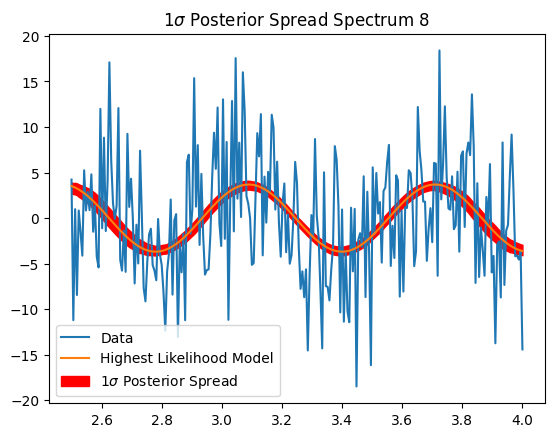

Running burn-in...
Running production...


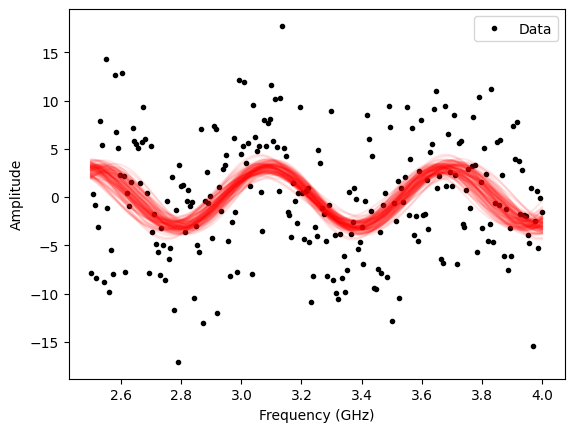

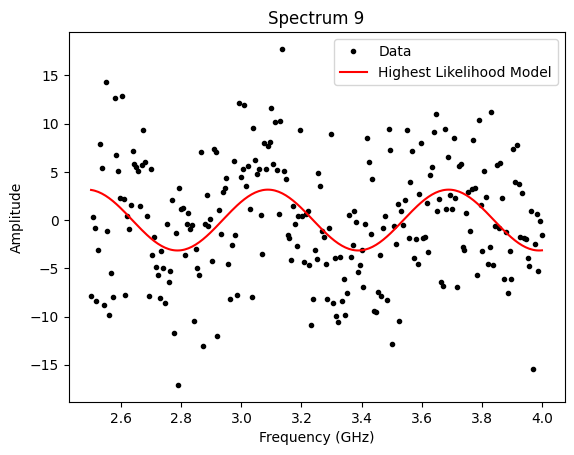

Theta max for spectrum 9: [ 3.15297439  1.66282248 -5.56055722]


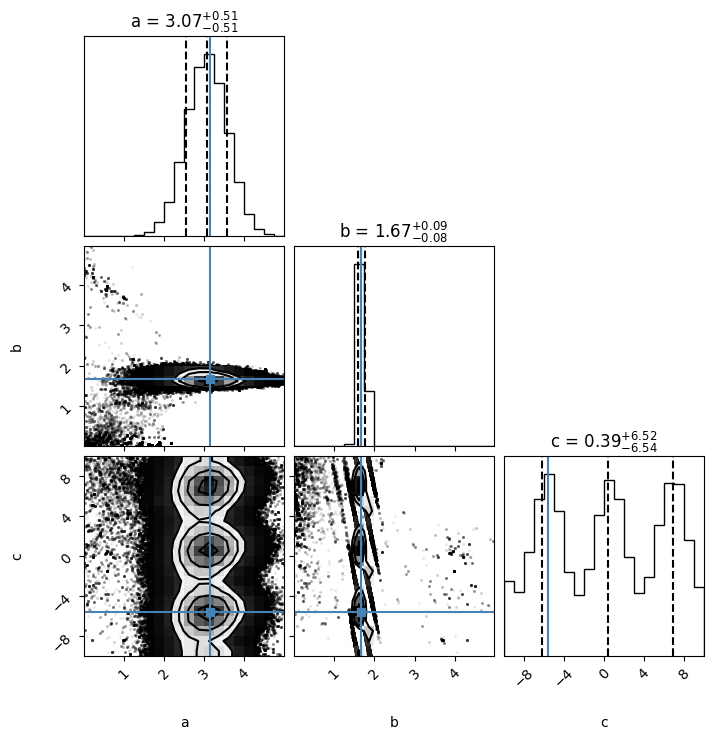

a=3.07^{+0.51}_{-0.51}
b=1.67^{+0.09}_{-0.08}
c=0.39^{+6.52}_{-6.54}


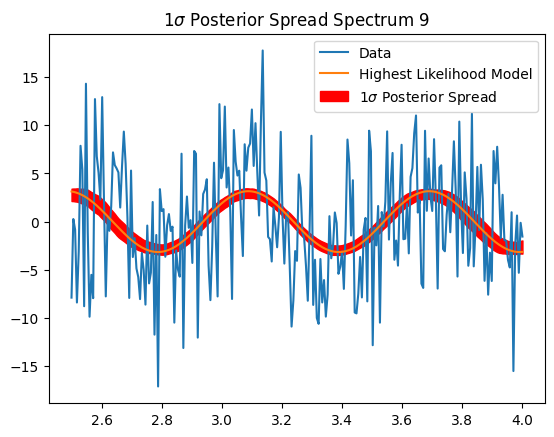

In [22]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import corner

# Assuming `StraightLineIntrinsicScatterModel` and `line_model` are already defined

def lnprob(theta, x, y, y_err):
    scatter_model = StraightLineIntrinsicScatterModel(x, y, y_err)
    return scatter_model.ln_posterior(theta)

def main(p0, nwalkers, niter, ndim, lnprob, data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)
    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()
    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)
    return sampler, pos, prob, state

def plotter(sampler, x, y):
    plt.ion()
    plt.plot(x, y, 'k.', label='Data')
    samples = sampler.flatchain
    for theta in samples[np.random.randint(len(samples), size=100)]:
        plt.plot(x, line_model(theta, x), color="r", alpha=0.1)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

def sample_walkers(nsamples, flattened_chain):
    models = []
    draw = np.floor(np.random.uniform(0, len(flattened_chain), size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    for i in thetas:
        mod = line_model(i, freqs)
        models.append(mod)
    spread = np.std(models, axis=0)
    med_model = np.median(models, axis=0)
    return med_model, spread

for i in range(n_spectra):
    # Load the y data and y_err data
    y = np.loadtxt(f'/Users/hshishir/Desktop/mcmc_fit/sp2/sp2_spectra{i}.txt')
    y_err = np.loadtxt(f'/Users/hshishir/Desktop/mcmc_fit/sigma_array/sigma_array_spectra{i}.txt')
    
    nwalkers = 250
    niter = 20000
    initial = np.array([1.0, 1.0, 8.0])
    ndim = len(initial)
    p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

    # Perform MCMC sampling
    data = (freqs, y, y_err)
    sampler, pos, prob, state = main(p0, nwalkers, niter, ndim, lnprob, data)

    # Plot the results
    plotter(sampler, freqs, y)

    samples = sampler.flatchain
    theta_max = samples[np.argmax(sampler.flatlnprobability)]

    # Adjust theta_max if necessary
    if theta_max[0] < 0:
        theta_max[0] = np.abs(theta_max[0])
        theta_max[2] = theta_max[2] - np.pi
        if theta_max[2] % (2 * np.pi) != 0:
            ee = np.floor(theta_max[2] / (2 * np.pi))
            theta_max[2] = theta_max[2] - (ee * 2 * np.pi)

    best_fit_model = line_model(theta_max, freqs)

    plt.figure()
    plt.plot(freqs, y, 'k.', label='Data')
    plt.plot(freqs, best_fit_model, label='Highest Likelihood Model', color='r')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title(f'Spectrum {i}')
    plt.show()
    print(f'Theta max for spectrum {i}:', theta_max)

    labels = ['a', 'b', 'c']
    fig = corner.corner(samples, show_titles=True, labels=labels, plot_datapoints=True, quantiles=[0.16, 0.5, 0.84], truths=theta_max)
    plt.show()

    # Calculate and print parameter uncertainties
    quantiles = np.percentile(samples, [16, 50, 84], axis=0)
    medians = quantiles[1]
    lower_errors = medians - quantiles[0]
    upper_errors = quantiles[2] - medians

    for j, label in enumerate(labels):
        print(f"{label}={medians[j]:.2f}^{{+{upper_errors[j]:.2f}}}_{{-{lower_errors[j]:.2f}}}")

    # Sample walkers and plot the spread
    med_model, spread = sample_walkers(100, samples)

    plt.plot(freqs, y, label='Data')
    plt.plot(freqs, best_fit_model, label='Highest Likelihood Model')
    plt.fill_between(freqs, med_model - spread, med_model + spread, color='red', alpha=1, label=r'$1\sigma$ Posterior Spread')
    plt.title(f'$1\sigma$ Posterior Spread Spectrum {i}')
    plt.legend()
    plt.show()

In [ ]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import corner

# Assuming `StraightLineIntrinsicScatterModel` and `line_model` are already defined

def lnprob(theta, x, y, y_err):
    scatter_model = StraightLineIntrinsicScatterModel(x, y, y_err)
    return scatter_model.ln_posterior(theta)

def main(p0, nwalkers, niter, ndim, lnprob, data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)
    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()
    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)
    return sampler, pos, prob, state

def plotter(sampler, x, y):
    plt.ion()
    plt.plot(x, y, 'k.', label='Data')
    samples = sampler.flatchain
    for theta in samples[np.random.randint(len(samples), size=100)]:
        plt.plot(x, line_model(theta, x), color="r", alpha=0.1)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

def sample_walkers(nsamples, flattened_chain):
    models = []
    draw = np.floor(np.random.uniform(0, len(flattened_chain), size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    for i in thetas:
        mod = line_model(i, freqs)
        models.append(mod)
    spread = np.std(models, axis=0)
    med_model = np.median(models, axis=0)
    return med_model, spread

for i in range(1):
    # Load the y data and y_err data
    y = np.loadtxt(f'/Users/hshishir/Desktop/mcmc_fit/sp2/sp2_spectra{i}.txt')
    y_err = np.loadtxt(f'/Users/hshishir/Desktop/mcmc_fit/sigma_array/sigma_array_spectra{i}.txt')
    
    nwalkers = 250
    niter = 20000
    initial = np.array([1.0, 1.0, 8.0])
    ndim = len(initial)
    p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

    # Perform MCMC sampling
    data = (freqs, y, y_err)
    sampler, pos, prob, state = main(p0, nwalkers, niter, ndim, lnprob, data)

    # Plot the results
    plotter(sampler, freqs, y)

    samples = sampler.flatchain
    theta_max = samples[np.argmax(sampler.flatlnprobability)]

    # Adjust theta_max if necessary
    if theta_max[0] < 0:
        theta_max[0] = np.abs(theta_max[0])
        theta_max[2] = theta_max[2] - np.pi
        if theta_max[2] % (2 * np.pi) != 0:
            ee = np.floor(theta_max[2] / (2 * np.pi))
            theta_max[2] = theta_max[2] - (ee * 2 * np.pi)

    best_fit_model = line_model(theta_max, freqs)

    plt.figure()
    plt.plot(freqs, y, 'k.', label='Data')
    plt.plot(freqs, best_fit_model, label='Highest Likelihood Model', color='r')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title(f'Spectrum {i}')
    plt.show()
    print(f'Theta max for spectrum {i}:', theta_max)

    labels = ['a', 'b', 'c']
    fig = corner.corner(samples, show_titles=True, labels=labels, plot_datapoints=True, quantiles=[0.16, 0.5, 0.84], truths=theta_max)
    plt.show()

    # Calculate and print parameter uncertainties
    quantiles = np.percentile(samples, [16, 50, 84], axis=0)
    medians = quantiles[1]
    lower_errors = medians - quantiles[0]
    upper_errors = quantiles[2] - medians

    for j, label in enumerate(labels):
        print(f"{label}={medians[j]:.2f}^{{+{upper_errors[j]:.2f}}}_{{-{lower_errors[j]:.2f}}}")

    # Sample walkers and plot the spread
    med_model, spread = sample_walkers(100, samples)

    plt.plot(freqs, y, label='Data')
    plt.plot(freqs, best_fit_model, label='Highest Likelihood Model')
    plt.fill_between(freqs, med_model - spread, med_model + spread, color='red', alpha=1, label=r'$1\sigma$ Posterior Spread')
    plt.title(f'$1\sigma$ Posterior Spread Spectrum {i}')
    plt.legend()
    plt.show()